# **Movie Revenue** <br> **Data mining + Machine learning project** <br> 

---

#  الملخص التنفيذي



يهدف هذا المشروع إلى تطوير نظام تنقيب عن البيانات مدعوم بتقنيات التعلم الآلي للتنبؤ بإيرادات الأفلام المستقبلية واقتراح طاقم التمثيل الأمثل بناءً على خصائص الفيلم المختلفة.
<br>
 تم تجميع مجموعة بيانات شاملة تحتوي على معلومات متقدمة حول الأفلام مثل: النوع، اللغة، ميزانية الإنتاج، الشركات المنتجة، تقييمات الأفلام على  معلومات الممثلين وتقييماتهم، إضافة إلى متغيرات مشتقة مثل الربح وصافي الإيراد، وعدد الممثلين الفريدين، ومتوسط تقييماتهم، وغير ذلك.  
 <br>
الهدف الأساسي هو بناء نماذج تنبؤية دقيقة تساعد صناع القرار في صناعة السينما على تقدير إيرادات الأفلام قبل إنتاجها، واختيار الممثلين الذين يعظمون من فرص نجاح الفيلم تجارياً. كما يتضمن المشروع تطوير نظام توصية ذكي لترشيح الممثلين المناسبين، إضافة إلى نموذج لتوقع تقييم الفيلم.  
تم استخدام تقنيات متقدمة في المعالجة المسبقة للبيانات وهندسة الميزات، وسيتم تنفيذ النماذج باستخدام خوارزميات تعلم آلة مثل الأشجار العشوائية، والانحدار، والشبكات العصبية، وغيرها.

---

# فهم المشكلة

تواجه صناعة السينما تحديات كبيرة في التنبؤ بنجاح الأفلام قبل عرضها، مما قد يؤدي إلى خسائر مالية كبيرة نتيجة سوء التقدير. وتكمن الحاجة الملحة لدى شركات الإنتاج في وجود أنظمة ذكية تساعدها في تقدير الإيرادات المتوقعة بدقة بناءً على معطيات يمكن التحكم بها قبل بدء الإنتاج، مثل: ميزانية الفيلم، نوعه، طاقم التمثيل، الشركة المنتجة، وتاريخ الإصدار.  
كما يوجد اهتمام متزايد في مجال الصناعة باستخدام الذكاء الاصطناعي لتقديم توصيات حول اختيار طاقم التمثيل الأكثر تأثيراً في نجاح الفيلم مالياً وجماهيرياً.  
## اهداف المشروع
يهدف المشروع إلى تلبية هذه الاحتياجات من خلال
- بناء نموذج تنبؤي لإيرادات الأفلام المستقبلية باستخدام بيانات شاملة عن الفيلم وطاقم العمل.
- تطوير نظام توصية لترشيح الممثلين بناءً على الأثر المتوقع لهم على الإيرادات.
- تصميم نموذج توقع لتقييم الفيلم بناءً على معطياته المختلفة.
<br>
ستُعتمد مؤشرات نجاح المشروع على دقة النماذج التنبؤية، وجودة التوصيات، ومدى إمكانية تطبيق النتائج عملياً لدعم قرارات شركات الإنتاج السينمائي.

##  القيود والمخاطر
يتضمن المشروع عدداً من القيود والمخاطر التي يجب أخذها بعين الاعتبار أثناء تطوير النظام وتقييم نتائجه
1. قيود البيانات
2. قيود تقنية
3. مخاطر الانحياز
4. مخاطر التطبيق



# تحميل المكاتب

In [ ]:
!pip install gdown
!pip install faiss-cpu -q

!pip install catboost
!pip install xgboost
!pip install lightgbm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import defaultdict
from collections import Counter
from itertools import combinations
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re,os,gzip,shutil,gdown,time,requests,time,kagglehub,warnings,random,json,faiss,ast
from IPython.display import display
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from tabulate import tabulate
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


import lightgbm as lgb
import xgboost as xgb
from google.colab import files
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_auc_score
from lightgbm.sklearn import LGBMClassifier





random.seed(42)

# تحميل البيانات

## بيانات الافلام

يوجد لدينا مجموعتان من البيانات

### مجموعة بيانات الافلام 1
the dataset name <<leen add here

In [2]:


file_id = '1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc'

output_path = 'movies.csv'

gdown.download(id=file_id, output=output_path, quiet=False)
df = pd.read_csv(output_path)

df.head(2)

Downloading...
From (original): https://drive.google.com/uc?id=1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc
From (redirected): https://drive.google.com/uc?id=1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc&confirm=t&uuid=b2a3f573-2b08-4bb6-b064-c9cf0c129414
To: /content/movies.csv
100%|██████████| 351M/351M [00:02<00:00, 153MB/s]


id                title                         genres  \
0  615656    Meg 2: The Trench  Action-Science Fiction-Horror   
1  758323  The Pope's Exorcist        Horror-Mystery-Thriller   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   

   popularity                               production_companies release_date  \
0    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   

        budget      revenue  runtime    status  \
0  129000000.0  352056482.0    116.0  Released   
1   18000000.0   65675816.0    103.0  Released   

                                             tagline  vote_average  \
0                                  Back for seconds.         7.079   
1  Inspired by the actual files of Father Gabriel...         7.433   

   vote_count                                            credits  \
0      1365.0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...   
1       545.0  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...   

                                            keywords  \
0                based on novel or book-sequel-kaiju   
1  spain-rome italy-vatican-pope-pig-possession-c...   

                        poster_path                     backdrop_path  \
0  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  /qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg   
1  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  /hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg   

                                     recommendations  
0  1006462-298618-569094-1061181-346698-1076487-6...  
1  713704-296271-502356-1076605-1084225-1008005-9...

<table>
    <thead>
        <tr>
            <th>اسم العمود</th>
            <th>الشرح</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>id</td>
            <td>رقم تعريفي فريد لكل فيلم</td>
        </tr>
        <tr>
            <td>title</td>
            <td>اسم الفيلم</td>
        </tr>
        <tr>
            <td>genres</td>
            <td>تصنيفات الفيلم مفصولة بـ (-) مثل: Action - Science Fiction - Horror</td>
        </tr>
        <tr>
            <td>original_language</td>
            <td>اللغة الأصلية للفيلم </td>
        </tr>
        <tr>
            <td>overview</td>
            <td>ملخص أو وصف مختصر للفيلم</td>
        </tr>
        <tr>
            <td>popularity</td>
            <td>مقياس شهرة الفيلم (قيمة عددية مشتقة من نشاط البحث أو المشاهدة)</td>
        </tr>
        <tr>
            <td>production_companies</td>
            <td>أسماء شركات الإنتاج المشاركة، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>release_date</td>
            <td>تاريخ إصدار الفيلم</td>
        </tr>
        <tr>
            <td>budget</td>
            <td>ميزانية الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>revenue</td>
            <td>إجمالي الإيرادات التي حققها الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>runtime</td>
            <td>مدة عرض الفيلم بالدقائق</td>
        </tr>
        <tr>
            <td>status</td>
            <td>حالة الفيلم مثل: Released - Post Production - ..</td>
        </tr>
        <tr>
            <td>tagline</td>
            <td>شعار تسويقي للفيلم </td>
        </tr>
        <tr>
            <td>vote_average</td>
            <td>متوسط تقييم الفيلم من قبل المستخدمين</td>
        </tr>
        <tr>
            <td>vote_count</td>
            <td>عدد الأشخاص الذين قاموا بتقييم الفيلم</td>
        </tr>
        <tr>
            <td>credits</td>
            <td>قائمة الممثلين والطاقم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>keywords</td>
            <td>كلمات مفتاحية مرتبطة بمحتوى الفيلم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>poster_path</td>
            <td>مسار صورة ملصق الفيلم</td>
        </tr>
        <tr>
            <td>backdrop_path</td>
            <td>مسار صورة خلفية الفيلمي</td>
        </tr>
        <tr>
            <td>recommendations</td>
            <td>قائمة بمعرّفات أفلام أخرى مقترحة، مفصولة بـ (-)</td>
        </tr>
    </tbody>
</table>


### مجموعة بيانات الافلام 2
<a href="https://developer.imdb.com/non-commercial-datasets/" style="color:gold;">IMDB Dataset</a>



In [ ]:
# imdb data  full list  (from imdb webiste )

imdb_urls = [
    "https://datasets.imdbws.com/title.basics.tsv.gz",
    "https://datasets.imdbws.com/title.ratings.tsv.gz",
    "https://datasets.imdbws.com/title.principals.tsv.gz",
    "https://datasets.imdbws.com/name.basics.tsv.gz"
]

output_dir = "imdb/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

for url in imdb_urls:
    filename_gz = url.split('/')[-1]
    filename_tsv = filename_gz.replace('.gz', '')

    output_file_gz = os.path.join(output_dir, filename_gz)
    output_file_tsv = os.path.join(output_dir, filename_tsv)
    if os.path.exists(output_file_tsv):
        print(f"Skipping {filename_tsv}: Already exists in {output_dir}")
        continue 

    print(f"\nDownloading {url} to {output_file_gz}...")
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status() 

        with open(output_file_gz, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete. Decompressing...")

        with gzip.open(output_file_gz, 'rb') as f_in:
            with open(output_file_tsv, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print(f"Decompression complete. File saved to {output_file_tsv}")
        os.remove(output_file_gz)
        print(f"Removed compressed file: {output_file_gz}")
        time.sleep(1)

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with {url}: {e}")

print("\nAll specified IMDb datasets have been processed.")
print(f"You can find them in the '{output_dir}' directory.")



Created directory: imdb/

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.basics.tsv
Removed compressed file: imdb/title.basics.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.ratings.tsv
Removed compressed file: imdb/title.ratings.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.principals.tsv
Removed compressed file: imdb/title.principals.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/name.basics.tsv
Removed compressed file: imdb/name.basics.tsv.gz

All specified IMDb datasets have been processed.
You can find them in the 'imdb/' directory.


In [ ]:

## rating data
dfr = pd.read_csv(
    'imdb/title.ratings.tsv',
    sep='\t'
)
## movies data
dfb = pd.read_csv(
    'imdb/title.basics.tsv',
    low_memory=False  ,
    sep='\t',
    na_values='\\N'
)
print("\n Rating info: \n", dfr.info())
print("\n Rating describtion: \n",dfr.describe(include='all'))
print("\n Rating head \n",dfr.head())
print("\n Movies data shape : ",dfb.shape)
print("\n Rating data columns : ",dfr.columns)
print("\n Movies columns : ",dfb.columns)
columns_to_check = [
    'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
    'startYear', 'endYear', 'runtimeMinutes', 'genres'
]

print("\n number of unique values in movies data (in selected columns ) \n",dfb[columns_to_check].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586591 entries, 0 to 1586590
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1586591 non-null  object 
 1   averageRating  1586591 non-null  float64
 2   numVotes       1586591 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.3+ MB

 Rating info: 
 None

 Rating describtion: 
            tconst  averageRating      numVotes
count     1586591   1.586591e+06  1.586591e+06
unique    1586591            NaN           NaN
top     tt9916880            NaN           NaN
freq            1            NaN           NaN
mean          NaN   6.949066e+00  1.022079e+03
std           NaN   1.387593e+00  1.785552e+04
min           NaN   1.000000e+00  5.000000e+00
25%           NaN   6.200000e+00  1.200000e+01
50%           NaN   7.100000e+00  2.600000e+01
75%           NaN   7.900000e+00  1.000000e+02
max           NaN   1.000000e+01

## بيانات الممثلين
هنالك مجموعتان للممثلين

### مجموعة بيانات الممثلين 1
**IMDB dataset**<br>


In [6]:
basics_df = pd.read_csv('imdb/title.basics.tsv', sep='\t', low_memory=False)
ratings_df = pd.read_csv('imdb/title.ratings.tsv', sep='\t')
print(basics_df.info())
print(ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11762395 entries, 0 to 11762394
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 807.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586591 entries, 0 to 1586590
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1586591 non-null  object 
 1   averageRating  1586591 non-null  float64
 2   numVotes       1586591 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.3+ MB
None


In [ ]:
# the actors are here
principals_df = pd.read_csv('imdb/title.principals.tsv', sep='\t')
names_df = pd.read_csv('imdb/name.basics.tsv', sep='\t', low_memory=False)
print(principals_df.info())
print(names_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93482991 entries, 0 to 93482990
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 4.2+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14538023 entries, 0 to 14538022
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 665.5+ MB
None


### مجموعة بيانات الممثلين 2

<a href="https://www.kaggle.com/datasets/darinhawley/imdb-films-by-actor-for-10k-actors" style="color:blue;">IMDB Films By Actor For 10K Actors</a>

In [8]:
path = kagglehub.dataset_download("darinhawley/imdb-films-by-actor-for-10k-actors")

print("Path to dataset files:", path)
actors_df_kaggle=pd.read_csv(f'{path}/actorfilms.csv')

100%|██████████| 3.92M/3.92M [00:00<00:00, 57.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/darinhawley/imdb-films-by-actor-for-10k-actors/versions/1


## الاوسكار

#### تحميل بيانات الاوسكار
<br>
<a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award" style="color:gold;">The Oscar Award, 1927 - 2025</a>

In [35]:

path = kagglehub.dataset_download("unanimad/the-oscar-award")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-oscar-award


In [36]:
oscars_df = pd.read_csv('/kaggle/input/the-oscar-award/the_oscar_award.csv')

oscars_df.head()

year_film  year_ceremony  ceremony category             canon_category  \
0       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
1       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
2       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
3       1927           1928         1    ACTOR    ACTOR IN A LEADING ROLE   
4       1927           1928         1  ACTRESS  ACTRESS IN A LEADING ROLE   

                  name                    film  winner  
0  Richard Barthelmess               The Noose   False  
1  Richard Barthelmess  The Patent Leather Kid   False  
2        Emil Jannings        The Last Command    True  
3        Emil Jannings    The Way of All Flesh    True  
4       Louise Dresser         A Ship Comes In   False

---
#### فحص اولي للبيانات
---

In [13]:
oscars_df['category'].value_counts()

category
DIRECTING                                    476
FILM EDITING                                 455
ACTOR IN A SUPPORTING ROLE                   445
ACTRESS IN A SUPPORTING ROLE                 445
BEST PICTURE                                 381
                                            ... 
SPECIAL ACHIEVEMENT AWARD                      3
SPECIAL FOREIGN LANGUAGE FILM AWARD            2
DIRECTING (Comedy Picture)                     2
SPECIAL ACHIEVEMENT AWARD (Sound Effects)      1
SPECIAL ACHIEVEMENT AWARD (Sound Editing)      1
Name: count, Length: 118, dtype: int64

In [14]:
oscars_df['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

## الممثلين النجوم

In [ ]:
celebrity_path = r"C:\Users\LENOVO\Desktop\Datasets\Celebrity.csv" # TODO  اللينك الاصلي يا هناء 
forbes_path     = r"C:\Users\LENOVO\Desktop\Datasets\forbes_celebrity_100.csv"


df1 = pd.read_csv(celebrity_path)
df3= pd.read_csv(forbes_path)
# superstars = r"C:\Users\LENOVO\Desktop\Datasets\superstars_actors.csv"
# df1 = pd.read_csv(superstars)
# df1.shape

In [ ]:
df3.shape

(1647, 4)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id',
       'known_for_department', 'adult'],
      dtype='object')

In [ ]:
df3.columns

Index(['Name', 'Pay (USD millions)', 'Year', 'Category'], dtype='object')

In [ ]:
print("Celebrity.csv Columns:", df1.columns.tolist())
print("Forbes Celebrity 100 Columns:", df3.columns.tolist())

print("\nSample from Celebrity.csv:")
print(df1.head())


print("\nSample from forbes_celebrity_100.csv:")
print(df3.head())


Celebrity.csv Columns: ['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id', 'known_for_department', 'adult']
Forbes Celebrity 100 Columns: ['Name', 'Pay (USD millions)', 'Year', 'Category']

Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  

Sample from forbes_celebrity_100.csv:
               Name  Pay (USD millions)  Year             Categor

In [ ]:
df1.shape

(9980, 8)

In [ ]:
print("\nSample from Celebrity.csv:")
print(df1.head())



Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  


In [ ]:
for col in df1.columns:
    print(f"\nColumn: {col}")
    print(df1[col].unique())
    print(f"Total unique: {df1[col].nunique()}")



Column: Unnamed: 0
[   0    1    2 ... 9977 9978 9979]
Total unique: 9980

Column: name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8711

Column: original_name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8708

Column: popularity
[212.888 199.717 193.376 ...  21.939  21.938  21.937]
Total unique: 6923

Column: gender
[2 1 3 0]
Total unique: 4

Column: id
[    64  10859 115440 ...  78921   1384 114645]
Total unique: 8726

Column: known_for_department
['Acting' 'Directing' 'Writing' 'Production' 'Sound' 'Visual Effects'
 'Crew' 'Creator' 'Art' 'Camera' 'Costume & Make-Up' 'Editing']
Total unique: 12

Column: adult
[False]
Total unique: 1


# إعداد البيانات

## بيانات الافلام


### مجموعة الافلام 1


####  preprocessing:

يوجد في البيانات أفلام بلغات عديدة، منها التركية، اليابانية، الهندية، والإنجليزية، حيث تحتوي قاعدة البيانات على أفلام بـ **167 لغة مختلفة**.

لكن، في دراستنا سنقتصر على الأفلام باللغة الإنجليزية فقط، وذلك لضمان دقة وتحليل أكثر عمقاً وموضوعية.



In [15]:

num_languages = df['original_language'].nunique()
print(f"عدد اللغات الأصلية المختلفة هو: {num_languages}")
languages = df['original_language'].unique()
print(languages)


عدد اللغات الأصلية المختلفة هو: 167
['en' 'la' 'ko' 'es' 'no' 'cn' 'ja' 'hi' 'fi' 'ru' 'uk' 'nl' 'it' 'zh'
 'bn' 'th' 'id' 'is' 'da' 'fr' 'pl' 'te' 'pt' 'de' 'ro' 'tl' 'ta' 'ar'
 'el' 'sr' 'sv' 'gl' 'tr' 'vi' 'ml' 'lv' 'cs' 'bs' 'fa' 'ga' 'mk' 'pa'
 'eu' 'kn' 'ca' 'xx' 'sh' 'et' 'km' 'gu' 'he' 'hu' 'hr' 'dz' 'ne' 'ka'
 'ms' 'mn' 'kk' 'si' 'af' 'sl' 'bo' 'sk' 'wo' 'hy' 'se' 'sq' 'kl' 'su'
 'ku' 'eo' 'ur' 'sw' 'mi' 'cy' 'as' 'lt' 'ps' 'mr' 'qu' 'bm' 'rw' 'ay'
 'uz' 'bg' 'am' 'lo' 'iu' 'zu' 'os' 'xh' 'ak' 'yi' 'mt' 'yo' 'my' 'ff'
 'nb' 'st' 'jv' 'ha' 'gn' 'lb' 'az' 'ky' 'gd' 'or' 'mo' 'ln' 'fo' 'tg'
 'tw' 'be' 'sa' 'ug' 'sm' 'an' 'ie' 'rm' 'co' 'nn' 'ti' 'ab' 'fy' 'tk'
 'so' 'lg' 'ht' 'ba' 'mg' 'ks' 'ss' 'dv' 'tt' 'ia' 'cr' 'ny' 'ig' 'ce'
 'bi' 'ii' 'sn' 'nv' 'mh' 'sg' 'ki' 'za' 'oj' 'to' 'ts' 'om' 'kg' 'rn'
 'sd' 'oc' 'kw' 'pi' 'gv' 'av' 'tn' 'cv' 'fj' 'sc' 'ty' 'ch' 'li']


In [16]:
english_movies = df[df['original_language'] == 'en']

حذف الاعمدة التي لن نتطرق لها اثناء تحليل ودراسة :


In [ ]:

english_movies = english_movies.drop(columns=['keywords', 'poster_path', 'backdrop_path','recommendations' ])

نلاحظ وجود عدد كبير من القيم الفارغة في العديد من الأعمدة، حيث أن نسبة القيم المفقودة في بعض الأعمدة تتجاوز **80%**، مما يجعل أي محاولة للتعويض باستخدام تقنيات مثل التقدير أو التنبؤ غير دقيقة، وقد تؤدي إلى نتائج خاطئة    
بالإضافة إلى ذلك، هناك نقص كبير في أعمدة مهمة وأساسية مثل:

- أسماء الممثلين
- تاريخ العرض
- مدة العرض
- نوع الفيلم

لذلك، أي تحليل يعتمد على هذه الأعمدة سيكون غير دقيق

In [18]:
english_movies.isna().sum()

id                           0
title                        6
genres                  129102
original_language            0
overview                  7973
popularity                   0
production_companies    216986
release_date             35214
budget                       0
revenue                      0
runtime                  14064
status                       0
tagline                 292882
vote_average                 0
vote_count                   0
credits                 134654
dtype: int64


1. **حذف جميع الصفوف التي تحتوي على قيم فارغة**  
   بسبب النسبة العالية جدا للقيم المفقودة في أعمدة حساسة، قمنا بحذف هذه الصفوف بالكامل لضمان الاعتماد فقط على بيانات مكتملة.

2. **حذف الصفوف المكررة بشكل كامل مع الاحتفاظ بأول تكرار**  
   هذه الخطوة تضمن عدم وجود نسخ مكررة تماماً من نفس الفيلم.

3. **حذف التكرار بناءً على عنوان الفيلم وتاريخ عرضه فقط**   
   بعض الأفلام قد تُسجل أكثر من مرة بنفس العنوان وتاريخ الإصدار، لذا تم حذف التكرار بناءً على هذين العمودين فقط.
   <br>
**النتيجة:**
<br>
عدد الأفلام المتبقية بعد حذف:  
48654


In [19]:
english_movies = english_movies.dropna()
english_movies = english_movies.drop_duplicates(keep='first')
english_movies= english_movies.drop_duplicates(subset=['title', 'release_date'])
len(english_movies)

48654

#### شرح حالات حالة الأفلام (status)
- **Released (تم الإصدار):**  
  الأفلام التي تم الانتهاء منها وتم إصدارها رسمياً للجمهور.  
  عددها: 48,620 فيلم  
  تمثل أغلب الأفلام في البيانات.

- **In Production (قيد الإنتاج):**  
  الأفلام التي ما زالت في مرحلة التصوير والإنتاج الفعلي.  
  عددها: 19 فيلم  
  لم تُكمل بعد مراحل الإنتاج.

- **Post Production (ما بعد الإنتاج):**  
  الأفلام التي انتهى تصويرها وجاري العمل على المونتاج، المؤثرات، والمراحل النهائية قبل الإصدار.  
  عددها: 12 فيلم

- **Planned (مخطط لها):**  
  الأفلام التي في مرحلة التخطيط فقط، ولم يبدأ تصويرها أو إنتاجها بعد.  
  عددها: 3 أفلام
واخيرا :
 البيانات غير متوازنة , يعني النموذج لن رح يتعلم شي فعلي عن الفئات النادرة لأنها:
قليلة لدرجة ما تمثل نمط واضح.
لذلك سيتم الاحتفاظ فقط بحالة صدروا الفيلم

In [20]:
unique_status_count = english_movies['status'].nunique()
print(unique_status_count)
print(english_movies['status'].value_counts())

4
status
Released           48620
In Production         19
Post Production       12
Planned                3
Name: count, dtype: int64


In [21]:

english_movies = english_movies[english_movies['status'] == 'Released']



####  حذف افلام التي مدتها صفر: تعد هذه البيانات  **بالبيانات الخاطئة**  يفضل حذفها

In [22]:
english_movies_zero_runtime = english_movies[english_movies['runtime'] == 0]
print(english_movies_zero_runtime['status'].value_counts())
english_movies = english_movies[english_movies['runtime'] > 0]


status
Released    793
Name: count, dtype: int64



- في **Outliers**  :
  - أقصر فيلم: **1 دقيقة فقط**
  - أطول فيلم: **960 دقيقة** (يعني 16 ساعة تقريبًا!)
- المتوسط العام: **86 دقيقة**
- أغلب الأفلام تقع بين:
  - **الربع الأول (25%)** = 75 دقيقة
  - **الربع الثالث (75%)** = 100 دقيقة

: لازم نحذف القيم المتطرفة
- نحصر البيانات  بين:
  - 15 دقيقة كحد أدنى (منطقي لفيلم قصير)
  - 400 دقيقة كحد أقصى (3 ساعات كحد مقبول للأفلام الطويلة)

In [23]:
english_movies['runtime'].describe()


count    47827.000000
mean        86.207289
std         34.644593
min          1.000000
25%         75.000000
50%         90.000000
75%        100.000000
max        960.000000
Name: runtime, dtype: float64

In [24]:

one_minute = english_movies[english_movies['runtime'] < 15]
print(f"عدد الأفلام مدتها 15 دقيقة: {len(one_minute)}")

over_400 = english_movies[english_movies['runtime'] > 400]
print(f"عدد الأفلام مدتها أكثر من 400 دقيقة: {len(over_400)}")

عدد الأفلام مدتها 15 دقيقة: 2356
عدد الأفلام مدتها أكثر من 400 دقيقة: 29


#### قبل الحذف اريد فحص اذا  ينتموا لنوع محدد, و لكن لا لذلك تم الحذف

In [25]:

one_minute_genres = english_movies[english_movies['runtime'] <15]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: {len(one_minute_genres)}")
print(one_minute_genres)

over_400_genres = english_movies[english_movies['runtime'] > 400]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها أكثر من 400 دقيقة: {len(over_400_genres)}")
print(over_400_genres)


عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: 498
['Action-Science Fiction' 'Family-Animation-Comedy'
 'Animation-Family-Comedy-Fantasy' 'Animation-Comedy-Fantasy'
 'Animation-Comedy-Family-Fantasy'
 'Animation-Adventure-Comedy-Family-Science Fiction' 'Comedy'
 'Science Fiction-Fantasy' 'Action-Comedy-Fantasy-Thriller'
 'Drama-Western-Adventure' 'Family-Fantasy-Animation-Comedy'
 'Horror-Mystery' 'Animation-Family-Comedy' 'Animation-Family'
 'Animation-Horror' 'Science Fiction-Thriller' 'Horror'
 'Science Fiction-Action-Fantasy' 'Documentary-War'
 'Science Fiction-Comedy-Fantasy' 'Animation-Fantasy-Comedy' 'Documentary'
 'Horror-Comedy' 'Horror-Science Fiction-Thriller' 'Mystery-Horror'
 'Drama' 'Drama-Fantasy' 'Drama-Crime-Action' 'Mystery-Thriller'
 'Thriller-Horror' 'Adventure-Action-Fantasy' 'Family-Comedy-Animation'
 'Action-Adventure-Science Fiction' 'Fantasy-Comedy'
 'Animation-Family-Romance' 'Science Fiction-Drama'
 'Music-Animation-Comedy-Family' 'Animation-Comedy-Drama-Famil

In [26]:

english_movies = english_movies[(english_movies['runtime'] > 15) & (english_movies['runtime'] < 400)]

print(english_movies['runtime'].describe())

count    45212.000000
mean        90.341303
std         27.374215
min         16.000000
25%         79.000000
50%         90.000000
75%        101.000000
max        390.000000
Name: runtime, dtype: float64



 معظم الأفلام شعبيتها منخفضة:
- 25% من الأفلام أقل من **1.33**
- 50% من الأفلام أقل من **2.80** (الوسيط)
- 75% من الأفلام أقل من **7.88**

 توجد قيم شاذة جدًا (Outliers):
- القيمة القصوى **8763.99** بعيدة جداً عن المتوسط.
- الانحراف المعياري المرتفع **89.67** يدل على وجود تشتت كبير في القيم.

#### الاستنتاج:
لا يمكن الاعتماد على هذا العامود كمؤشر دقيق لقياس شهرة الفيلم، للأسباب التالية:
- وجود تفاوت كبير بين القيم.
- القيم المتطرفة تؤثر على التحليل الإحصائي.
**يُفضل استخدام مؤشرات بديلة أكثر دقة لقياس شهرة الأفلام.**


In [27]:

print(english_movies['popularity'].describe())


count    45212.000000
mean        10.236429
std         89.685811
min          0.001000
25%          1.333000
50%          2.807000
75%          7.885000
max       8763.998000
Name: popularity, dtype: float64


#### نتيجة:

- عدد التقييمات غير متوزع بشكل جيد، حيث معظم الأفلام حصلت على عدد قليل جداً من التقييمات، وهذا يجعل الاعتماد على المتوسط غير موثوق.

- متوسط التقييم قد يعطي مؤشراً أولياً لجودة الفيلم، لكنه لا يعكس الحقيقة بشكل كامل خاصةً إذا كان عدد التقييمات قليل جداً.

- بالتالي، لا يمكن الاعتماد على عدد التقييمات أو متوسط التقييم لوحدهما كمعيار دقيق لتحليل جودة أو شهرة الأفلام.



In [28]:
print(english_movies['vote_count'].describe())
print(english_movies['vote_average'].describe())



count    45212.000000
mean       352.231509
std       1507.039860
min          0.000000
25%          1.000000
50%         10.000000
75%         77.000000
max      34857.000000
Name: vote_count, dtype: float64
count    45212.000000
mean         4.843025
std          2.602260
min          0.000000
25%          4.000000
50%          5.700000
75%          6.548250
max         10.000000
Name: vote_average, dtype: float64


#### إنشاء ميزة جديدة: الأرباح (profit)

تم إنشاء ميزة جديدة تُسمى **الأرباح**، والتي تمثل الفرق بين إيرادات الفيلم  والتكلفة أو الميزانية التي صرفت عليه .

بالتالي، تُعطينا هذه الميزة فكرة واضحة عن نجاح الفيلم من الناحية المالية، حيث نعرف هل الفيلم حقق أرباحًا أو خسر مبلغاً معيناً.

هذه الميزة مهمة لأنها   توفر لنا مؤشراً أدق على الأداء المالي للفيلم.


In [29]:
english_movies['profit'] = english_movies['revenue'] - english_movies['budget']

In [30]:

english_movies['release_date'] = pd.to_datetime(english_movies['release_date'], errors='coerce')
english_movies['release_year'] = english_movies['release_date'].dt.year
english_movies['release_month'] = english_movies['release_date'].dt.month
english_movies['release_day'] =english_movies['release_date'].dt.day


In [31]:

english_movies['release_year'] = english_movies['release_date'].dt.year
valid_years = english_movies['release_year'].dropna()
unique_years = valid_years.unique()
print(f"عدد السنوات الفريدة: {len(unique_years)}")
min_year = valid_years.min()
max_year = valid_years.max()
print(f"أصغر سنة في البيانات: {min_year}")
print(f"أكبر سنة في البيانات: {max_year}")
print("السنوات الفريدة مرتبة:")
print(sorted(unique_years))


عدد السنوات الفريدة: 118
أصغر سنة في البيانات: 1906
أكبر سنة في البيانات: 2025
السنوات الفريدة مرتبة:
[np.int32(1906), np.int32(1907), np.int32(1910), np.int32(1911), np.int32(1912), np.int32(1913), np.int32(1914), np.int32(1915), np.int32(1916), np.int32(1917), np.int32(1918), np.int32(1919), np.int32(1920), np.int32(1921), np.int32(1922), np.int32(1923), np.int32(1924), np.int32(1925), np.int32(1926), np.int32(1927), np.int32(1928), np.int32(1929), np.int32(1930), np.int32(1931), np.int32(1932), np.int32(1933), np.int32(1934), np.int32(1935), np.int32(1936), np.int32(1937), np.int32(1938), np.int32(1939), np.int32(1940), np.int32(1941), np.int32(1942), np.int32(1943), np.int32(1944), np.int32(1945), np.int32(1946), np.int32(1947), np.int32(1948), np.int32(1949), np.int32(1950), np.int32(1951), np.int32(1952), np.int32(1953), np.int32(1954), np.int32(1955), np.int32(1956), np.int32(1957), np.int32(1958), np.int32(1959), np.int32(1960), np.int32(1961), np.int32(1962), np.int32(1963), n

#### انشاء ميزة عدد ممثلين

In [32]:

english_movies['unique_actors_count'] = english_movies['credits'].apply(lambda x: len(set(str(x).split('-'))))



#### استخدام تحليل المشاعر لجملة الترويج كميزة جديدة
 tagline_sentiment

في هالخطوة، عملنا تحليل مشاعر لجمل الترويج  لكل فيلم, انشئنا عامود جديد  بيحدد إذا كانت جملة الترويج إيجابية، سلبية أو محايدة.

الهدف من هالميزة هو تزويد نموذج تعلم الآلة بمعلومة إضافية تساعده يفهم مشاعر الجملة الترويجية للفيلم، لأنه ممكن تكون مؤشر مهم  على إيرادات الفيلم.

مثلاً:

جملة ترويجية إيجابية ممكن تعزز اهتمام المشاهدين وبالتالي تزيد الإيرادات.

جملة ترويجية سلبية أو محايدة قد تعكس حالة مختلفة.

باستخدام هالميزة، نموذج التنبؤ ممكن يصير أكثر دقة في توقع إيرادات الأفلام.

In [34]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if not isinstance(text, str):
        return 'neutral'
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 1
    elif compound <= -0.05:
        return -1
    else:
        return 0

english_movies['tagline_sentiment'] = english_movies['tagline'].apply(analyze_sentiment)


print(english_movies[['tagline', 'tagline_sentiment']].head())


sentiment_counts = english_movies['tagline_sentiment'].value_counts()
print(sentiment_counts)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             tagline  tagline_sentiment
0                                  Back for seconds.                  0
1  Inspired by the actual files of Father Gabriel...                  1
2                                     Come together.                  0
3                                     Unite or fall.                  0
4                            Long live the fighters.                 -1
tagline_sentiment
 0    16571
 1    16060
-1    12581
Name: count, dtype: int64


#### تقسيم الأفلام حسب الفترة الزمنية (Movie Era Classification)

قمنا بتقسيم الأفلام إلى فئات زمنية تعتمد على سنة إصدار الفيلم، بهدف التعرف على تأثير الفترة التاريخية على أداء الفيلم من حيث الإيرادات والنجاح.

هذا التصنيف يساعد في تحليل أنماط السوق وتغير ذوق الجمهور بمرور الوقت، ويمكن الاستفادة منه كميزة إضافية في النماذج   (Machine Learning) لتوقع أرباح أو نجاح الأفلام.

**التقسيم المعتمد:**

| الفئة         | السنوات       | الوصف                                          |
|---------------|----------------|------------------------------------------------|
| Classic       | قبل 1980       | الأفلام الكلاسيكية ذات الإنتاج التقليدي والبسيط. |
| Old_School    | 1980 - 1999    | فترة الثمانينات والتسعينات، بداية التطور التكنولوجي وانتشار السينما التجارية. |
| Modern        | 2000 - 2014    | الأفلام الحديثة نسبيًا، مع وجود تأثير الإنترنت وتطور أساليب الترويج. |
| New_Era       | 2015 وما بعد   | الفترة المعاصرة، حيث تلعب السوشيال ميديا والبث الرقمي دورًا كبيرًا في نجاح الأفلام. |



                              title  release_year movie_era
0                 Meg 2: The Trench          2023   New_Era
1               The Pope's Exorcist          2023   New_Era
2              Deadpool & Wolverine          2024   New_Era
3  Transformers: Rise of the Beasts          2023   New_Era
4                    Dune: Part Two          2024   New_Era


/tmp/ipython-input-36-3931499364.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=english_movies, x='movie_era', palette='viridis')


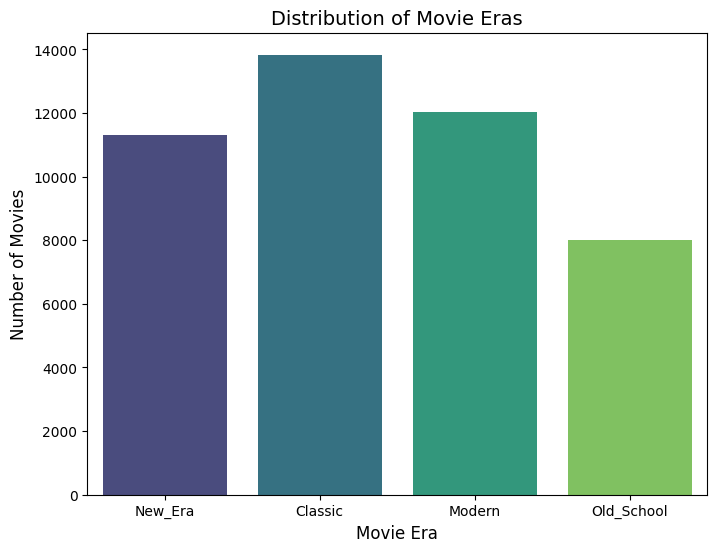

In [36]:


def classify_era(year):
    if year < 1980:
        return 'Classic'
    elif year < 2000:
        return 'Old_School'
    elif year < 2015:
        return 'Modern'
    else:
        return 'New_Era'

english_movies['movie_era'] = english_movies['release_year'].apply(classify_era)

print(english_movies[['title', 'release_year', 'movie_era']].head())

plt.figure(figsize=(8, 6))
sns.countplot(data=english_movies, x='movie_era', palette='viridis')

plt.title('Distribution of Movie Eras', fontsize=14)
plt.xlabel('Movie Era', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()



#### تصنيف الأفلام حسب الميزانية

قمنا بإنشاء ميزة جديدة   تُصنّف الأفلام إلى فئات بناءً على قيمة ميزانية .

<br>
آلية التصنيف
<br>

- **low_budget** : أفلام ذات ميزانية أقل من 1 مليون دولار.
- **medium_budget** : أفلام ميزانيتها بين 1 مليون و20 مليون دولار.
- **high_budget** : أفلام ميزانيتها بين 20 مليون و100 مليون دولار.
- **blockbuster** : أفلام ضخمة الإنتاج بميزانية تفوق 100 مليون دولار.

<br> **أهمية هذه الميزة** <br>

- تساعد في فهم العلاقة بين الميزانية وحجم الأرباح أو الإيرادات.
- تساهم في تحسين أداء نماذج التنبؤ بإيرادات أو نجاح الفيلم.
- توفّر تصنيف واضح لأنواع الأفلام (مستقلة، متوسطة، ضخمة الإنتاج).



In [37]:

def budget_category(budget):
    if budget < 1_000_000:
        return 'low_budget'
    elif budget < 20_000_000:
        return 'medium_budget'
    elif budget < 100_000_000:
        return 'high_budget'
    else:
        return 'blockbuster'

english_movies['budget_category'] = english_movies['budget'].apply(budget_category)


print(english_movies[['title', 'budget', 'budget_category']].head())


                              title       budget budget_category
0                 Meg 2: The Trench  129000000.0     blockbuster
1               The Pope's Exorcist   18000000.0   medium_budget
2              Deadpool & Wolverine  200000000.0     blockbuster
3  Transformers: Rise of the Beasts  200000000.0     blockbuster
4                    Dune: Part Two  190000000.0     blockbuster


/tmp/ipython-input-38-2616158592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=english_movies, x='budget_category', palette='viridis')


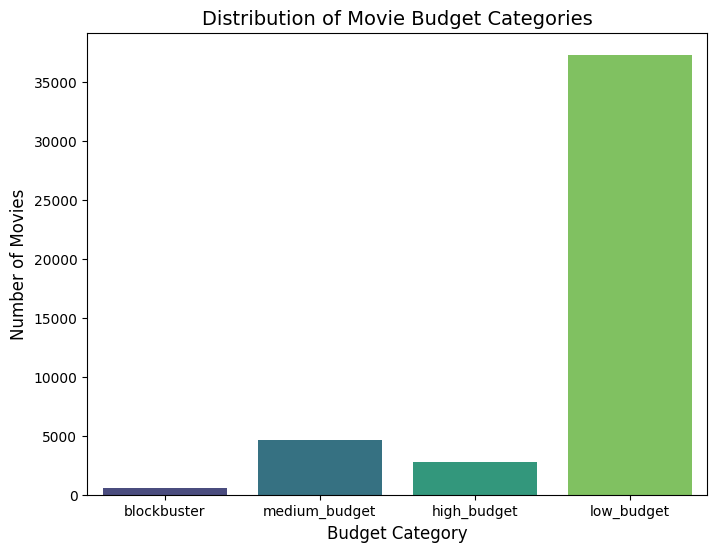

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=english_movies, x='budget_category', palette='viridis')

plt.title('Distribution of Movie Budget Categories', fontsize=14)
plt.xlabel('Budget Category', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()


### مجموعة بيانات الافلام 2

In [39]:
print(dfb.isna().sum())


tconst                   0
titleType                0
primaryTitle            20
originalTitle           20
isAdult                  1
startYear          1436206
endYear           11618952
runtimeMinutes     7872333
genres              521455
dtype: int64


In [40]:
for col in columns_to_check:
    print(f"\nColumn: {col}")
    print(dfb[col].dropna().unique())



Column: tconst
['tt0000001' 'tt0000002' 'tt0000003' ... 'tt9916852' 'tt9916856'
 'tt9916880']

Column: titleType
['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']

Column: primaryTitle
['Carmencita' 'Le clown et ses chiens' 'Poor Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: originalTitle
['Carmencita' 'Le clown et ses chiens' 'Pauvre Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: isAdult
[0.000e+00 1.000e+00 2.019e+03 1.981e+03 2.020e+03 2.017e+03 2.023e+03
 2.022e+03 2.011e+03 1.977e+03 1.978e+03 1.979e+03 1.966e+03 1.970e+03
 1.971e+03 1.972e+03 1.973e+03 1.974e+03 1.975e+03 1.988e+03 1.980e+03
 1.987e+03 1.986e+03 1.982e+03 1.985e+03 1.983e+03 1.984e+03 1.976e+03
 1.968e+03 1.969e+03 2.024e+03 1.967e+03 1.965e+03 1.958e+03 2.025e+03
 2.014e+03 2.005e+03]

Column: startYear
[1894. 1892. 1893. 1895. 1896. 1898. 1897. 

In [ ]:
# نحذف هاذان العامودان كونهما غير مفيدان 
dfb = dfb.drop(columns=['isAdult', 'endYear'])
#الافلام فقط 
dfb = dfb[dfb['titleType'] == 'movie'].reset_index(drop=True)
## المطابقة مع المجموعة الثانية
dfb = dfb[dfb['tconst'].isin(dfr['tconst'])].reset_index(drop=True)


In [ ]:
# هل يوجد تكرار؟
dfb['tconst'].duplicated().sum()

np.int64(0)

In [45]:
dfb.shape

(332117, 7)

In [ ]:
## 'primaryTitle' is in english
## 'originalTitle' in the original lang
# الاختلاف بالمسمى 
dfb['title_diff'] = dfb['primaryTitle'] != dfb['originalTitle']
print(dfb['title_diff'].value_counts())


title_diff
False    259325
True      72792
Name: count, dtype: int64


In [ ]:
# فقط الانجليزي
non_english_titles = dfb[
    (dfb['primaryTitle'] != dfb['originalTitle']) &
    (dfb['originalTitle'].str.contains(r"[éèêëàâîïôùûç]", flags=re.IGNORECASE, na=False) |
     dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))
]

# non_english_titles[['primaryTitle', 'originalTitle']]


/tmp/ipython-input-47-2880870646.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))


In [ ]:
non_english_letters = r"[éèêëàâîïôùûçäöüßñáíóúãõêčšž]"
non_english_words = r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans|" \
                    r"der|die|das|und|mit|für|von|auf|nicht|" \
                    r"del|los|las|por|con|sin|una|uno|" \
                    r"il|lo|la|gli|che|per|tra|fra|" \
                    r"и|на|не|что|это|как|с|по|из|у)\b"

dfb = dfb[
    (dfb['primaryTitle'] == dfb['originalTitle']) &
    (~dfb['originalTitle'].str.contains(non_english_letters, flags=re.IGNORECASE, na=False)) &
    (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))
].reset_index(drop=True)


/tmp/ipython-input-48-2673211226.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))


In [49]:
non_english_keywords = [
    'quo vadis', 'la dolce vita', 'la haine', 'le', 'la', 'el', 'una', 'un', 'der', 'die', 'das',
    'che', 'senza', 'avec', 'dans', 'sobre', 'del', 'de los', 'von', 'und', 'pour', 'tres',
    'sin', 'una', 'uno', 'l\'', 'du', 'des', 'di', 'en', 'au', 'sur', 'notte', 'giorno',
    'les', 'il', 'y', 'con', 'per', 'fra', 'entre'
]

pattern = '|'.join([rf'\b{word}\b' for word in non_english_keywords])

dfb = dfb[
    ~dfb['primaryTitle'].str.lower().str.contains(pattern, na=False) &
    ~dfb['originalTitle'].str.lower().str.contains(pattern, na=False)
].reset_index(drop=True)


In [50]:
dfb = dfb.drop(columns=['title_diff'])


In [51]:
dfb.shape

(224807, 7)

In [52]:
dfb.duplicated().sum()


np.int64(0)

In [ ]:
## هلئ هون صار عنا بس افلام انكليزية صار بدي اتاكد اذا مافي تكرار لنفس الفيلم
# هل يوجد ترارات بالافلام المصفاة ؟
## بناءً على 'primaryTitle' و 'originalTitle' و 'startYear' و 'genres'
dfb.duplicated(subset=['primaryTitle','originalTitle','startYear', 'genres']).sum()


np.int64(116)

In [54]:
duplicates = dfb[dfb.duplicated(subset=['primaryTitle','originalTitle', 'startYear', 'genres'], keep=False)]
duplicates.sort_values(by=['primaryTitle', 'startYear']).head(10)


tconst titleType    primaryTitle   originalTitle  startYear  \
102407  tt11500368     movie            2020            2020     2020.0   
113620  tt13424166     movie            2020            2020     2020.0   
179803   tt3463230     movie              37              37     2016.0   
193723   tt4882174     movie              37              37     2016.0   
25011    tt0069987     movie  A Doll's House  A Doll's House     1973.0   
25012    tt0069988     movie  A Doll's House  A Doll's House     1973.0   
159887  tt26680124     movie           After           After     2023.0   
162688  tt27653078     movie           After           After     2023.0   
126259  tt15440464     movie    Ajker Santan    Ajker Santan     1997.0   
128984   tt1593635     movie    Ajker Santan    Ajker Santan     1997.0   

       runtimeMinutes       genres  
102407            NaN  Documentary  
113620             94  Documentary  
179803             90        Drama  
193723             85        Drama  
25011             105        Drama  
25012             106        Drama  
159887             69        Drama  
162688             18        Drama  
126259            NaN        Drama  
128984            NaN        Drama

In [ ]:
# حذذذذذفففف
dfb = dfb.drop_duplicates(subset=['primaryTitle','originalTitle', 'startYear', 'genres']).reset_index(drop=True)


In [56]:
dfb.shape

(224691, 7)

In [ ]:
#تصفية فقط انواع الافلام المرغوبة 

unwanted_genres = ['Reality-TV', 'News', 'Documentary', 'Biography', 'Adult',
                 'Game-Show', 'Short', 'Sport', 'music','Talk-Show']

mask = dfb['genres'].apply(
    lambda g: not any(genre.strip() in unwanted_genres for genre in str(g).split(','))
)

dfb = dfb[mask].reset_index(drop=True)


In [58]:
dfb.shape

(176284, 7)

In [59]:
print(dfb.isna().sum())


tconst                0
titleType             0
primaryTitle          0
originalTitle         0
startYear            25
runtimeMinutes    22346
genres             7274
dtype: int64


In [ ]:
# تحويل
dfb['runtimeMinutes'] = pd.to_numeric(dfb['runtimeMinutes'], errors='coerce')
dfb = dfb[dfb['startYear'].notna() & dfb['runtimeMinutes'].notna()].reset_index(drop=True)


In [ ]:
# الافلام التي لاتملك نوع نسند قيمة "غير معلوم" لها
dfb['genres'] = dfb['genres'].fillna('Unknown')


In [ ]:
# تحويل
dfb['startYear'] = dfb['startYear'].astype(int)
dfb['runtimeMinutes'] = dfb['runtimeMinutes'].astype(int)


In [ ]:
print(dfb.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          int64
runtimeMinutes     int64
genres            object
dtype: object


مشكلة السنين الغير منطقية

In [ ]:
# هل يوجد سنوات غريبة الاطوار ؟
print("Start year range:", dfb['startYear'].min(), "to", dfb['startYear'].max())


Start year range: 1894 to 2025


In [65]:
## حددت يلي بدي
weird_years = dfb[(dfb['startYear'] > 2025) | (dfb['startYear'] < 1900)]
print(weird_years[['originalTitle', 'startYear']])


  originalTitle  startYear
0    Miss Jerry       1894


In [ ]:
## !يوجد اوقات مو منطقية متل 41 يوم
print("Min:", dfb['runtimeMinutes'].min())
print("Max:", dfb['runtimeMinutes'].max())


Min: 1
Max: 59460


In [ ]:
## تحديدها
dfb = dfb[(dfb['runtimeMinutes'] >= 30) & (dfb['runtimeMinutes'] <= 300)].reset_index(drop=True)


In [ ]:
## تصنيفها
def categorize_runtime(minutes):
    if minutes < 75:
        return 'short'
    elif minutes <= 120:
        return 'standard'
    else:
        return 'long'

dfb['runtimeCategory'] = dfb['runtimeMinutes'].apply(categorize_runtime)


In [69]:
print(dfb['runtimeCategory'].value_counts())


runtimeCategory
standard    109196
short        22640
long         21867
Name: count, dtype: int64


In [ ]:
# دمج التقييم مع مجموعة البيانات الثانية
dfb = dfb.merge(dfr[['tconst', 'averageRating']], on='tconst', how='left')


In [71]:
dfb.shape

(153703, 9)

**عمر الفلم**

In [ ]:
dfb['movie_age'] = 2025 - dfb['startYear']


In [73]:
dfb['averageRating'].describe()


count    153703.000000
mean          5.893529
std           1.383326
min           1.000000
25%           5.000000
50%           6.000000
75%           6.800000
max          10.000000
Name: averageRating, dtype: float64

**تصنيف التقييم**

In [74]:
## فيتشر جديدة
def rating_bucket(r):
    if r >= 8: return 'Excellent'
    elif r >= 6.5: return 'Good'
    elif r >= 5: return 'Average'
    else: return 'Poor'
dfb['rating_category'] = dfb['averageRating'].apply(rating_bucket)


## بيانات الممثلين

#### استخراج اسماء الممثلين

في بيانات imdb <br>
يوجد اربع مجموعات , يمكن ربطهم باستخدم المعرفات لاستخراج الممثلين و عدد افلامهم مع تقييم الفلامهم

In [ ]:
hanna1_df.head() # بيانات imdb

tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   

              genres runtimeCategory  averageRating  movie_age  \
0            Romance           short            5.4        131   
1            Unknown        standard            3.6        120   
2  Adventure,Fantasy        standard            5.1        117   
3                War           short            8.1        114   
4              Drama           short            5.5        114   

  rating_category age_group  
0         Average  100+ yrs  
1            Poor  100+ yrs  
2         Average  100+ yrs  
3       Excellent  100+ yrs  
4         Average  100+ yrs

In [ ]:
ratings_df.head(2) # تقييم الفلم

tconst  averageRating  numVotes
0  tt0000001            5.7      2165
1  tt0000002            5.5       296

In [ ]:
basics_df.head(2) # معلومات اضافية عن الفلم

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   

  isAdult startYear endYear runtimeMinutes             genres  
0       0      1894      \N              1  Documentary,Short  
1       0      1892      \N              5    Animation,Short

In [ ]:
principals_df.head(2) # معلومات اضافية عن الفيلم

tconst  ordering     nconst  category job characters
0  tt0000001         1  nm1588970      self  \N   ["Self"]
1  tt0000001         2  nm0005690  director  \N         \N

In [ ]:
names_df.head(2) # اسماء الممثلين

nconst    primaryName birthYear deathYear  \
0  nm0000001   Fred Astaire      1899      1987   
1  nm0000002  Lauren Bacall      1924      2014   

                    primaryProfession                           knownForTitles  
0        actor,miscellaneous,producer  tt0072308,tt0050419,tt0027125,tt0025164  
1  actress,soundtrack,archive_footage  tt0037382,tt0075213,tt0117057,tt0038355

In [ ]:
try:
    # Step 1
    # تحضير معلومات الممثلين من بيانات IMDB
    actors_in_principals_df = principals_df[
        (principals_df['category'] == 'actor') |
        (principals_df['category'] == 'actress')
    ].copy()
    print(f"Filtered principals to actors/actresses only. Shape: {actors_in_principals_df.shape}")

    #  دمج 
    #اختيار فقط السمات المهمة 
    actor_names_map_df = pd.merge(
        actors_in_principals_df[['tconst', 'nconst']], #نحتاج فقط هؤلاء كونهما المعرفات
        names_df[['nconst', 'primaryName']],
        on='nconst',
        how='left'
    )
    print(f"Merged actor principals with names. Shape: {actor_names_map_df.shape}")

    # Step 2
    # تجميع الممثلين لكل فلم
    # التعامل مع القيم الفارغية
    actor_names_map_df['primaryName'] = actor_names_map_df['primaryName'].fillna('')

    # تجميع كل اسماء الممثلين 
    movie_actors_aggregated = actor_names_map_df.groupby('tconst')['primaryName'].apply(
        lambda x: ' - '.join(x.drop_duplicates()) 
    ).reset_index()

    movie_actors_aggregated.rename(columns={'primaryName': 'actors_in_movie'}, inplace=True)
    print(f"Aggregated actors per movie. Shape: {movie_actors_aggregated.shape}")

    # Step 3
    # الدمج مع بيانات الافلام الثانية
    final_hanna_dataset = pd.merge(
        hanna1_df,
        movie_actors_aggregated,
        on='tconst',
        how='left' 
    )
    print(f"Final merge complete. Final dataset shape: {final_hanna_dataset.shape}")

    print("\nFinal Merged Dataset (first 5 rows):")
    print(final_hanna_dataset.head())

    print("\nColumn information (dtypes and non-null counts):")
    print(final_hanna_dataset.info())

    print(f"\nNumber of unique movies in the final dataset: {final_hanna_dataset['tconst'].nunique()}")

except FileNotFoundError as e:
    print(f"Error: title.principals.tsv not found. Please ensure it is in the '{output_dir}' directory.")
    print(f"Missing file: {e}")
    print("Run the download script first to get all the necessary files.")
except pd.errors.EmptyDataError as e:
    print(f"Error: title.principals.tsv is empty. This might indicate an issue with the download or decompression.")
    print(f"Error details: {e}")
except Exception as e:
    print(f"An unexpected error occurred during data loading or merging: {e}")


Filtered principals to actors/actresses only. Shape: (38826524, 6)
Merged actor principals with names. Shape: (38826524, 3)
Aggregated actors per movie. Shape: (6369148, 2)
Final merge complete. Final dataset shape: (153443, 13)

Final Merged Dataset (first 5 rows):
      tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   


In [ ]:
final_hanna_dataset.head()

tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   

              genres runtimeCategory  averageRating  movie_age  \
0            Romance           short            5.4        131   
1            Unknown        standard            3.6        120   
2  Adventure,Fantasy        standard            5.1        117   
3                War           short            8.1        114   
4              Drama           short            5.5        114   

  rating_category age_group                                    actors_in_movie  
0         Average  100+ yrs  Blanche Bayliss - William Courtenay - Chauncey...  
1            Poor  100+ yrs                     Antonio del Pozo - El Mochuelo  
2         Average  100+ yrs  L. Frank Baum - Frank Burns - George E. Wilson...  
3       Excellent  100+ yrs  Sydney Booth - Herbert Prior - James Gordon - ...  
4         Average  100+ yrs                    Suzanne de Baere - Theo Frenkel

استخراج الممثلين من البيانات المجمعة


In [ ]:
# التأكيد من انها من نوع "String" 
# و التعامل مع القيم الفارغة
final_hanna_dataset['actors_in_movie'] = final_hanna_dataset['actors_in_movie'].astype(str).fillna('')

# تصفية الصفوف الفارغة 
actors_present_df = final_hanna_dataset[final_hanna_dataset['actors_in_movie'] != ''].copy()
actors_present_df = actors_present_df[actors_present_df['actors_in_movie'] != 'nan'].copy() 

if actors_present_df.empty:
    print("No movies with actor information found in final_hanna_df. Cannot create actors_hanna_df.")
    actors_hanna_df = pd.DataFrame(columns=['actor', 'rating', 'movie']) # Create empty DataFrame with desired columns
else:
    #تقسيم الممثلين بالفلم الى قائمة من الممثلين 
    # الانفجار لصناعة صف لكل ممثل
    actors_hanna_df = actors_present_df.assign(actor=actors_present_df['actors_in_movie'].str.split(' - ')).explode('actor')

    # حذف الفراغات بالاسماء
    actors_hanna_df['actor'] = actors_hanna_df['actor'].str.strip()

    #اختيار السمات 
    actors_hanna_df = actors_hanna_df[['actor', 'averageRating', 'primaryTitle']].copy()

    #اعادة تسمية
    actors_hanna_df.rename(columns={
        'averageRating': 'rating',
        'primaryTitle': 'movie'
    }, inplace=True)

    print(f"\nactors_hanna_df created. Shape: {actors_hanna_df.shape}")
    print("\nactors_hanna_df (first 5 rows):")
    print(actors_hanna_df.head())

    print("\nUnique actors extracted:")
    print(actors_hanna_df['actor'].nunique())


actors_hanna_df created. Shape: (1383237, 3)

actors_hanna_df (first 5 rows):
               actor  rating       movie
0    Blanche Bayliss     5.4  Miss Jerry
0  William Courtenay     5.4  Miss Jerry
0     Chauncey Depew     5.4  Miss Jerry
1   Antonio del Pozo     3.6    Bohemios
1        El Mochuelo     3.6    Bohemios

Unique actors extracted:
541408


In [ ]:
actors_hanna_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383237 entries, 0 to 153442
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   actor   1383237 non-null  object 
 1   rating  1383237 non-null  float64
 2   movie   1383237 non-null  object 
dtypes: float64(1), object(2)
memory usage: 42.2+ MB


#### اسناد تقييم عام لافلام الممثلين




---

لقد قمنا بتطوير ثلاث طرق مختلفة للحصول على تقييم يمثل الممثل بشكل أكثر عدلاً ودقة:
1.  المتوسط البسيط لتقييم الممثلين
2. المتوسط البيزي (Bayesian Average)
3. تقييم مع العقوبة على قلة عدد الأصوات (Vote-Count Penalty)

---



In [ ]:
if actors_hanna_df.empty:
    print("actors_hanna_df is empty. Cannot create actors_rating_hanna_df.")
    actors_rating_hanna_df = pd.DataFrame(columns=[
        'actor', 'num_movies', 'average_rating', 'bayesian_avg_rating', 'penalty_avg_rating',
        'top_movie_name', 'top_movie_rating'
    ])
else:
    # دمح اعداد التصويت لكل فلم
    actors_hanna_df = actors_hanna_df.merge(
        leen_movies_df[['title', 'vote_count']],
        left_on='movie',
        right_on='title',
        how='left'
    )

    # المتوسط العام 
    global_avg = actors_hanna_df['rating'].mean()
    C = 5  # القيمة الافتراضية , يمكن تغييرها 

    def get_actor_statistics(group):
        num_movies = group['movie'].count()
        avg_rating = group['rating'].mean()

        idx_top_movie = group['rating'].idxmax()
        top_movie_name = group.loc[idx_top_movie, 'movie']
        top_movie_rating = group.loc[idx_top_movie, 'rating']

        # Bayesian
        sum_ratings = group['rating'].sum()
        bayesian_avg = (C * global_avg + sum_ratings) / (C + num_movies)

        # Penalty system:
        total_votes = group['vote_count'].sum()

        # تم تحديد الحدود عبر تحليل اعداد الاصوات
        if pd.isna(total_votes):
            divisor = 4
        elif total_votes < 10:
            divisor = 4
        elif total_votes < 31:
            divisor = 3
        elif total_votes < 101:
            divisor = 2
        else:
            divisor = 1

        penalty_avg = avg_rating / divisor

        return pd.Series({
            'num_movies': num_movies,
            'average_rating': round(avg_rating, 2),
            'bayesian_avg_rating': round(bayesian_avg, 2),
            'penalty_avg_rating': round(penalty_avg, 2),
            'top_movie_name': top_movie_name,
            'top_movie_rating': round(top_movie_rating, 1)
        })

    actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()

    print(f"\nactors_rating_hanna_df created. Shape: {actors_rating_hanna_df.shape}")
    print("\nactors_rating_hanna_df:")
    print(actors_rating_hanna_df[['actor', 'num_movies', 'average_rating',
                                  'bayesian_avg_rating', 'penalty_avg_rating',
                                  'top_movie_name', 'top_movie_rating']])



actors_rating_hanna_df created. Shape: (541408, 7)

actors_rating_hanna_df:
                        actor  num_movies  average_rating  \
0                                      21            5.95   
1                     $2 Tony           1            5.40   
2                    'Ana Ika           1            5.30   
3          'Angry' Joe Cleary           1            9.00   
4              'Anissa LaShay           1            6.60   
...                       ...         ...             ...   
541403           Þór Tulinius           1            3.70   
541404            Þóra Dungal           1            4.50   
541405  Þórhallur Þórhallsson           2            7.75   
541406        Þórir Waagfjörð           1            5.20   
541407         þórður Bogason           1            4.50   

        bayesian_avg_rating  penalty_avg_rating               top_movie_name  \
0                      5.93                1.49           Wally Meets Popeye   
1                      5.78   

/tmp/ipython-input-62-600928831.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()


In [ ]:
actors_rating_hanna_df.head()

actor  num_movies  average_rating  bayesian_avg_rating  \
0               $2 Tony           1            5.40                 5.78   
1              'Ana Ika           1            5.30                 5.77   
2    'Angry' Joe Cleary           1            9.00                 6.38   
3        'Anissa LaShay           1            6.60                 5.98   
4  'Baby' Carmen De Rue           6            5.42                 5.62   

   penalty_avg_rating               top_movie_name  top_movie_rating  
0                1.35        Spacebong Beach Babes               5.4  
1                1.32        It Only Takes a Night               5.3  
2                2.25                A Joyce Story               9.0  
3                1.65  Two's A Couple, 3's A Crowd               6.6  
4                1.35               Going Straight               5.9

In [ ]:
print(actors_rating_hanna_df[['average_rating', 'bayesian_avg_rating', 'penalty_avg_rating']].describe())

       average_rating  bayesian_avg_rating  penalty_avg_rating
count   541408.000000        541408.000000       541408.000000
mean         5.855979             5.853307            2.001699
std          1.365485             0.314547            1.424743
min          1.000000             3.080000            0.250000
25%          5.000000             5.670000            1.300000
50%          5.900000             5.870000            1.580000
75%          6.700000             6.050000            1.900000
max         10.000000             8.370000            9.800000


In [ ]:
actors_rating_hanna_df['num_movies'].describe()

count    541360.000000
mean          2.555035
std           5.978147
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         520.000000
Name: num_movies, dtype: float64

#### دعنا نرى ان امكن لنا ان نستفاد من مجموعة البيانات الثانية لاثراء هذه الميزة

In [ ]:
actors_df_kaggle.head()

Actor    ActorID                   Film  Year  Votes  Rating  \
0  Fred Astaire  nm0000001            Ghost Story  1981   7731     6.3   
1  Fred Astaire  nm0000001        The Purple Taxi  1977    533     6.6   
2  Fred Astaire  nm0000001  The Amazing Dobermans  1976    369     5.3   
3  Fred Astaire  nm0000001   The Towering Inferno  1974  39888     7.0   
4  Fred Astaire  nm0000001              Midas Run  1969    123     4.8   

      FilmID  
0  tt0082449  
1  tt0076851  
2  tt0074130  
3  tt0072308  
4  tt0064664

In [ ]:

value = 'Al Pacino'
actors_df_kaggle[actors_df_kaggle['Actor'] == value]

Actor    ActorID                              Film  Year    Votes  \
8521  Al Pacino  nm0000199  Once Upon a Time... In Hollywood  2019   569358   
8522  Al Pacino  nm0000199                      The Irishman  2019   333018   
8523  Al Pacino  nm0000199                           Hangman  2017    14970   
8524  Al Pacino  nm0000199            The Pirates of Somalia  2017     9012   
8525  Al Pacino  nm0000199                        Misconduct  2016    15136   
8526  Al Pacino  nm0000199                     Danny Collins  2015    30170   
8527  Al Pacino  nm0000199                        Manglehorn  2014     7220   
8528  Al Pacino  nm0000199                      The Humbling  2014     6425   
8529  Al Pacino  nm0000199                            Salome  2013     1704   
8530  Al Pacino  nm0000199                  We're No Animals  2013      540   
8531  Al Pacino  nm0000199                     Stand Up Guys  2012    53479   
8532  Al Pacino  nm0000199                     Jack and Jill  2011    78892   
8533  Al Pacino  nm0000199                 The Son of No One  2011    16515   
8534  Al Pacino  nm0000199                    Righteous Kill  2008    85179   
8535  Al Pacino  nm0000199                  Ocean's Thirteen  2007   324019   
8536  Al Pacino  nm0000199                        88 Minutes  2007    74270   
8537  Al Pacino  nm0000199                 Two for the Money  2005    43655   
8538  Al Pacino  nm0000199            The Merchant of Venice  2004    35228   
8539  Al Pacino  nm0000199                       The Recruit  2003   129683   
8540  Al Pacino  nm0000199                             Gigli  2003    46129   
8541  Al Pacino  nm0000199                          Insomnia  2002   277712   
8542  Al Pacino  nm0000199                            S1m0ne  2002    58907   
8543  Al Pacino  nm0000199                     People I Know  2002    11001   
8544  Al Pacino  nm0000199                    Chinese Coffee  2000     3925   
8545  Al Pacino  nm0000199                       The Insider  1999   161151   
8546  Al Pacino  nm0000199                  Any Given Sunday  1999   112789   
8547  Al Pacino  nm0000199              The Devil's Advocate  1997   335704   
8548  Al Pacino  nm0000199                     Donnie Brasco  1997   283047   
8549  Al Pacino  nm0000199                         City Hall  1996    19610   
8550  Al Pacino  nm0000199                              Heat  1995   584859   
8551  Al Pacino  nm0000199                          Two Bits  1995     3243   
8552  Al Pacino  nm0000199                     Carlito's Way  1993   202882   
8553  Al Pacino  nm0000199                  Scent of a Woman  1992   267805   
8554  Al Pacino  nm0000199               Glengarry Glen Ross  1992    96710   
8555  Al Pacino  nm0000199                Frankie and Johnny  1991    29521   
8556  Al Pacino  nm0000199           The Godfather: Part III  1990   364339   
8557  Al Pacino  nm0000199                        Dick Tracy  1990    58144   
8558  Al Pacino  nm0000199               The Local Stigmatic  1990     1438   
8559  Al Pacino  nm0000199                       Sea of Love  1989    38387   
8560  Al Pacino  nm0000199                        Revolution  1985     6407   
8561  Al Pacino  nm0000199                          Scarface  1983   751058   
8562  Al Pacino  nm0000199                   Author! Author!  1982     5015   
8563  Al Pacino  nm0000199                          Cruising  1980    19403   
8564  Al Pacino  nm0000199           ...and justice for all.  1979    31312   
8565  Al Pacino  nm0000199                   Bobby Deerfield  1977     3829   
8566  Al Pacino  nm0000199                 Dog Day Afternoon  1975   237872   
8567  Al Pacino  nm0000199            The Godfather: Part II  1974  1143820   
8568  Al Pacino  nm0000199                           Serpico  1973   111301   
8569  Al Pacino  nm0000199                         Scarecrow  1973    15719   
8570  Al Pacino  nm0000199                     The Godfather

In [ ]:


avg_rating_df = actors_df_kaggle.groupby('Actor')['Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Rating': 'AvgRating'}, inplace=True)
print(avg_rating_df.tail())



                  Actor  AvgRating
9610    Zooey Deschanel   6.380000
9611        Zosia Mamet   5.937500
9612      Zsa Zsa Gabor   5.846154
9613        Zulay Henao   4.957143
9614  Zuleikha Robinson   6.100000


In [ ]:
avg_rating_df=avg_rating_df.drop(columns='Actor_lower')


In [ ]:
avg_rating_df

Actor  AvgRating
0               50 Cent   5.579167
1            A Martinez   5.710000
2          A.J. Buckley   5.480769
3             A.J. Cook   5.569231
4           A.J. Langer   5.150000
...                 ...        ...
9610    Zooey Deschanel   6.380000
9611        Zosia Mamet   5.937500
9612      Zsa Zsa Gabor   5.846154
9613        Zulay Henao   4.957143
9614  Zuleikha Robinson   6.100000

[9615 rows x 2 columns]

In [ ]:
print("\n--- Step 1: Normalize Actor Names for Matching ---")

# إنشاء عمود مؤقت لأسماء الممثلين الموحدة في إطار البيانات actors_rating_hanna_df


actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# إنشاء عمود مؤقت لأسماء الممثلين الموحدة في إطار البيانات avg_rating_df

avg_rating_df['actor_normalized'] = avg_rating_df['Actor'].str.lower().str.replace(r'\s+', '', regex=True)

print("\nNormalized Actor Names (samples):")
print("actors_rating_hanna_df['actor_normalized'] samples:", actors_rating_hanna_df['actor_normalized'].head().tolist())
print("avg_rating_df['actor_normalized'] samples:", avg_rating_df['actor_normalized'].head().tolist())


print("\n--- Step 2: Check Common Actors (based on normalized names) ---")

# الحصول على أسماء الممثلين الموحدة الفريدة من كلا إطاري البيانات

hanna_actors_set = set(actors_rating_hanna_df['actor_normalized'].unique())
avg_actors_set = set(avg_rating_df['actor_normalized'].unique())

# البحث عن الممثلين المشتركين

common_actors = hanna_actors_set.intersection(avg_actors_set)

print(f"\nNumber of unique actors in actors_rating_hanna_df: {len(hanna_actors_set)}")
print(f"Number of unique actors in avg_rating_df: {len(avg_actors_set)}")
print(f"Number of common actors found: {len(common_actors)}")
print("\nCommon actors (normalized names, first 10 if many):")
if common_actors:
    for i, actor in enumerate(list(common_actors)):
        if i >= 10:
            print("...")
            break
        print(actor)
else:
    print("No common actors found between the two DataFrames based on normalized names.")


--- Step 1: Normalize Actor Names for Matching ---

Normalized Actor Names (samples):
actors_rating_hanna_df['actor_normalized'] samples: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
avg_rating_df['actor_normalized'] samples: ['50cent', 'amartinez', 'a.j.buckley', 'a.j.cook', 'a.j.langer']

--- Step 2: Check Common Actors (based on normalized names) ---

Number of unique actors in actors_rating_hanna_df: 540984
Number of unique actors in avg_rating_df: 9615
Number of common actors found: 8992

Common actors (normalized names, first 10 if many):
haroldlloyd
sheridansmith
debramessing
brandynorwood
jeffwahlberg
hughlaurie
dwightschultz
bobsaget
jayedavidson
bradhall
...


بقراءة لهذه الاحصائيات : <br>
* Number of unique actors in actors_rating_hanna_df: 540984
* Number of unique actors in avg_rating_df: 9615
* Number of common actors found: 8992
<br>
يجد ان استخدام البيانات الثانية هو مضيعة للوقت كونها اصغر و تتشارك بنسبة كبيرة بين الممثيلن

In [ ]:
leen_movies_df['credits']

0        Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...
1        Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...
2        Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...
3        Anthony Ramos-Dominique Fishback-Luna Lauren V...
4        Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...
                               ...                        
41394    Richard Talmadge-Barbara Bedford-Nora Cecil-Da...
41395    Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...
41396                                         Steve Hudson
41397    Mensun Bound-John Shears-Nicolas Vincent-Dan S...
41398    Dorothy Mackaill-Sidney Blackmer-Julanne Johns...
Name: credits, Length: 41399, dtype: object

#### دمج بيانات الممثلين مع الافلام

In [ ]:
# توحيد أسماء الممثلين في actors_rating_hanna_df للبحث السريع
actors_rating_hanna_df['actor_normalized_for_lookup'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

#  إنشاء قواميس للبحث السريع عن جميع التقييمات الثلاثة
actor_avg_rating_map = pd.Series(
    actors_rating_hanna_df['average_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_bayes_rating_map = pd.Series(
    actors_rating_hanna_df['bayesian_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_penalty_rating_map = pd.Series(
    actors_rating_hanna_df['penalty_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

print("\n--- Prepared actors_rating_hanna_df and Lookup Maps ---")
print("Sample normalized actor names from hanna_df:", actors_rating_hanna_df['actor_normalized_for_lookup'].head().tolist())
print("Size of actor_avg_rating_map:", len(actor_avg_rating_map))

# توحيد بيانات الممثلين في leen_movies_df
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# دالة مساعدة لحساب المتوسط من أفضل 35% من التقييمات
def get_top_35_avg(normalized_actors_list, rating_map):
    found_ratings = [
        (actor_name_normalized, rating_map[actor_name_normalized])
        for actor_name_normalized in normalized_actors_list
        if actor_name_normalized in rating_map
    ]
    if not found_ratings:
        return np.nan

    # ترتيب حسب التقييم تنازلياً
    sorted_ratings = sorted(found_ratings, key=lambda x: x[1], reverse=True)
    
    # top 35%
    k = max(1, int(len(sorted_ratings) * 0.35))
    top_ratings = [r[1] for r in sorted_ratings[:k]]

    return round(np.mean(top_ratings), 2)
#  تطبيق لحساب جميع المقاييس الثلاثة باستخدام أفضل 35 بالمئة

leen_movies_df['actors_avg_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_top_35_avg(x, actor_avg_rating_map)
)

leen_movies_df['actors_bayesian_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_top_35_avg(x, actor_bayes_rating_map)
)

leen_movies_df['actors_penalty_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_top_35_avg(x, actor_penalty_rating_map)
)

print("\n--- Final leen_movies_df with actor ratings ---")
print(leen_movies_df[['title', 'actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].head(10))

# 6️⃣ تنظيف الأعمدة المؤقتة
print("\n--- Cleaning up temporary columns ---")
leen_movies_df.drop(columns=['normalized_credits_list'], inplace=True)
actors_rating_hanna_df.drop(columns=['actor_normalized_for_lookup'], inplace=True)

print("\n--- Cleaned leen_movies_df (final look) ---")
print(leen_movies_df.head())
print("\nleen_movies_df info:")
print(leen_movies_df.info())



--- Prepared actors_rating_hanna_df and Lookup Maps ---
Sample normalized actor names from hanna_df: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
Size of actor_avg_rating_map: 541032

--- Final leen_movies_df with actor ratings ---
                                 title  actors_avg_rating  \
0                    Meg 2: The Trench               5.48   
1                  The Pope's Exorcist               5.75   
2                 Deadpool & Wolverine               6.08   
3     Transformers: Rise of the Beasts               6.05   
4                       Dune: Part Two               5.88   
5                Venom: The Last Dance               6.05   
6    Ant-Man and the Wasp: Quantumania               6.00   
7                            Creed III               6.13   
8              Insidious: The Red Door               5.80   
9  Spider-Man: Across the Spider-Verse               5.98   

   actors_bayesian_rating  actors_penalty_rating  
0                    5.74 

In [ ]:
print(leen_movies_df[['actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].describe())



       actors_avg_rating  actors_bayesian_rating  actors_penalty_rating
count       39370.000000            39370.000000           39370.000000
mean            5.673681                5.801008               4.092746
std             0.652138                0.285929               1.353377
min             1.300000                3.510000               0.320000
25%             5.390000                5.650000               3.250000
50%             5.800000                5.840000               4.350000
75%             6.080000                6.000000               5.090000
max             9.680000                7.600000               9.100000


In [ ]:
leen_movies_df.head()

id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies release_date  \
0    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2    5410.496  Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3    5409.104  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4    4742.163                                 Legendary Pictures   2024-02-27   

        budget       revenue  ...  \
0  129000000.0  3.520565e+08  ...   
1   18000000.0  6.567582e+07  ...   
2  200000000.0  1.326387e+09  ...   
3  200000000.0  4.070455e+08  ...   
4  190000000.0  6.838137e+08  ...   

                                             credits tagline_sentiment  \
0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...                 0   
1  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...                 1   
2  Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...                 0   
3  Anthony Ramos-Dominique Fishback-Luna Lauren V...                 0   
4  Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...                -1   

         profit  release_year  release_month release_day  unique_actors_count  \
0  2.230565e+08          2023              8           2                   27   
1  4.767582e+07          2023              4           5                   30   
2  1.126387e+09          2024              7          24                   57   
3  2.070455e+08          2023              6           6                   38   
4  4.938137e+08          2024              2          27                  105   

   actors_avg_rating  actors_bayesian_rating  actors_penalty_rating  
0               5.48                    5.74                   5.10  
1               5.75                    5.83                   4.45  
2               6.08                    6.03                   4.97  
3               6.05                    5.93                   4.84  
4               5.88                    5.90                   3.81  

[5 rows x 25 columns]

In [ ]:
leen_movies_df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating'],
      dtype='object')

#### تحليل الافلام التي لاتحمل تقييم للممثلين فيها

In [ ]:
missing_actor_rating=leen_movies_df[leen_movies_df['actors_avg_rating'].isna()]
missing_actor_rating['budget'].describe()

count    2.029000e+03
mean     2.064858e+04
std      2.760088e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: budget, dtype: float64

In [ ]:
llist=missing_actor_rating['credits'].sample(20).tolist()
llist

['Paul Fronczak',
 'Curt Chaplin-Barry Bonds-Mike Scioscia-Tim Salmon-Dusty Baker-Kenny Lofton-David Eckstein-John Lackey',
 'Simon Rattle-Anne-Sophie Mutter',
 'Pat Marcattilio',
 'John Izzard-J.R.R. Tolkien-Barbara Hepworth',
 'Keith Jarrett',
 'Ciarán Williams Young-Sapphira O’Connor-Samuel Spivey-Megan Whitehead-Chloe Asquith Brown-Noah Dolan',
 'Colin Montgomerie-Corey Pavin-Lee Westwood-Martin Kaymer-Graeme McDowell-Jim Furyk-Ian Poulter-Steve Stricker-Ross Fisher-Miguel Ángel Jiménez',
 'Timothy "Speed" Levitch',
 'Doris Eagle-Thurman Horse-Michael Little Boy-Rita Little Boy',
 'Julian Bayliss-Simon Willcock-Gabriela Bittencourt-Hermenegildo Matimele-Ara Monadjem',
 'Jon Ayres-Rhys Palmer-Heikki Tolonen',
 'Augie DeAngelo',
 'Kristin Luna-Scott van Velsor-JUURI-Jenny Ustick-Paris Woodhull-Nicole Salgar-Cymone Wilder-Sarah Painter-Kim Radford-Whitney Herrington-Wanda Sobieski-John Sellers-Sara Beth Urban-Melissa Shuran-Colin Shuran',
 'Sean D. Ross-Ayla Kempler-Elaine Kempler',
 


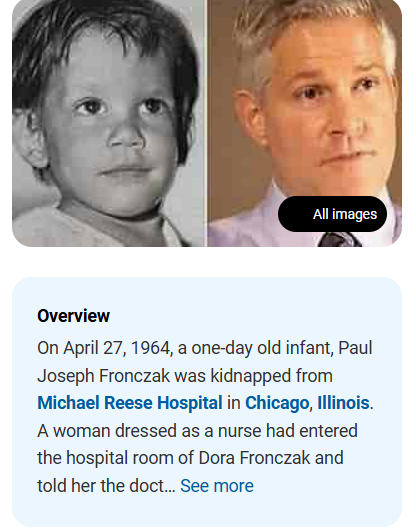

بعض هؤلاء ليسوا ممثلين اصلا !

لنحلل اكثر , دعنا نرى السمات الرئيسية

In [ ]:
missing_actor_rating=missing_actor_rating.drop(columns=['overview','popularity','release_date','budget','status', 'tagline', 'vote_average', 'vote_count','release_day', 'unique_actors_count', 'actors_avg_rating'])

In [ ]:
missing_actor_rating.head(5)

id                      title             genres original_language  \
2445  923632        The Tinder Swindler  Documentary-Crime                en   
4064  489988  Three Identical Strangers        Documentary                en   
4296  789371           Kings Of Astoria        Crime-Drama                en   
4559    1776                 Jesus Camp        Documentary                en   
4691  675776                    Persona   Thriller-Romance                en   

              production_companies    revenue  runtime  \
2445  RAW-Gaspin Media-AGC Studios        0.0    114.0   
4064      Channel 4 Television-RAW  1041955.0     97.0   
4296              Davi Productions        0.0    105.0   
4559     A&E IndieFilms-Loki Films  1013596.0     84.0   
4691                    FILOMINATI        0.0     75.0   

                                                credits  tagline_sentiment  \
2445  Shimon Yehuda Hayut-Cecilie Fjellhøy-Pernilla ...                  1   
4064  David Kellman-Robert Shafran-Edward Galland-La...                  1   
4296     Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa                  0   
4559  Becky Fischer-Mike Papantonio-Ted Haggard-Lou ...                  0   
4691                       Nick Cause-Angelina Mosesova                 -1   

         profit  release_year  release_month  
2445        0.0          2022              2  
4064  1041955.0          2018              6  
4296    -5000.0          2022              6  
4559  1013596.0          2006              9  
4691        0.0          2022             10

In [ ]:

documentary_count = missing_actor_rating['genres'].str.contains('Documentary', na=False).sum()

print(f"Number of movies in missing_actor_rating with 'Documentary' genre: {documentary_count}")


Number of movies in missing_actor_rating with 'Documentary' genre: 1385


حسنا , اغليبتهم وئاقيات , دعنا نتخلص منها

In [ ]:

# التحقق من الحجم الأولي لإطار البيانات

initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# إسقاط الصفوف التي يحتوي عمود "الأنواع" (genres) فيها على السلسلة النصية 'وثائقي' (Documentary)
# العلامة '~' تعكس القناع المنطقي. na=False يتعامل مع قيم NaN على أنها لا تحتوي على 'وثائقي'.
missing_actor_rating = missing_actor_rating[~missing_actor_rating['genres'].str.contains('Documentary', na=False)].copy()

# التحقق من الحجم بعد الإسقاط

final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping Documentary: {missing_actor_rating.shape}")
print(f"Number of rows dropped (Documentary genre): {dropped_rows}")

# عرض الصفوف القليلة الأولى من إطار البيانات المعدل
print("\nmissing_actor_rating after dropping Documentary (first 5 rows):")

In [ ]:
missing_actor_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 4296 to 41377
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    644 non-null    int64  
 1   title                 644 non-null    object 
 2   genres                644 non-null    object 
 3   original_language     644 non-null    object 
 4   production_companies  644 non-null    object 
 5   revenue               644 non-null    float64
 6   runtime               644 non-null    float64
 7   credits               644 non-null    object 
 8   tagline_sentiment     644 non-null    int64  
 9   profit                644 non-null    float64
 10  release_year          644 non-null    int64  
 11  release_month         644 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 65.4+ KB


In [ ]:
missing_actor_rating.head(5)

id                       title               genres  \
4296  789371            Kings Of Astoria          Crime-Drama   
4691  675776                     Persona     Thriller-Romance   
5800  787282  Beyond: The Motion Picture      Science Fiction   
6221  963804                     Cascade  Music-Romance-Drama   
6225  950120                 Acidic Anna      Horror-Thriller   

     original_language                              production_companies  \
4296                en                                  Davi Productions   
4691                en                                        FILOMINATI   
5800                en  Innovative Arts-Underdog Pictures-Jackson Motion   
6221                en                           Ultraviolet Productions   
6225                en                                 Space Czech Films   

      revenue  runtime                                            credits  \
4296      0.0    105.0     Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa   
4691      0.0     75.0                       Nick Cause-Angelina Mosesova   
5800      0.0     91.0  Lukas Jackson-Marius Johnsson-Sander R. D. Lar...   
6221      0.0     40.0  James Seed-Paige Hurrell-Kalvin Taylor-Delaney...   
6225      0.0     73.0  Thomas Cam-Dasha Diviskova-Dimitrah Vlad-Stell...   

      tagline_sentiment  profit  release_year  release_month  
4296                  0 -5000.0          2022              6  
4691                 -1     0.0          2022             10  
5800                  1  -500.0          2023             11  
6221                  0  -400.0          2022              6  
6225                 -1 -1000.0          2022              6

In [ ]:
missing_actor_rating['profit'].describe()

count    6.440000e+02
mean     1.522974e+05
std      3.941098e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.999900e+07
Name: profit, dtype: float64

In [ ]:
(missing_actor_rating['revenue']==0).sum()

np.int64(604)

بعضعهم لم يأتو باي ارادات , و هذا يمكن ان يفسر بانها قيم مفقودة او انها افلام <br>
straight to dvd

In [ ]:
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")
missing_actor_rating = missing_actor_rating[missing_actor_rating['revenue'] != 0].copy()
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with revenue == 0: {missing_actor_rating.shape}")
print(f"Number of rows dropped (revenue == 0): {dropped_rows}")

print("\nmissing_actor_rating after dropping revenue == 0 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()

Initial shape of missing_actor_rating: (644, 12)
Shape of missing_actor_rating after dropping rows with revenue == 0: (40, 12)
Number of rows dropped (revenue == 0): 604

missing_actor_rating after dropping revenue == 0 (first 5 rows):
           id                title                 genres original_language  \
6289   949273  TacoTown: The Movie        Thriller-Comedy                en   
19463  711615           Batman Jr.                 Action                en   
21801  896605            Slay Ride  Comedy-Horror-Mystery                en   
28271  672815   ALL COPS AIN'T BAD                 Comedy                en   
29094  748806             Brothers                  Drama                en   

               production_companies   revenue  runtime  \
6289               TacoTales Movies       1.0     50.0   
19463                         TOCCU    1700.0    116.0   
21801  McLean & Cipullo Productions    2000.0     60.0   
28271                  VH2 Networks  350000.0     61.0   

In [ ]:
missing_actor_rating.sample(5)

id                              title                 genres  \
40679  817809                Come Forth Reverend        Action-Thriller   
21801  896605                          Slay Ride  Comedy-Horror-Mystery   
29914  742459                              Sosha         Comedy-Romance   
39793  709456                      Miss Gangster          Drama-Romance   
40458  895937  Jorja Smith - Live at Glastonbury                  Music   

      original_language          production_companies   revenue  runtime  \
40679                en                  Luckee Films      28.0     39.0   
21801                en  McLean & Cipullo Productions    2000.0     60.0   
29914                en          LIM STUDIO-STONMEDIA    1800.0     50.0   
39793                en           CJ HK Entertainment  486842.0     92.0   
40458                en                           BBC     100.0     56.0   

                                                 credits  tagline_sentiment  \
40679  Coleton McCants-Gavin Ryan-Gavin Robbins-Culle...                  0   
21801  Collin McLean-Dominic Cipullo-Trey Gourgeot-No...                  1   
29914  Lebogang Lebang-Themba Nene-Lebo Lebang-Mbalen...                  0   
39793  Nguyễn Minh Tú-Cao Thiên Trang-Hồng Đào-Chế Ng...                  1   
40458                                        Jorja Smith                  0   

         profit  release_year  release_month  
40679      26.0          2021              1  
21801   -3001.0          2022              6  
29914       0.0          2022             11  
39793  486842.0          2019             11  
40458       0.0          2019              6

In [ ]:
(missing_actor_rating['runtime'] < 60).sum()

np.int64(17)

بعضهم ليسوا افلام اصلاً

In [ ]:
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")
missing_actor_rating = missing_actor_rating[~(missing_actor_rating['runtime'] < 60)].copy()
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows
print(f"Shape of missing_actor_rating after dropping rows with runtime < 60: {missing_actor_rating.shape}")
print(f"Number of rows dropped (runtime < 60): {dropped_rows}")

print("\nmissing_actor_rating after dropping runtime < 60 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()


Initial shape of missing_actor_rating: (40, 12)
Shape of missing_actor_rating after dropping rows with runtime < 60: (23, 12)
Number of rows dropped (runtime < 60): 17

missing_actor_rating after dropping runtime < 60 (first 5 rows):
           id                   title                 genres  \
19463  711615              Batman Jr.                 Action   
21801  896605               Slay Ride  Comedy-Horror-Mystery   
28271  672815      ALL COPS AIN'T BAD                 Comedy   
30770  591660  ROW Ladies Night Out 4           Action-Drama   
30960  587961  Queens of Combat QOC 2           Action-Drama   

      original_language          production_companies   revenue  runtime  \
19463                en                         TOCCU    1700.0    116.0   
21801                en  McLean & Cipullo Productions    2000.0     60.0   
28271                en                  VH2 Networks  350000.0     61.0   
30770                en          Reality Of Wrestling    6555.0    147.0   
3

In [ ]:
missing_actor_rating

id                                     title  \
19463  711615                                Batman Jr.   
21801  896605                                 Slay Ride   
28271  672815                        ALL COPS AIN'T BAD   
30770  591660                    ROW Ladies Night Out 4   
30960  587961                    Queens of Combat QOC 2   
32132  591658                    ROW Ladies Night Out 3   
32210  587980                   Queens Of Combat QOC 12   
33430  588002                   Queens Of Combat QOC 22   
33765  591659                   ROW Ladies Night Out II   
34181  588007                   Queens Of Combat QOC 25   
34198  587995                   Queens Of Combat QOC 20   
35197  497702                              Street Hoopz   
35254  591132  Queens of Combat Invade Supercon Night 1   
35983  588005                   Queens Of Combat QOC 24   
36593  587979                   Queens Of Combat QOC 11   
37036  933511                       I was not murdered.   
37206  594791                   Girl Fight Wrestling 11   
37463  587999                   Queens Of Combat QOC 21   
37562  587983                   Queens Of Combat QOC 14   
37754  375036                    Vipin and Rosh Wedding   
38286  588003                   Queens Of Combat QOC 23   
39241  587985                   Queens Of Combat QOC 15   
39793  709456                             Miss Gangster   

                      genres original_language          production_companies  \
19463                 Action                en                         TOCCU   
21801  Comedy-Horror-Mystery                en  McLean & Cipullo Productions   
28271                 Comedy                en                  VH2 Networks   
30770           Action-Drama                en          Reality Of Wrestling   
30960           Action-Drama                en    Queens Of Combat-HighSpots   
32132           Action-Drama                en          Reality Of Wrestling   
32210           Action-Drama                en              Queens Of Combat   
33430           Action-Drama                en              Queens Of Combat   
33765           Action-Drama                en          Reality Of Wrestling   
34181           Action-Drama                en              Queens Of Combat   
34198           Action-Drama                en              Queens Of Combat   
35197     Action-Crime-Drama                en                Lee Production   
35254           Drama-Action                en              Queens Of Combat   
35983           Action-Drama                en              Queens Of Combat   
36593           Action-Drama                en              Queens Of Combat   
37036          Drama-Mystery                en                Hobnob Studios   
37206           Action-Drama                en                    Girl Fight   
37463           Action-Drama                en              Queens Of Combat   
37562           Drama-Action                en              Queens Of Combat   
37754              Adventure                en                       J.D MAX   
38286           Drama-Action                en              Queens Of Combat   
39241           Action-Drama                en              Queens Of Combat   
39793          Drama-Romance                en           CJ HK Entertainment   

        revenue  runtime                                            credits  \
19463    1700.0    116.0     Nicholas Onciul-Zachary Onciul-Samantha Onciul   
21801    2000.0     60.0  Collin McLean-Dominic Cipullo-Trey Gourgeot-No...   
28271  350000.0     61.0                                    Daryll Triplett   
30770    6555.0    147.0  Alex Gracia-Vannarah Riggs-Kiera Hogan-Iveliss...   
30960    5495.0    120.0  Amy Jefferson-Christina Garibaldi-Rachel Barri...   
32132    9885.0    122.0  Ivelisse Vélez-Kiera Hogan-Shojo Machiko-Calle...   
32210   13230.0     78.0  Dominique Fabiano-Taeler Conrad-Mellen-Tessa B...   
33430    8999.0     90.0  Kiera Hogan-Oli

هنا نرى افلام وئاقية و لكنها لم تصنف انها وثائقية , و نرى بعض عروض المصارعة

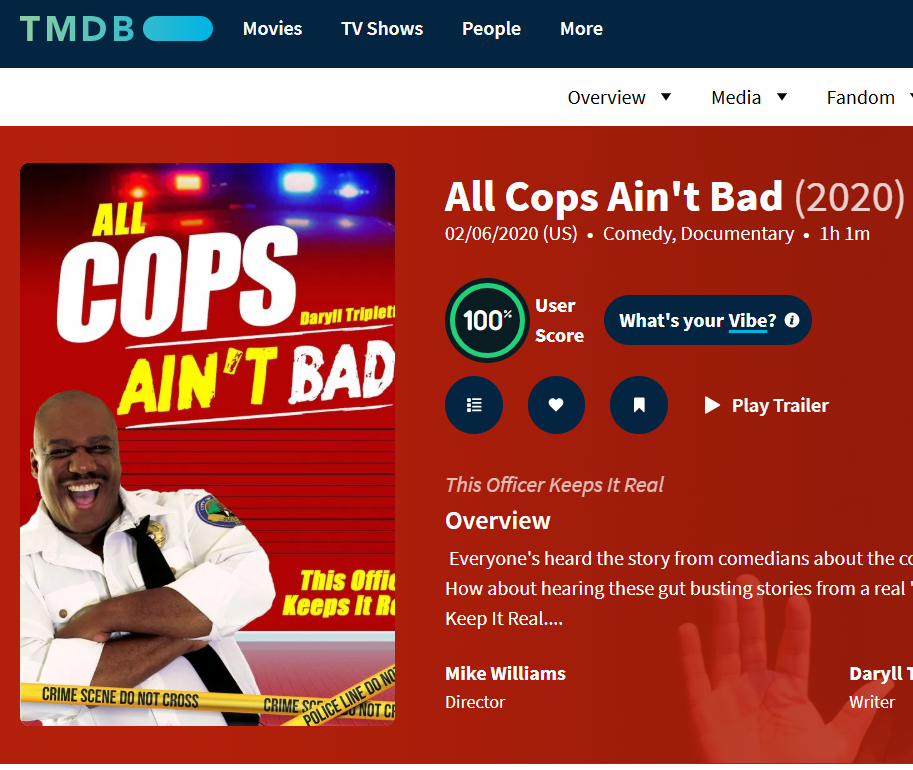

لذلك سوف نقوم بحذفهم من البيانات الاصلية

## الاوسكار
---
features that will add more favouritism to movies/actors  
ميزات ستضيف تميز اكثر للممثلين والافلام


---
#### سمة الاوسكار للافلام
---

In [ ]:

#  التوحيد
def normalize_title(title):
    if pd.isna(title):
        return ""
    title = title.lower()
    title = re.sub(r'[^a-z0-9]', '', title)  #ليست من الابجدية
    return title

oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)
leen_movies_df['normalized_title'] = leen_movies_df['title'].apply(normalize_title)

# العثور على التقاطع
matched_movies = leen_movies_df['normalized_title'].isin(oscars_df['normalized_film'])
num_matched_movies = matched_movies.sum()

print(f"matched movies :  {num_matched_movies}")


matched movies :  3097


In [ ]:
# إنشاء خريطة من العنوان الموحد إلى أعلى حالة أوسكار
# 0: لم يتم ترشيحه، 1: تم ترشيحه، 2: فائز

# أولاً، حساب الحالة لكل فيلم

oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# الحصول على أعلى حالة لكل فيلم

oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# ربط الحالة بإطار البيانات leen_movies_df

def get_movie_oscar_status(normalized_title, oscar_map):
    return oscar_map.get(normalized_title, 0)

leen_movies_df['movie_oscar'] = leen_movies_df['normalized_title'].apply(
    lambda x: get_movie_oscar_status(x, oscar_movie_status)
)

print("\n--- movie_oscar ---")
print(leen_movies_df[['title', 'movie_oscar']].head(10))



--- movie_oscar ---
                                 title  movie_oscar
0                    Meg 2: The Trench            0
1                  The Pope's Exorcist            0
2                 Deadpool & Wolverine            0
3     Transformers: Rise of the Beasts            0
4                       Dune: Part Two            2
5                Venom: The Last Dance            0
6    Ant-Man and the Wasp: Quantumania            0
7                            Creed III            0
8              Insidious: The Red Door            0
9  Spider-Man: Across the Spider-Verse            1


In [ ]:
leen_movies_df['movie_oscar'].value_counts()

movie_oscar
0    38302
1     2109
2      988
Name: count, dtype: int64

### سمة اوسكار لكادر الفلم

In [ ]:

def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

oscars_df['normalized_name'] = oscars_df['name'].apply(lambda x: re.sub(r'[^a-z0-9]', '', x.lower()) if pd.notna(x) else "")

#  حساب حالة الأوسكار لكل شخص
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

#  عمل خريطة: الاسم → أعلى حالة أوسكار
oscar_person_status = oscars_df.groupby('normalized_name')['winner_numeric'].max().to_dict()

#  دالة لتحديد حالة الأوسكار لأسماء الفيلم كلها
def get_movie_credits_oscar_status(credits_list, oscar_map):
    found_statuses = [
        oscar_map[name]
        for name in credits_list
        if name in oscar_map
    ]
    if not found_statuses:
        return 0
    else:
        return max(found_statuses)  # إذا هناك أكثر من شخص، خذ أعلى حالة (2 > 1 > 0)

#  طبق على الأفلام
leen_movies_df['movie_credits_oscar'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_movie_credits_oscar_status(x, oscar_person_status)
)

#  عرض عينة
print("\n---  movie_credits_oscar ---")
print(leen_movies_df[['title', 'movie_credits_oscar']].head(10))



---  movie_credits_oscar ---
                                 title  movie_credits_oscar
0                    Meg 2: The Trench                    0
1                  The Pope's Exorcist                    2
2                 Deadpool & Wolverine                    2
3     Transformers: Rise of the Beasts                    2
4                       Dune: Part Two                    2
5                Venom: The Last Dance                    1
6    Ant-Man and the Wasp: Quantumania                    2
7                            Creed III                    0
8              Insidious: The Red Door                    1
9  Spider-Man: Across the Spider-Verse                    2


In [ ]:
leen_movies_df['movie_credits_oscar'].value_counts()

movie_credits_oscar
0    25255
2     9838
1     6306
Name: count, dtype: int64

In [ ]:
leen_movies_df

id                                          title  \
0      615656                              Meg 2: The Trench   
1      758323                            The Pope's Exorcist   
2      533535                           Deadpool & Wolverine   
3      667538               Transformers: Rise of the Beasts   
4      693134                                 Dune: Part Two   
...       ...                                            ...   
41394  616368                                   The Cavalier   
41395  397861                Paradise Lost: Over the Madness   
41396  728369  Campeones:  1978 FIFA World Cup official film   
41397  947763                                      Endurance   
41398  527223                                Strictly Modern   

                                 genres original_language  \
0         Action-Science Fiction-Horror                en   
1               Horror-Mystery-Thriller                en   
2         Action-Comedy-Science Fiction                en   
3      Action-Adventure-Science Fiction                en   
4             Science Fiction-Adventure                en   
...                                 ...               ...   
41394            Adventure-Action-Drama                en   
41395                 Documentary-Music                en   
41396                       Documentary                en   
41397                       Documentary                en   
41398                    Comedy-Romance                en   

                                                overview  popularity  \
0      An exploratory dive into the deepest depths of...    8763.998   
1      Father Gabriele Amorth Chief Exorcist of the V...    5953.227   
2      A listless Wade Wilson toils away in civilian ...    5410.496   
3      When a new threat capable of destroying the en...    5409.104   
4      Follow the mythic journey of Paul Atreides as ...    4742.163   
...                                                  ...         ...   
41394  In old Mexico a masked rider (Talmadge) and an...       0.448   
41395  In a career that has spanned 20 years (and cou...       0.442   
41396  The FIFA official film of the 1978 World Cup h...       0.255   
41397  A century after Shackleton's Endurance sank be...       0.001   
41398  Strictly Modern is a 1930 American pre-Code co...       0.001   

                                    production_companies release_date  \
0      Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1      Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2      Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3      Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4                                     Legendary Pictures   2024-02-27   
...                                                  ...          ...   
41394                          Tiffany-Stahl Productions   1928-11-01   
41395                                 Kayane Productions   2007-05-28   
41396                                         FIFA Films   1978-01-01   
41397  Little Dot Studios-Little Monster Films-Histor...   2024-10-14   
41398  First National Pictures-Warner Bros. Entertain...   1930-03-02   

            budget       revenue  ...  release_month release_day  \
0      129000000.0  3.520565e+08  ...              8           2   
1       18000000.0  6.567582e+07  ...              4           5   
2      200000000.0  1.326387e+09  ...              7          24   
3      200000000.0  4.070455e+08  ...              6           6   
4      190000000.0  6.838137e+08  ...              2          27   
...            ...           ...  ...            ...         ...   
41394          0.0  0.000000e+00  ...             11           1   
41395         50.0  0.000000e+00  ...              5          28   
41396          0.0  0.000000e+00  ...              1           1   
41397          0.0  0.000000e+00  ...             10          14   
41398          0.0 

### سمة الاوسكار للشركات المنتجة

In [ ]:
# Step 1
# توحيد عناوين الأفلام
if 'normalized_film' not in oscars_df.columns:
    def normalize_title(title):
        if pd.isna(title):
            return ""
        title = title.lower()
        title = re.sub(r'[^a-z0-9]', '', title) 
        return title
    oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)

# Step 2
#  حساب حالة الأوسكار
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Step 3: Get highest oscar status per movie
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Step 4
#الحصول على أعلى حالة أوسكار لكل فيلم 
# قد تكون production_companies عبارة عن سلسلة نصية مثل 'الشركة أ، الشركة ب'، لذا يتم تقسيم كل شركة وتوحيدها

def normalize_company_list(companies_string):
    if pd.isna(companies_string):
        return []
    companies = [comp.strip().lower() for comp in companies_string.split(',')]
    companies = [re.sub(r'[^a-z0-9]', '', c) for c in companies if c]
    return companies

leen_movies_df['normalized_companies_list'] = leen_movies_df['production_companies'].apply(normalize_company_list)

# Step 5
#ربط كل فيلم بحالة الأوسكار الخاصة به (0 إذا لم يكن هناك ترشيح)
leen_movies_df['movie_oscar_status'] = leen_movies_df['normalized_title'].map(oscar_movie_status).fillna(0).astype(int)

# Step 6
#تجميع عدد جوائز وترشيحات الأوسكار لكل شركة عبر الأفلام

company_oscars_count = defaultdict(int)

for idx, row in leen_movies_df.iterrows():
    companies = row['normalized_companies_list']
    movie_oscar = row['movie_oscar_status']
    for company in companies:
        company_oscars_count[company] += movie_oscar

# Step 7
# إنشاء قاموس بحث للشركة -> عدد جوائز الأوسكار

# Step 8
# عريف دالة للحصول على العدد الإجمالي لجوائز الأوسكار لشركات الفيلم
def get_company_oscars(companies_list, oscar_count_map):
    total = 0
    for company in companies_list:
        total += oscar_count_map.get(company, 0)
    return total

# Step 9
# تطبيق الدالة لإنشاء الميزة
leen_movies_df['company_oscars'] = leen_movies_df['normalized_companies_list'].apply(
    lambda comps: get_company_oscars(comps, company_oscars_count)
)

# Step 10
# تنظيف الأعمدة المؤقتة
leen_movies_df.drop(columns=['normalized_companies_list', 'movie_oscar_status'], inplace=True)

print("\n--- Sample of new feature company_oscars ---")
print(leen_movies_df[['title', 'production_companies', 'company_oscars']].head(10))



--- Sample of new feature company_oscars ---
                                 title  \
0                    Meg 2: The Trench   
1                  The Pope's Exorcist   
2                 Deadpool & Wolverine   
3     Transformers: Rise of the Beasts   
4                       Dune: Part Two   
5                Venom: The Last Dance   
6    Ant-Man and the Wasp: Quantumania   
7                            Creed III   
8              Insidious: The Red Door   
9  Spider-Man: Across the Spider-Verse   

                                production_companies  company_oscars  
0  Apelles Entertainment-Warner Bros. Pictures-di...               0  
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...               0  
2  Marvel Studios-Maximum Effort-21 Laps Entertai...               0  
3  Skydance-Paramount-di Bonaventura Pictures-Bay...               0  
4                                 Legendary Pictures               4  
5  Columbia Pictures-Pascal Pictures-Matt Tolmach...             

In [ ]:
leen_movies_df['company_oscars'].value_counts()

company_oscars
0      30628
1       2207
2       1118
104      896
254      865
182      797
72       682
149      645
177      614
28       532
3        515
71       461
25       258
19       214
4        204
5        162
14       150
7        118
8         94
6         92
12        47
17        32
20        24
13        23
10        21
Name: count, dtype: int64

## بيانات الممثلين النجوم

In [ ]:
df1.drop(columns=['Unnamed: 0', 'adult','gender','id'], inplace=True)
print(df1.head())


             name   original_name  popularity known_for_department
0     Gary Oldman     Gary Oldman     212.888               Acting
1   Ryan Reynolds   Ryan Reynolds     199.717               Acting
2  Sydney Sweeney  Sydney Sweeney     193.376               Acting
3   Jason Statham   Jason Statham     187.787               Acting
4   Chloe Coleman   Chloe Coleman     175.645               Acting


In [ ]:
df1 = df1[df1['known_for_department'] == 'Acting'].reset_index(drop=True)


In [ ]:
df1.shape

(9437, 4)

In [ ]:
duplicate_names = df1['name'][df1['name'].duplicated(keep=False)]
df_duplicates = df1[df1['name'].isin(duplicate_names)]

name_mismatches = df1[df1['name'] != df1['original_name']]
df1 = df1.drop_duplicates().reset_index(drop=True)


In [ ]:
print(df1.isna().sum())


name                    0
original_name           0
popularity              0
known_for_department    0
dtype: int64


In [ ]:
diff_names = df1[df1['name'] != df1['original_name']]
print(diff_names[['name', 'original_name']].head())
print(f"Total differing entries: {len(diff_names)}")


           name original_name
5      Yoo Jung            유정
20    Zhao Lusi           赵露思
32           수지    Kim Soo-ji
36  Min Do-yoon           민도윤
55    Gal Gadot       גל גדות
Total differing entries: 2000


In [ ]:
df1 = df1[df1['original_name'].apply(lambda x: isinstance(x, str) and x.isascii())].reset_index(drop=True)


In [ ]:
english_name_pattern = re.compile(r'^[A-Za-z .\'\-]+$')
df1 = df1[
    df1['name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x))) &
    df1['original_name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x)))
].reset_index(drop=True)


In [ ]:
df1 = df1[df1['name'] == df1['original_name']].reset_index(drop=True)


In [ ]:
df1.shape

(5946, 4)

In [ ]:
print("Max popularity:", df1['popularity'].max())
print("Min popularity:", df1['popularity'].min())


Max popularity: 212.888
Min popularity: 14.064


In [ ]:
top_200 = df1.sort_values(by='popularity', ascending=False).head(150)
print(top_200[['name',  'popularity']])

                  name  popularity
0          Gary Oldman     212.888
1        Ryan Reynolds     199.717
2       Sydney Sweeney     193.376
3        Jason Statham     187.787
4        Chloe Coleman     175.645
..                 ...         ...
145  Samuel L. Jackson      73.183
146         Karl Urban      72.848
147       Blake Lively      72.748
148        Emma Watson      72.617
149     Robert De Niro      72.451

[150 rows x 2 columns]


In [ ]:
popular_celebs = df1[df1['popularity'] > 90].sort_values(by='popularity', ascending=False)
display(popular_celebs[['name', 'original_name', 'popularity']])


name   original_name  popularity
0      Gary Oldman     Gary Oldman     212.888
1    Ryan Reynolds   Ryan Reynolds     199.717
2   Sydney Sweeney  Sydney Sweeney     193.376
3    Jason Statham   Jason Statham     187.787
4    Chloe Coleman   Chloe Coleman     175.645
..             ...             ...         ...
59  Dakota Johnson  Dakota Johnson      91.852
60     Ben Affleck     Ben Affleck      91.551
61   Anne Hathaway   Anne Hathaway      91.416
62   Mickey Rourke   Mickey Rourke      91.297
63     Liam Neeson     Liam Neeson      90.758

[64 rows x 3 columns]

In [ ]:
print(df3.info())
print(df3.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1647 non-null   object 
 1   Pay (USD millions)  1647 non-null   float64
 2   Year                1647 non-null   int64  
 3   Category            1647 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 51.6+ KB
None
               Name  Pay (USD millions)  Year             Category
0     Oprah Winfrey               225.0  2005        Personalities
1       Tiger Woods                87.0  2005             Athletes
2        Mel Gibson               185.0  2005               Actors
3      George Lucas               290.0  2005  Directors/Producers
4  Shaquille O'Neal                33.4  2005             Athletes


In [ ]:
df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])].reset_index(drop=True)


In [ ]:
print(df3_filtered['Category'].value_counts())
print(df3_filtered)


Category
Actors       176
Actresses    107
Name: count, dtype: int64
                   Name  Pay (USD millions)  Year   Category
0            Mel Gibson               185.0  2005     Actors
1           Johnny Depp                37.0  2005     Actors
2            Tom Cruise                31.0  2005     Actors
3             Brad Pitt                25.0  2005     Actors
4            Will Smith                35.0  2005     Actors
..                  ...                 ...   ...        ...
278  Lin-Manuel Miranda                45.5  2020     Actors
279          Will Smith                44.5  2020     Actors
280        Adam Sandler                41.0  2020     Actors
281         Jackie Chan                40.0  2020     Actors
282      Angelina Jolie                35.5  2020  Actresses

[283 rows x 4 columns]


In [ ]:
duplicated_names = df3_filtered[df3_filtered.duplicated(subset='Name', keep=False)]
name_counts = duplicated_names['Name'].value_counts()
print("Duplicated Names and Their Counts:")
print(name_counts)


Duplicated Names and Their Counts:
Name
Adam Sandler          14
Tom Cruise            13
Will Smith            11
Angelina Jolie        10
Jennifer Aniston      10
Robert Downey Jr.      9
Johnny Depp            9
Dwayne Johnson         9
Brad Pitt              9
Sandra Bullock         8
Cameron Diaz           8
Leonardo DiCaprio      8
Jackie Chan            7
Reese Witherspoon      7
Mark Wahlberg          6
Tom Hanks              6
Scarlett Johansson     6
Akshay Kumar           6
Vin Diesel             5
Meryl Streep           5
Ben Stiller            5
Julia Roberts          5
Ben Affleck            5
Nicole Kidman          5
Kristen Stewart        4
Matt Damon             4
George Clooney         4
Jennifer Lawrence      4
Alec Baldwin           4
Daniel Radcliffe       4
Drew Barrymore         3
Gwyneth Paltrow        3
Ashton Kutcher         3
Bradley Cooper         3
Zooey Deschanel        3
Melissa McCarthy       3
Salman Khan            3
Shah Rukh Khan         2
Nicolas Ca

In [ ]:
df3_latest = df3_filtered.sort_values('Year', ascending=False).drop_duplicates(subset='Name', keep='first').reset_index(drop=True)
df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)

               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [ ]:
names1 = df1['name'].dropna().str.lower().str.strip().drop_duplicates()
names3 = df3['Name'].dropna().str.lower().str.strip().drop_duplicates()


In [ ]:
matched_names = set(names1) &set(names3)
print(f"Matched names: {len(matched_names)}")


Matched names: 142


In [ ]:
df1 = df1[df1['name'].str.lower().str.strip().isin(matched_names)]
df3 = df3[df3['Name'].str.lower().str.strip().isin(matched_names)]


In [ ]:
print(df1[['name', 'popularity']].sort_values(by='popularity', ascending=False))


                     name  popularity
1           Ryan Reynolds     199.717
5      Scarlett Johansson     152.879
9            Hugh Jackman     144.698
17         Channing Tatum     125.579
19            Johnny Depp     122.255
...                   ...         ...
5456        Oprah Winfrey      22.706
5513  Neil Patrick Harris      22.602
5762         Bette Midler      22.184
5779           Tim McGraw      22.174
5787        Jimmy Buffett      22.163

[142 rows x 2 columns]


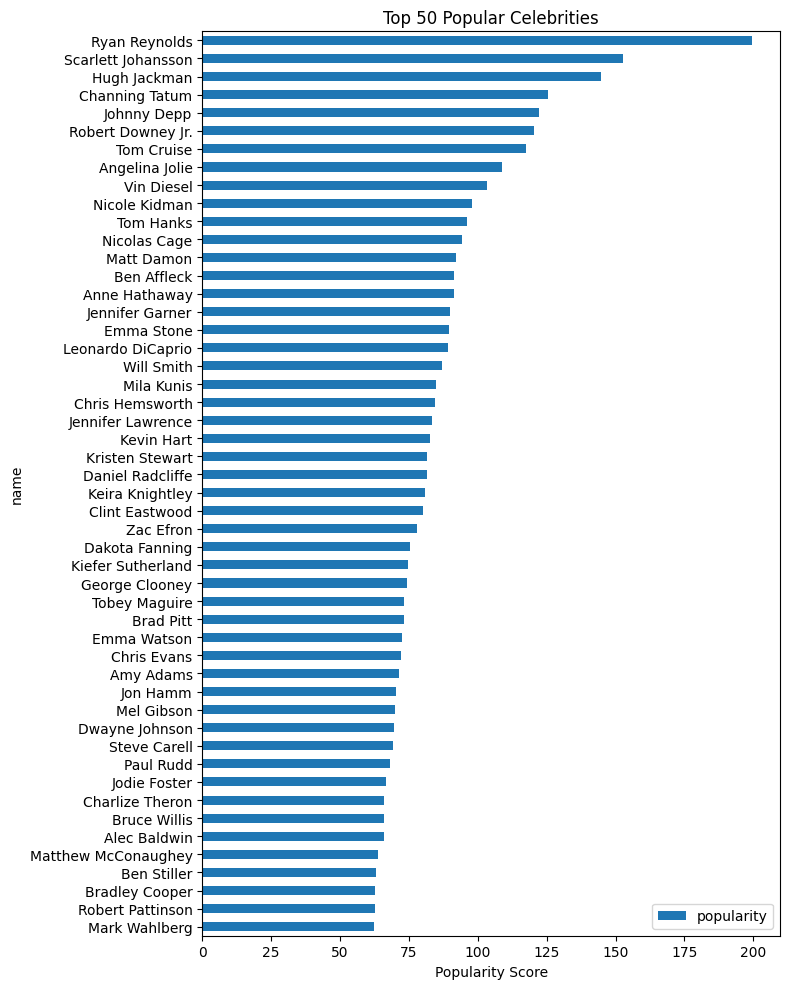

In [ ]:
df1.sort_values(by='popularity', ascending=False).head(50).plot(
    x='name', y='popularity', kind='barh', figsize=(8, 10), title='Top 50 Popular Celebrities'
)
plt.gca().invert_yaxis()
plt.xlabel('Popularity Score')
plt.tight_layout()
plt.show()


In [ ]:
df1['name_clean'] = df1['name'].str.lower().str.strip()
df3['name_clean'] = df3['Name'].str.lower().str.strip()

df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])]
merged_df = df1.merge(
    df3_filtered[['name_clean', 'Pay (USD millions)', 'Year', 'Category']],
    on='name_clean',
    how='inner'
)
merged_df = (
    merged_df.sort_values('Year', ascending=False)
             .drop_duplicates(subset='name', keep='first')
             .sort_values(by='Pay (USD millions)', ascending=False)
             .reset_index(drop=True)
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'Category']])


name  popularity  Pay (USD millions)   Category
0        George Clooney      74.270               239.0     Actors
1            Mel Gibson      70.105               185.0     Actors
2        Dwayne Johnson      69.724                87.5     Actors
3       Chris Hemsworth      84.653                76.4     Actors
4         Ryan Reynolds     199.717                71.5     Actors
5     Robert Downey Jr.     120.346                66.0     Actors
6         Harrison Ford      55.550                65.0     Actors
7         Mark Wahlberg      62.425                58.0     Actors
8        Bradley Cooper      62.768                57.0     Actors
9    Scarlett Johansson     152.879                56.0  Actresses
10          Ben Affleck      91.551                55.0     Actors
11           Matt Damon      92.266                55.0     Actors
12           Vin Diesel     103.428                54.0     Actors
13       Sandra Bullock      61.578                51.0  Actresses
14         Akshay Kumar      36.724                48.5     Actors
15          Johnny Depp     122.255                48.0     Actors
16    Jennifer Lawrence      83.381                46.0  Actresses
17   Lin-Manuel Miranda      23.672                45.5     Actors
18           Will Smith      87.129                44.5     Actors
19          Chris Evans      72.136                43.5     Actors
20           Tom Cruise     117.683                43.0     Actors
21            Paul Rudd      68.149                41.0     Actors
22         Adam Sandler      50.735                41.0     Actors
23         Bruce Willis      65.908                41.0     Actors
24         Nicolas Cage      94.236                40.0     Actors
25       Shah Rukh Khan      47.297                38.0     Actors
26    Denzel Washington      61.837                38.0     Actors
27          Salman Khan      41.430                37.7     Actors
28       Angelina Jolie     108.613                35.5  Actresses
29     Amitabh Bachchan      29.697                33.5     Actors
30     Melissa McCarthy      39.824                33.0  Actresses
31          Ben Stiller      63.039                33.0     Actors
32        Tobey Maguire      73.316                32.0     Actors
33      Keira Knightley      80.972                32.0  Actresses
34            Brad Pitt      73.232                31.5     Actors
35     Jennifer Aniston      50.750                31.0  Actresses
36    Leonardo DiCaprio      89.326                29.0     Actors
37       Channing Tatum     125.579                29.0     Actors
38         Jodie Foster      66.674                27.0  Actresses
39            Tom Hanks      96.047                26.0     Actors
40       Ashton Kutcher      38.540                26.0     Actors
41       Taylor Lautner      35.438                26.0     Actors
42     Daniel Radcliffe      81.500                25.0     Actors
43         Vince Vaughn      48.877                25.0     Actors
44      Kristen Stewart      81.568                22.0  Actresses
45  Matthew McConaughey      63.916                21.0     Actors
46     Robert Pattinson      62.649                20.0     Actors
47      Gwyneth Paltrow      36.382                19.0  Actresses
48         Hugh Jackman     144.698                18.0     Actors
49         Cameron Diaz      62.099                18.0  Actresses
50        Julia Roberts      42.791                16.0  Actresses
51          Halle Berry      56.924                16.0  Actresses
52           Emma Stone      89.486                16.0  Actresses
53      Charlize Theron      66.007                15.0  Actresses
54       Drew Barrymore      47.119                15.0  Actresses
55            Amy Adams      71.241                13.0  Actresses
56       Cate Blanchett      41.866                12.0  Actresses
57          Naomi Watts      55.024                11.5  Actresses
58           Mila Kunis      84.672                11.0  Actresses

In [ ]:
df3.shape

(524, 5)

In [ ]:
merged_df['is_superstar'] = True


In [ ]:
display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'is_superstar']])


name  popularity  Pay (USD millions)  is_superstar
0        George Clooney      74.270               239.0          True
1            Mel Gibson      70.105               185.0          True
2        Dwayne Johnson      69.724                87.5          True
3       Chris Hemsworth      84.653                76.4          True
4         Ryan Reynolds     199.717                71.5          True
5     Robert Downey Jr.     120.346                66.0          True
6         Harrison Ford      55.550                65.0          True
7         Mark Wahlberg      62.425                58.0          True
8        Bradley Cooper      62.768                57.0          True
9    Scarlett Johansson     152.879                56.0          True
10          Ben Affleck      91.551                55.0          True
11           Matt Damon      92.266                55.0          True
12           Vin Diesel     103.428                54.0          True
13       Sandra Bullock      61.578                51.0          True
14         Akshay Kumar      36.724                48.5          True
15          Johnny Depp     122.255                48.0          True
16    Jennifer Lawrence      83.381                46.0          True
17   Lin-Manuel Miranda      23.672                45.5          True
18           Will Smith      87.129                44.5          True
19          Chris Evans      72.136                43.5          True
20           Tom Cruise     117.683                43.0          True
21            Paul Rudd      68.149                41.0          True
22         Adam Sandler      50.735                41.0          True
23         Bruce Willis      65.908                41.0          True
24         Nicolas Cage      94.236                40.0          True
25       Shah Rukh Khan      47.297                38.0          True
26    Denzel Washington      61.837                38.0          True
27          Salman Khan      41.430                37.7          True
28       Angelina Jolie     108.613                35.5          True
29     Amitabh Bachchan      29.697                33.5          True
30     Melissa McCarthy      39.824                33.0          True
31          Ben Stiller      63.039                33.0          True
32        Tobey Maguire      73.316                32.0          True
33      Keira Knightley      80.972                32.0          True
34            Brad Pitt      73.232                31.5          True
35     Jennifer Aniston      50.750                31.0          True
36    Leonardo DiCaprio      89.326                29.0          True
37       Channing Tatum     125.579                29.0          True
38         Jodie Foster      66.674                27.0          True
39            Tom Hanks      96.047                26.0          True
40       Ashton Kutcher      38.540                26.0          True
41       Taylor Lautner      35.438                26.0          True
42     Daniel Radcliffe      81.500                25.0          True
43         Vince Vaughn      48.877                25.0          True
44      Kristen Stewart      81.568                22.0          True
45  Matthew McConaughey      63.916                21.0          True
46     Robert Pattinson      62.649                20.0          True
47      Gwyneth Paltrow      36.382                19.0          True
48         Hugh Jackman     144.698                18.0          True
49         Cameron Diaz      62.099                18.0          True
50        Julia Roberts      42.791                16.0          True
51          Halle Berry      56.924                16.0          True
52           Emma Stone      89.486                16.0          True
53      Charlize Theron      66.007                15.0          True
54       Drew Barrymore      47.119                15.0          True
55            Amy Adams      71.241                13.0          True
56       Cate Blanchett      

In [ ]:
merged_df.shape

(73, 9)

In [ ]:
merged_df.columns

Index(['name', 'original_name', 'popularity', 'known_for_department',
       'name_clean', 'Pay (USD millions)', 'Year', 'Category', 'is_superstar'],
      dtype='object')

In [ ]:
merged_df[['name', 'popularity', 'Pay (USD millions)', 'is_superstar']].to_csv('superstars_actors.csv', index=False)


# فهم البيانات

## بيانات الافلام 1

### توزع القيم الرقمية

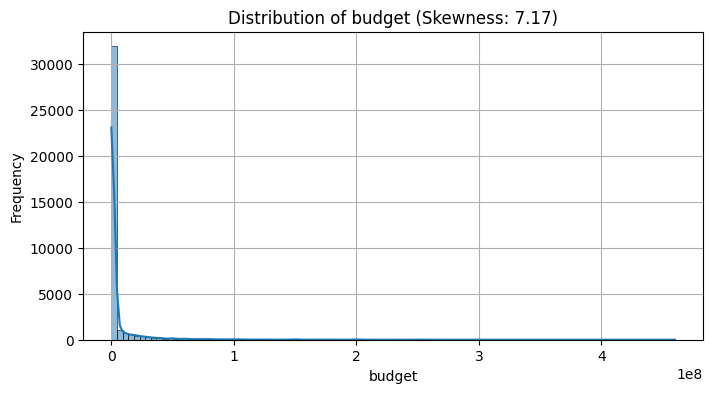

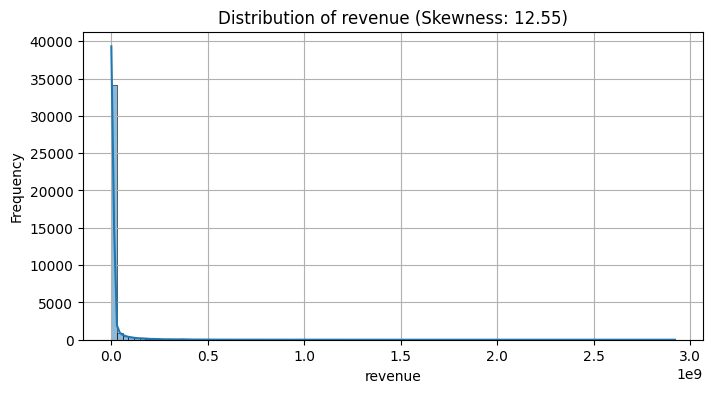

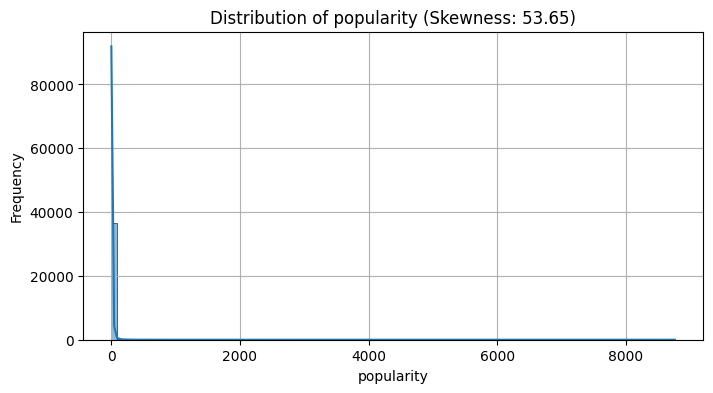

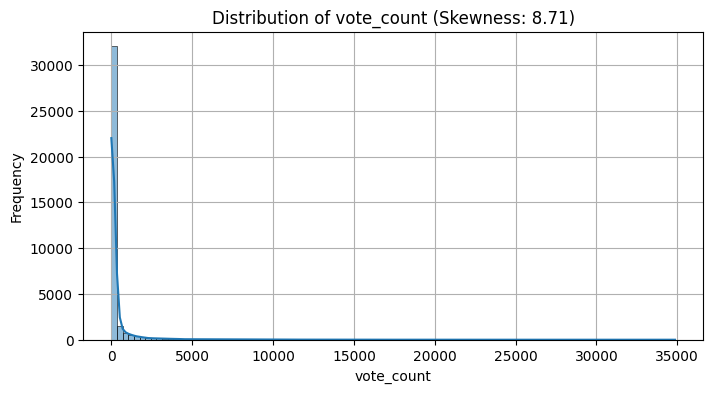

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

num_cols = ['budget', 'revenue', 'popularity', 'vote_count']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(trips_df[col], bins=100, kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skew(trips_df[col].dropna()):.2f})')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


### **العلاقات بين السمات**

### خريطة الحرارة لارتباط السمات

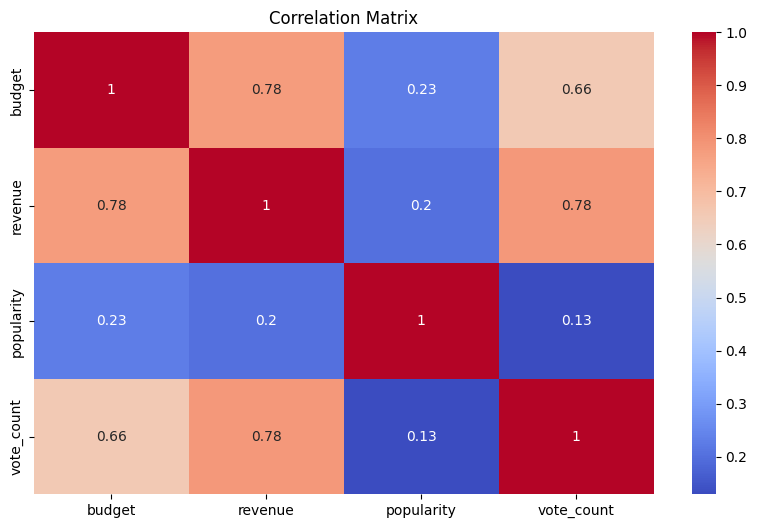

In [ ]:
plt.figure(figsize=(10, 6))
corr = movies_df[['budget', 'revenue', 'popularity', 'vote_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


###  Scatter Plots لعلاقة السمات مع الايرادات

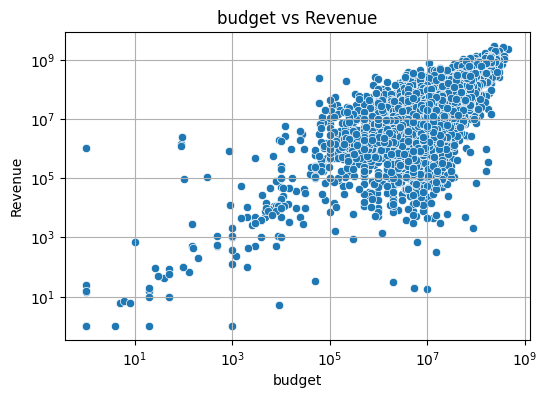

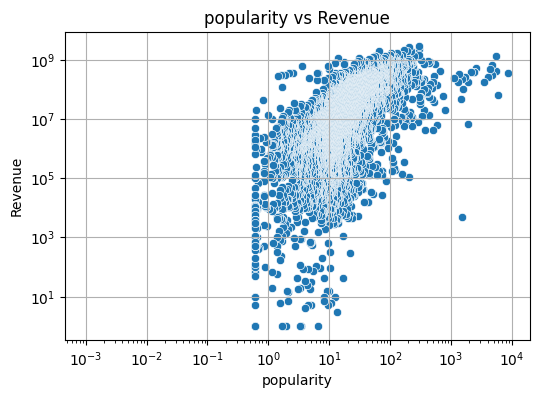

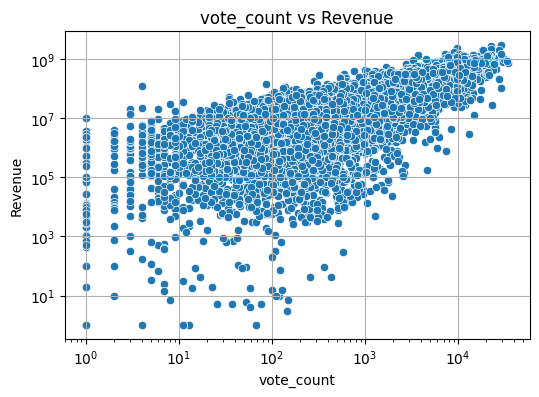

In [ ]:
cols_to_compare = ['budget', 'popularity', 'vote_count']
for col in cols_to_compare:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=trips_df, x=col, y='revenue')
    plt.title(f'{col} vs Revenue')
    plt.xlabel(col)
    plt.ylabel('Revenue')
    plt.yscale('log')
    plt.xscale('log')  # Often useful for better visibility
    plt.grid(True)
    plt.show()


### تحليل الاتجاه العام لإنتاج الأفلام عبر السنوات
<br>

**الاتجاه العام**
<br>
يوجد **اتجاه تصاعدي واضح** على المدى الطويل، خاصة بعد التسعينات.

بداية من عام 2000، نلاحظ قفزات سريعة في عدد الأفلام المنتجة، وهذا مرتبط غالبا بـ:
- تطور التكنولوجيا .
- انتشار محطات ..
- من عام **1900 إلى 1950** كان النمو تدريجي وبطيء، وهو أمر منطقي بسبب بدايات صناعة السينما.
-    بين **1940 - 1980**،  نلاحظ انخفاضاً مرتبطاً بالحرب العالمية.
- مع نهاية التسعينات وبداية الألفية الجديدة، حدثت **طفرة في الإنتاج** السينمائي.
- بعد عام **2020**، نلاحظ انخفاضاً حاداً في عدد الأفلام المنتجة، وغالباً يعود ذلك إلى:
  - تأثير جائحة كورونا على الإنتاج السينمائي.
  - تأجيل أو إلغاء مواعيد إطلاق العديد من الأفلام.
  - و زيادة الاقبال على منصات البث على الانترنت 
  - بيانات السنوات الأخيرة قد تكون غير مكتملة أو لم تُسجل بعد بشكل دقيق.


In [ ]:

year_counts = english_movies['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']
year_counts = year_counts.sort_values('release_year')
fig = px.scatter(year_counts, x='release_year', y='count', trendline='ols',
                 labels={'release_year': 'سنة الإصدار', 'count': 'عدد الأفلام'},
                 title='الاتجاه العام لإنتاج الأفلام عبر السنوات',
                 height=500)
fig.show()


### شرح  لعدد الأفلام حسب الأشهر

- **شهر 1 (يناير)** هو الشهر اللي فيه  عدد أفلام (4611)، وهذا غالبًا بسبب **احتفالات رأس السنة** وزيادة الإنتاج والعروض الجديدة في بداية السنة.

- **شهر 2 (فبراير)** شهد انخفاض كبير  مقارنة بشهر يناير.

- من **شهر 3 إلى شهر 9**، الأعداد تتراوح بين 3000 و 4200 مع تقلبات متوسطة في الإنتاج.

- في **شهر 10 (أكتوبر)**
 عدد الأفلام وصل لذروته الثانية (4825)، وهذا  يفسر بزيادة الأفلام المرتبطة بـ**احتفالات الهالوين**
- في الأشهر الأخيرة (11 و12)  معدل متوسط الى عالي لاقتراب الميلاد وراس سنة .

نتيجة شهر 1 و10 ذروة الافلام .


In [ ]:

monthly_counts = english_movies.groupby('release_month').size().reset_index(name='movie_count')
monthly_counts = monthly_counts.sort_values('release_month').reset_index(drop=True)

fig = px.bar(monthly_counts, x='release_month', y='movie_count',
             labels={'release_month': 'الشهر', 'movie_count': 'عدد الأفلام'},
             title='عدد الأفلام حسب الشهر عبر جميع السنوات',
             height=500)

fig.show()




###  توزيع الإنتاج غير متوازن:
- تركيز كبير على:
  - **الدراما**
  - **الكوميديا**
  - **الأفلام الوثائقية**
  

- باقي الأنواع إنتاجها اقل
  

In [ ]:
print(english_movies['genres'].value_counts().count())

genre_counts = english_movies['genres'].value_counts()
top_genres = genre_counts.head(50)
df_top_genres = top_genres.reset_index()
df_top_genres.columns = ['Genre', 'Count']
fig = px.bar(df_top_genres, x='Genre', y='Count',
             title='Top 50 Most Common Movie Genres',
             labels={'Genre': 'Genre', 'Count': 'Number of Movies'},
             height=500)

fig.update_layout(xaxis_tickangle=-45)

fig.show()


4478


###  التعامل مع الأنواع الفريدة في بيانات الأفلام

في بياناتي، يوجد حوالي **3884 فيلم** بأنواع **فريدة** تظهر مرة واحدة فقط من أصل **45,000 فيلم**. هذه الأنواع قد تؤثر على أداء نموذج .

لذلك، سأقوم بتجربة طريقتين:

1. **حذف الأنواع الفريدة**  
   - لتقليل التشويش والضوضاء في البيانات.  
   - تبسيط تصنيفات الأنواع مما قد يحسن من أداء النموذج.

2. **الاحتفاظ بالأنواع**  
   - للحفاظ على التنوع الكامل في البيانات.  
   - لمساعدة النموذج على التعامل مع الأنواع النادرة أو غير الشائعة.

سأقوم بمقارنة أداء النموذج في الحالتين لاختيار الأفضل.


In [ ]:
genre_counts = english_movies['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 3].index
# سوف احتفظ بافلام التي نوعها فريد لدراستها لاحقاً
english_moviesn = english_movies[english_movies['genres'].isin(rare_genres)]

# english_movies2 : البيانات من دون  تشويش بالانواع
# حتى اجرب التدريب علها
english_movies2 = english_movies[~english_movies['genres'].isin(rare_genres)]

len(english_movies2)

41399

### دراسة الانواع التي تحتوي على اكثر من 300 فيلم :
### 1. أعلى الأنواع ربحاً صافياً:
| النوع                | الميزانية  | الربح الصافي  | ملاحظات                                                      |
| -------------------- | ------------ | --------------- | ------------------------------------------------------------------- |
| Action-Thriller      | 9.57 مليون   | 11.52 مليون     | رغم التكلفة العالية، النوع يحقق أرباح ضخمة، مناسب للاستثمار الكبير. |
| Comedy-Romance       | 5.37 مليون   | 11.70 مليون     | ربح ممتاز مقارنة بالتكلفة، النوع مربح للغاية   .       |
| Comedy-Drama-Romance | 5.29 مليون   | 11.59 مليون     | يثبت قوة الدمج بين الكوميديا والدراما والرومانسية في جذب الجماهير.  |
| Action-Drama         | 2.50 مليون   | 7.14 مليون      | استثمار متوسط بأرباح عالية، النوع يجمع الحماس مع الدراما بفعالية.   |
| Romance-Comedy       | 2.70 مليون   | 8.16 مليون      | نوع جماهيري مربح، دمج الرومانسية والكوميديا يجذب شريحة واسعة.       |

### 2. أنواع تحقق أرباح معتدلة وجيدة:
| النوع                  | الميزانية  | الربح الصافي  | ملاحظات                                                 |
| ---------------------- | ------------ | --------------- | -------------------------------------------------------------- |
| Drama-Romance          | 3.39 مليون   | 7.02 مليون      | أرباح مستقرة مع تكلفة متوسطة، النوع رومانسي درامي ناجح ماليًا. |
| Crime-Drama-Thriller   | 5.07 مليون   | 6.68 مليون      | مزيج الجريمة والإثارة يثبت فعاليته بتحقيق أرباح قوية.          |
| Comedy                 | 2.33 مليون   | 4.13 مليون      | الكوميديا تظل خيارًا مربحًا بأرباح متوسطة.                     |
| Drama-Crime            | 2.31 مليون   | 4.79 مليون      | دمج الدراما والجريمة يحقق نتائج مالية جيدة.                    |
| Horror-Thriller        | 1.89 مليون   | 5.17 مليون      | الرعب مع الإثارة يحقق أرباح عالية بتكاليف معقولة.              |
| Drama-Comedy           | 2.47 مليون   | 3.40 مليون      | أرباح جيدة، خليط بين الجدية والطرافة.                          |
| Horror-Science Fiction | 1.02 مليون   | 1.42 مليون      | أرباح معقولة، يجذب جمهور الخيال والرعب.                        |
| Thriller-Horror        | 902 ألف      | 2.18 مليون      | دمج الرعب مع التشويق ناجح ماليًا، مناسب للميزانيات الصغيرة.    |
| Drama-Thriller         | 2.93 مليون   | 1.93 مليون      | أرباح معقولة، لكنه أقل جذبًا من أنواع الإثارة الأخرى.          |
| Horror                 | 558 ألف      | 1.26 مليون      | نوع مربح جدًا مقارنة بالتكلفة المنخفضة.                        |
| Documentary-Music      | 153 ألف      | 339 ألف         | أرباح محدودة لكن إيجابية مقابل تكلفة منخفضة.                   |
| Documentary            | 71 ألف       | 260 ألف         | أرباح جيدة جدًا بميزانية شبه معدومة، النوع منخفض المخاطر.      |
| Thriller               | 1.04 مليون   | 597 ألف         | أرباح متوسطة، مناسب للمشاريع ذات المخاطرة المحدودة.            |
| Crime-Drama            | 1.46 مليون   | 816 ألف         | أرباح معقولة ضمن إطار الجريمة والدراما التقليدي.               |
| Comedy-Horror          | 795 ألف      | 1.04 مليون      | نوع منخفض التكلفة، يحقق أرباح بسيطة لكنها إيجابية.             |
| Western                | 202 ألف      | 150 ألف         | أرباح محدودة جدًا، سوق هذا النوع صغير وضعيف حاليًا.            |

### 3. أنواع كانت خاسرة أو ذات أداء ضعيف:
| النوع           | الميزانية  | الربح الصافي  | ملاحظات تحليلية                                                 |
| --------------- | ------------ | --------------- | --------------------------------------------------------------- |
| Action          | 1.62 مليون   | -145 ألف        | خسارة، رغم قوة نوع الأكشن، مشاريع هذا القسم لم تكن ناجحة.       |
| Music           | 67 ألف       | -19 ألف         | سوق الموسيقى ضعيف ماليًا، حتى مع ميزانية ضئيلة كانت هناك خسارة. |
| Science Fiction | 1.39 مليون   | -31 ألف         | خسارة طفيفة، ضعف نوع الخيال العلمي رغم شهرته   .     |


### استنتاج شامل:
 أفضل الأنواع ربحًا هي تلك التي تجمع بين الأكشن والإثارة، الكوميديا مع الرومانسية، أو الدراما مع عناصر أخرى مثل الإثارة أو الجريمة.
الأنواع المنخفضة الميزانية مثل الرعب والوثائقي تحقق أرباحًا جيدة جدًا مقابل تكلفتها.
 الأنواع الخاسرة تركزت في الأكشن  والموسيقى، والخيال العلمي، ما يدل على ضرورة التدقيق في اختيار المشاريع ضمن هذه الفئات.
 هناك علاقة واضحة بين الاستثمار الذكي في ميزانيات متوسطة وتحقيق أرباح كبيرة خاصة في:

Comedy-Romance وComedy-Drama-Romanceو Romance-Comedy و Action-Drama

 بينما الاستثمار المرتفع جدًا قد يحقق أرباح ضخمة مثل:

Action-Thriller


In [ ]:

selected_genres = [
    'Drama','Comedy','Documentary','Horror','Western','Drama-Romance','Comedy-Romance','Comedy-Drama','Horror-Thriller','Music','Thriller','Action','Crime-Drama','Drama-Thriller','Comedy-Drama-Romance',
    'Drama-Comedy','Comedy-Horror',  'Action-Thriller',  'Documentary-Music',  'Crime-Drama-Thriller',  'Horror-Comedy',  'Drama-Crime',  'Horror-Science Fiction',  'Thriller-Horror',  'Romance-Drama','Science Fiction',
    'Action-Drama', 'Romance-Comedy'
]
genre_means = english_movies[english_movies['genres'].isin(selected_genres)].groupby('genres').mean(numeric_only=True)
print(len(genre_means))
print(genre_means[['budget', 'revenue', 'profit']].head(28))

28
                              budget       revenue        profit
genres                                                          
Action                  1.696167e+06  1.544733e+06 -1.514341e+05
Action-Drama            2.550489e+06  9.821214e+06  7.270725e+06
Action-Thriller         9.818105e+06  2.163540e+07  1.181729e+07
Comedy                  2.559974e+06  7.089619e+06  4.529645e+06
Comedy-Drama            3.407717e+06  7.629079e+06  4.221362e+06
Comedy-Drama-Romance    5.357857e+06  1.710350e+07  1.174564e+07
Comedy-Horror           8.989515e+05  2.082804e+06  1.183852e+06
Comedy-Romance          5.447854e+06  1.732363e+07  1.187578e+07
Crime-Drama             1.497135e+06  2.331191e+06  8.340564e+05
Crime-Drama-Thriller    5.124653e+06  1.195486e+07  6.830205e+06
Documentary             7.517907e+04  3.481368e+05  2.729578e+05
Documentary-Music       1.578213e+05  5.066785e+05  3.488572e+05
Drama                   1.538603e+06  3.773704e+06  2.235101e+06
Drama-Comedy          


### دراسة مالية:

In [ ]:
print( (english_movies['budget'] >= 0).all())
print( (english_movies['revenue'] >= 0).all())


True
True


### مقارنة ارتباط الأرباح (profit) مع باقي العوامل:

| العامل                          | كل الأفلام       | الأفلام الخاسرة فقط    | التفسير العام                                              |
|---------------------------------|------------------|-------------------------|-------------------------------------------------------------|
| **revenue** (الإيرادات)         | 0.978 ارتباط قوي جدًا | -0.258 ارتباط سلبي متوسط | الإيرادات عامل أساسي للربح، لكن في حالة الخسارة الإيرادات منخفضة. |
| **vote_count** (عدد التقييمات)  | 0.753 ارتباط قوي     | -0.359 ارتباط سلبي متوسط | التفاعل الجماهيري مؤشر للربح عادةً، لكن بعض الأفلام رغم التقييمات تخسر. |
| **budget** (الميزانية)          | 0.624 ارتباط متوسط قوي | -0.825 ارتباط سلبي قوي جدًا | الميزانية المرتفعة قد تعني نجاح أو خسارة حسب تحقيق الإيرادات. |
| **unique_actors_count** (عدد الممثلين) | 0.303 ارتباط ضعيف إلى متوسط | -0.320 ارتباط سلبي متوسط | عدد الممثلين يؤثر إيجابيًا غالبًا، لكن في الأفلام الخاسرة يزيد التكاليف فقط. |
| **popularity** (الشعبية)        | 0.184 ارتباط ضعيف    | -0.288 ارتباط سلبي متوسط | الشهرة الرقمية تساهم جزئيًا في الربح، لكنها ليست ضمان للنجاح المالي. |
| **runtime** (مدة الفيلم)        | 0.150 ارتباط ضعيف    | -0.279 ارتباط سلبي متوسط | مدة الفيلم لها تأثير محدود، أحيانًا الطول الزائد يضر بالنتائج المالية. |
| **vote_average** (متوسط التقييم) | 0.117 ارتباط ضعيف جدًا | -0.166 ارتباط سلبي ضعيف | جودة الفيلم حسب التقييم ليست مؤشر واضح على الربح، بعض الأفلام الجيدة تخسر. |


In [ ]:

correlations = english_movies.corr(numeric_only=True)['profit'].sort_values(ascending=False)
print(correlations)


profit                 1.000000
revenue                0.978617
vote_count             0.752836
budget                 0.623587
unique_actors_count    0.303205
popularity             0.183673
runtime                0.150210
vote_average           0.116620
release_year           0.076760
release_day            0.023305
release_month          0.022178
id                    -0.081128
Name: profit, dtype: float64


In [ ]:
negative_profit_movies = english_movies[english_movies['profit'] < 0]
print(f"عدد الأفلام التي حققت خسائر: {len(negative_profit_movies)}")


عدد الأفلام التي حققت خسائر: 6498


In [ ]:

correlations = negative_profit_movies.corr(numeric_only=True)['profit'].sort_values(ascending=False)
print(correlations)



profit                 1.000000
id                     0.099576
release_day           -0.027705
release_month         -0.054880
release_year          -0.072213
vote_average          -0.165186
revenue               -0.257839
runtime               -0.278495
popularity            -0.288448
unique_actors_count   -0.320091
vote_count            -0.358913
budget                -0.825007
Name: profit, dtype: float64


وهاد شي منطقي لانو دراما اكبر عدد افلام و لا تقتصر الخسارة على نوع محدد.


In [ ]:
unique_genres = negative_profit_movies['genres'].unique()
print(f"عدد أنواع الأفلام الفريدة في افلام الخاسرة: {len(unique_genres)}")
most_common_losing_genre = negative_profit_movies['genres'].value_counts().idxmax()
count = negative_profit_movies['genres'].value_counts().max()
print(f"أكثر نوع فيلم خسر هو: {most_common_losing_genre} وعدده: {count}")



عدد أنواع الأفلام الفريدة في افلام الخاسرة: 1478
أكثر نوع فيلم خسر هو: Drama وعدده: 453


#### دراسة افلام التي حققت اكبر ربح
<br>

**ملاحظات:**

<br>

- **الميزانيات مرتفعة جداً:** أغلب الأفلام تكلفت ما بين 150 إلى 460 مليون دولار، وهو مؤشر على ضخامة الإنتاج.

- **الأرباح صافية ضخمة:** كل الأفلام حققت أرباحًا بأكثر من مليار دولار، مما يؤكد جدوى الاستثمار الكبير.

- **الأنواع السائدة:**
  - الأكشن والمغامرة والخيال العلمي متكررة جداً في أغلب هذه الأفلام، خصوصًا الأفلام ذات الإنتاج الضخم

  (Avatar، Avengers، Star Wars، Jurassic World).
  - الدراما والرومانسية تظهر بشكل رئيسي   
  - الأفلام العائلية والدراما  لها مكانة بين الأفلام ذات الأرباح الكبيرة رغم اختلاف النوع.

#### نتيجة:

أفلام الأكشن، المغامرة، والخيال العلمي هي الأغلب في قائمة الأعلى ربحًا، ويبدو أن ضخ الميزانية الكبيرة في هذه الأنواع غالبًا ما يعود بأرباح هائلة. لكن الأفلام الدرامية الرومانسية الكبيرة مثل  تاتنيك تثبت أن الأنواع الأخرى يمكنها أيضاً تحقيق نجاح ضخم إذا كانت إنتاجها قوي .


In [ ]:

top_profit_movies = english_movies.sort_values(by='profit', ascending=False)

top_10 = top_profit_movies.head(10)

print("أعلى 10 أفلام ربحاً صافيًا:")
print(top_10[['title', 'budget', 'revenue', 'profit', 'genres']])


أعلى 10 أفلام ربحاً صافيًا:
                             title       budget       revenue        profit  \
150                         Avatar  237000000.0  2.920357e+09  2.683357e+09   
248              Avengers: Endgame  356000000.0  2.799439e+09  2.443439e+09   
315                        Titanic  200000000.0  2.187464e+09  1.987464e+09   
146       Avatar: The Way of Water  460000000.0  2.320250e+09  1.860250e+09   
1076  Star Wars: The Force Awakens  245000000.0  2.068224e+09  1.823224e+09   
269         Avengers: Infinity War  300000000.0  2.052415e+09  1.752415e+09   
227        Spider-Man: No Way Home  200000000.0  1.921847e+09  1.721847e+09   
581                 Jurassic World  150000000.0  1.671537e+09  1.521537e+09   
424                  The Lion King  260000000.0  1.663075e+09  1.403075e+09   
612                      Furious 7  190000000.0  1.515400e+09  1.325400e+09   

                                         genres  
150    Action-Adventure-Fantasy-Science Fiction  
24

In [ ]:

all_companies = '-'.join(english_movies['production_companies'].dropna().astype(str)).split('-')
unique_actors = set(all_companies)
print(f"عدد شركات انتاج الفريدين في كامل البيانات: {len(unique_actors)}")


عدد شركات انتاج الفريدين في كامل البيانات: 31282


### الشركات الأكثر إنتاجًا (عدد الأفلام):
أكبر الشركات من حيث عدد الأفلام هي:

Columbia Pictures بـ 1650 فيلم

Warner Bros. Pictures بـ 1546 فيلم

Paramount بـ 1508 فيلم

Universal Pictures بـ 1485 فيلم

يليهم باقي الشركات مثل Metro، Goldwyn، Mayer...

الملاحظ أن الشركات الكلاسيكية الكبيرة مسيطرة على الإنتاج، خاصة من الشركات الهوليوودية التقليدية.

### الشركات الأكثر تنوعًا من حيث أنواع الأفلام:
أكثر الشركات تنوعًا بأنواع الأفلام هي:

Warner Bros. Pictures بـ 522 نوع مختلف

Universal Pictures بـ 513 نوع

Columbia Pictures بـ 479 نوع

Paramount بـ 453 نوع

20th Century Fox بـ 443 نوع

 الشركات الكبيرة بالإنتاج أيضًا تظهر ضمن الشركات الأكثر تنوعًا، .

 ### خلاصة العلاقة بين الحجم والتنوع:
واضح أن الشركات ذات الإنتاج الضخم مو بس بتنتج أفلام كثيرة، كمان عندها تنوع كبير بأنواع الأفلام.

بالمقابل، في شركات عندها إنتاج محدود لكن متنوعة نسبيًا (موجودة خارج توب 10 إنتاج لكن في توب التنوع).

لكن مافي علاقة مباشرة وحتمية بين التنوع وحجم الإنتاج، بمعنى:

بعض الشركات بتركّز على نوع محدد (مثلاً ديزني تميل للأفلام العائلية والأنيميشن).

بعض الشركات كل ما تحدد نوعها واستهدفت جمهور واضح، وكان عندها إنتاج مركز وكبير بنفس نوع بتعزز  فرص ربحهاوسيرتها على السوق المتخصص.

### استنتاج عام:
الشركات الكبرى بتحاول توازن بين "الإنتاج الضخم" و"تنوع الأنواع" لاستهداف جماهير مختلفة وزيادة الأرباح.

بالمقابل، الشركات المتخصصة بنوع محدد قد تفضل التركيز بدل التشتت، وهذا ممكن يساعدها على بناء هوية قوية بسوق معيّن.

In [ ]:

company_counts = pd.Series(all_companies).value_counts()

top_20_companies = company_counts.head(20).reset_index()
top_20_companies.columns = ['Company', 'Movie Count']

fig = px.bar(top_20_companies, x='Company', y='Movie Count',
             title='أكبر 20 شركة إنتاج من حيث عدد الأفلام',
             text='Movie Count', color='Movie Count', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='شركة الإنتاج', yaxis_title='عدد الأفلام', xaxis_tickangle=-45)
fig.show()


In [ ]:

company_genre_set = defaultdict(set)

for _, row in english_movies.dropna(subset=['production_companies', 'genres']).iterrows():
    companies = str(row['production_companies']).split('-')
    genres = str(row['genres'])
    for company in companies:
        company_genre_set[company].add(genres)

company_genre_counts = {company: len(genres) for company, genres in company_genre_set.items()}
company_genre_counts = pd.Series(company_genre_counts).sort_values(ascending=False).head(20).reset_index()
company_genre_counts.columns = ['Company', 'Unique Genre Count']

fig = px.bar(company_genre_counts, x='Company', y='Unique Genre Count',
             title='أكثر 20 شركة إنتاج تنوعًا في أنواع الأفلام',
             text='Unique Genre Count', color='Unique Genre Count', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='شركة الإنتاج', yaxis_title='عدد الأنواع المختلفة', xaxis_tickangle=-45)
fig.show()



### تحليل الممثلين:

In [ ]:

all_actors = '-'.join(english_movies['credits'].dropna().astype(str)).split('-')
unique_actors = set(all_actors)
print(f"عدد الممثلين الفريدين في كامل البيانات: {len(unique_actors)}")


عدد الممثلين الفريدين في كامل البيانات: 305395


### أكثر الممثلين من حيث عدد الأفلام:
من جدول top_20_act، نلاحظ:

Bess Flowers هي الأكثر ظهورًا بـ 475 فيلم، وهي مشهورة بلقب "ملكة الكومبارس"، لأنها ظهرت في مئات الأفلام غالبًا بأدوار صغيرة أو ثانوية.

يجي بعدها Jean بـ 407 فيلم، وByron Foulger بـ 259 فيلم، وهكذا.

إذا منلاحظ، معظم الأسماء يلي عندها عدد أفلام كبير هم ممثلين كانوا يظهروا كثيرًا بأدوار صغيرة أو في خلفية المشهد، خصوصًا في الحقبة الكلاسيكية من هوليوود.

### أكثر الممثلين من حيث تنوع الأنواع السينمائية (تعدد أنواع الأفلام):
من جدول actor_genre_counts، نلاحظ:

Jean هو الأكثر تنوعًا بـ 191 نوع/تصنيف مختلف، يلي بيدل إنو شارك بمجموعة كبيرة من الأنواع السينمائية (أكشن، دراما، كوميدي، رعب...).

بعدها Frank Welker بـ 147 نوع، وهو معروف بالأداء الصوتي، خصوصًا بأفلام الأنيميشن، يلي تساهم بتنوع تصنيفات الأفلام يلي بيشارك فيها.

Bess Flowers عندها أيضًا تنوع بـ 145 نوع،  منطقي كونها ظهرت في عدد كبير  الأفلام .

### هل في علاقة بين عدد الأفلام والتنوع؟


 في بعض الحالات، الممثل يلي عنده عدد كبير من الأفلام بيكون عنده تنوع عالي أيضًا، مثل:

Jean ثاني أكتر ممثل أفلام وأكتر ممثل تنوعًا.

Bess Flowers أكتر وحدة أفلام وثالث وحدة من حيث التنوع.

 لكن مو شرط دائمًا:

في ممثلين عندهم أفلام كثيرة بس تنوعهم أقل نسبيًا، مثل:

Irving Bacon عنده 224 فيلم بس مش ضمن قائمة أكتر تنوعًا.

Lee Phelps 182 فيلم وما ظهر بقائمة التنوع.

 بالمقابل، في ممثلين عندهم تنوع كبير بس مش من أكثر الناس إنتاجًا:

مثل Danny Trejo عنده 102 نوع بس مش من أعلى الناس بعدد الأفلام ضمن الـ Top 20.


In [ ]:

act_counts = pd.Series(all_actors).value_counts()


top_20_act = act_counts.head(20).reset_index()
top_20_act.columns = ['actor', 'Movie Count']

fig = px.bar(top_20_act, x='actor', y='Movie Count',
             title='أكثر 20 ممثل ظهورًا في الأفلام',
             text='Movie Count', color='Movie Count', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='اسم الممثل', yaxis_title='عدد مرات الظهور', xaxis_tickangle=-45)
fig.show()


In [ ]:

actor_genre_set = defaultdict(set)


for _, row in english_movies.dropna(subset=['credits', 'genres']).iterrows():
    actors = str(row['credits']).split('-')
    genres = str(row['genres'])
    for actor in actors:
        actor_genre_set[actor].add(genres)


actor_genre_counts = {actor: len(genres) for actor, genres in actor_genre_set.items()}

actor_genre_counts = pd.Series(actor_genre_counts).sort_values(ascending=False).head(20).reset_index()
actor_genre_counts.columns = ['Actor', 'Unique Genre Count']

fig = px.bar(actor_genre_counts, x='Actor', y='Unique Genre Count',
             title='أكثر 20 ممثل تنوعًا في أنواع الأفلام',
             text='Unique Genre Count', color='Unique Genre Count', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='الممثل', yaxis_title='عدد الأنواع المختلفة', xaxis_tickangle=-45)
fig.show()


###  أفلام الأكشن :
أزواج مثل:

John Cena & Paul Wight (28 مرة "Action-Drama")

Glenn Jacobs & Paul Michael Lévesque (34 مرة "Action-Drama")

Chris Irvine & Glenn Jacobs (31 مرة "Action-Drama")

Booker Huffman & Steve Borden (35 مرة "Action")

Ric Flair & Steve Borden (49 مرة "Action")

 تدل على وجود تركيز ضخم على أفلام الأكشن المرتبطة بالمصارعين والرياضيين المعروفين، وغالبًا أفلامهم تدور في نفس القالب من حيث النوع والمحتوى.

### الثنائيات  في الكوميديا:
أزواج مثل:

Larry Fine & Moe Howard (58 مرة "Comedy")

Bud Abbott & Lou Costello (12 مرة "Comedy")

Oliver Hardy & Stan Laurel (17 مرة "Comedy")

 هذه الثنائيات جزء من تاريخ الكوميديا  وتكرار ظهورهم يعكس شعبيتهم وتأثيرهم الفني  .

###   لأفلام الأنيميشن والعائلة:
أزواج مثل:

Mike Nawrocki & Phil Vischer (12 مرة "Animation-Family")

Frank Welker & Jeff Bennett (5 مرات "Animation-Family")

Mickie McGowan & Sherry Lynn (4 مرات "Animation-Comedy-Family")

 يعكس هذا التكرار أهمية هذه الأصوات في صناعة الرسوم المتحركة الموجهة للعائلة والأطفال.

### تكرار واضح في الدراما الرومانسية:
أزواج مثل:

Jack Mower & Stuart Holmes (4 مرات "Drama-Romance")

Frank Mayo & Jack Mower (6 مرات "Drama-Romance")

Bess Flowers & Harold Miller (5 مرات "Drama-Romance")

Griffiths & Roger Ashton (6 مرات "Drama-Romance")

 مما يدل على وجود عدد كبير من الممثلين المشاركين في إنتاجات الدراما الرومانسية، .

### الغرب الأمريكي (Western) يظهر بشكل متكرر:
أمثلة:

Chris & Pin Martin (19 مرة "Western")

Roy Rogers & Trigger (15 مرة "Western")

Kenne Duncan & Tom London (22 مرة "Western")

 ما يدل على أهمية أفلام الغرب الأمريكي الكلاسيكية وانتشار الثنائيات الشهيرة فيها.



In [ ]:

actors_per_movie = english_movies['credits'].dropna().apply(lambda x: sorted(set(str(x).split('-'))))

all_pairs = []
for actors in actors_per_movie:
    pairs = combinations(actors, 2)
    all_pairs.extend(pairs)

pair_counts = Counter(all_pairs)

popular_pairs = [(pair, count) for pair, count in pair_counts.items() if count > 30]

popular_pairs = sorted(popular_pairs, key=lambda x: x[1], reverse=True)

print("أزواج الممثلين اللي تكرروا بأكثر من 30 فيلم:")
for pair, count in popular_pairs:
    print(f"{pair}: {count} فيلم")


أزواج الممثلين اللي تكرروا بأكثر من 30 فيلم:
('Larry Fine', 'Moe Howard'): 77 فيلم
('Bess Flowers', 'Harold Miller'): 71 فيلم
('Davies', 'John Rhys'): 63 فيلم
('Harold Miller', 'Sam Harris'): 55 فيلم
('Bess Flowers', 'Sam Harris'): 52 فيلم
('Chris', 'Pin Martin'): 52 فيلم
('Ric Flair', 'Steve Borden'): 52 فيلم
('Curly Howard', 'Moe Howard'): 52 فيلم
('Curly Howard', 'Larry Fine'): 51 فيلم
('Claude Van Damme', 'Jean'): 50 فيلم
('White', 'Wilfrid Hyde'): 50 فيلم
('Frank Mayo', 'Jack Mower'): 50 فيلم
('Paul Ben', 'Victor'): 48 فيلم
('Chris Irvine', 'Paul Wight'): 48 فيلم
('Cary', 'Hiroyuki Tagawa'): 46 فيلم
('Joseph Gordon', 'Levitt'): 45 فيلم
('Keegan', 'Michael Key'): 44 فيلم
('Bert Moorhouse', 'Bess Flowers'): 44 فيلم
('Huntz Hall', 'Leo Gorcey'): 44 فيلم
('Kevin Nash', 'Scott Hall'): 44 فيلم
('Ann', 'Margret'): 43 فيلم
('Ice', 'T'): 42 فيلم
('Bess Flowers', 'Franklyn Farnum'): 42 فيلم
('Cliff Saum', 'Jack Mower'): 42 فيلم
('Rob Rechsteiner', 'Scott Rechsteiner'): 42 فيلم
('Larry Pfohl

In [ ]:

pair_genres = defaultdict(list)

for idx, row in english_movies.iterrows():
    if pd.isna(row['credits']) or pd.isna(row['genres']):
        continue

    actors = sorted(set(str(row['credits']).split('-')))


    if isinstance(row['genres'], list):
        genres = row['genres']
    else:
        genres = [g.strip() for g in str(row['genres']).split(',')]


    for pair in combinations(actors, 2):
        if pair in dict(popular_pairs):
            pair_genres[pair].extend(genres)


for pair, genres_list in pair_genres.items():
    genre_counts = Counter(genres_list)
    top_genres = genre_counts.most_common(3)

    print(f"\n الزوج: {pair[0]} و {pair[1]}")
    print(" أكثر الأنواع اللي شاركوا فيها:")
    for genre, count in top_genres:
        print(f" - {genre}: {count} مرة")



 الزوج: Davies و John Rhys
 أكثر الأنواع اللي شاركوا فيها:
 - Adventure-Action: 4 مرة
 - Adventure-Fantasy-Action: 3 مرة
 - Documentary: 3 مرة

 الزوج: Keegan و Michael Key
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy: 7 مرة
 - Comedy-Drama: 5 مرة
 - Animation-Comedy-Family-Fantasy: 2 مرة

 الزوج: Joseph Gordon و Levitt
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy-Drama: 3 مرة
 - Comedy-Crime-Mystery: 2 مرة
 - Action-Crime-Drama-Thriller: 2 مرة

 الزوج: Frank Welker و Jim Cummings
 أكثر الأنواع اللي شاركوا فيها:
 - Animation-Family: 3 مرة
 - Family-Adventure-Animation-Romance: 2 مرة
 - Animation-Family-Fantasy: 2 مرة

 الزوج: Paul Ben و Victor
 أكثر الأنواع اللي شاركوا فيها:
 - Drama: 4 مرة
 - Action: 3 مرة
 - Comedy: 3 مرة

 الزوج: Bert Stevens و Bess Flowers
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy-Drama-Romance: 5 مرة
 - Comedy-Romance: 5 مرة
 - Drama: 3 مرة

 الزوج: Mickie McGowan و Sherry Lynn
 أكثر الأنواع اللي شاركوا فيها:
 - Animation-Comedy-Family: 4 مرة
 - Animation-Family: 3 مرة

### تحليل افلام التي تملك اكثر من جزء

In [ ]:

df = english_movies.copy()
df_sorted = df.sort_values(by=['title', 'release_year'])
parts = df_sorted.groupby('title').agg({
    'release_year': lambda years: list(years.unique()),
    'id': 'count'
}).reset_index()

parts_with_multiple_years = parts[parts['id'] > 1]
print(parts_with_multiple_years[['title', 'release_year']])



                              title  release_year
240    20,000 Leagues Under the Sea  [1954, 1997]
274                         21 Days  [1940, 2014]
314                            2:22  [2008, 2017]
374                        36 Hours  [1953, 1964]
385                    3:10 to Yuma  [1957, 2007]
...                             ...           ...
42001             Young as You Feel  [1931, 1940]
42003                    Youngblood  [1978, 1986]
42099                        Zodiac  [2007, 2014]
42126              Zombie Nightmare  [1987, 1993]
42153                           Zoo  [2018, 2019]

[2365 rows x 2 columns]


### نتيجة:

"من خلال تحليل بيانات الأفلام التي تحتوي على عدة أجزاء، نلاحظ أن مجموع الأرباح الصافية للأجزاء التي تلي الجزء الأول (الأجزاء الثانية وما بعدها) يفوق مجموع أرباح الأجزاء الأولى. هذا يشير إلى أن الأجزاء التالية للسلاسل غالبًا ما تحقق أداءً ماليًا أفضل، ربما بسبب نجاح الجزء الأول الذي يشجع الجمهور على مشاهدة الأجزاء اللاحقة، أو بسبب تحسن في الإنتاج أو تسويق السلسلة."

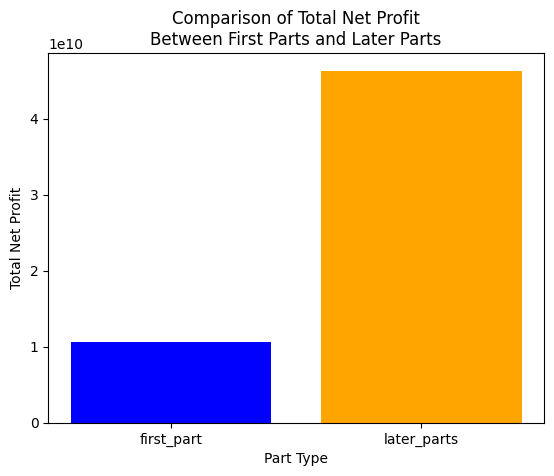

In [ ]:

first_release = df_sorted.groupby('title')['release_year'].min().reset_index()
first_release = first_release.rename(columns={'release_year': 'first_year'})

df_merged = pd.merge(df_sorted, first_release, on='title')

df_merged['part_type'] = df_merged.apply(lambda row: 'first_part' if row['release_year'] == row['first_year'] else 'later_parts', axis=1)


multi_parts_titles = parts_with_multiple_years['title'].tolist()
df_multi = df_merged[df_merged['title'].isin(multi_parts_titles)]

profit_summary = df_multi.groupby('part_type')['profit'].sum().reset_index()

plt.bar(profit_summary['part_type'], profit_summary['profit'], color=['blue', 'orange'])
plt.title('Comparison of Total Net Profit\nBetween First Parts and Later Parts')
plt.xlabel('Part Type')
plt.ylabel('Total Net Profit')
plt.show()


## بيانات الافلام 2

### توزع التقييمات

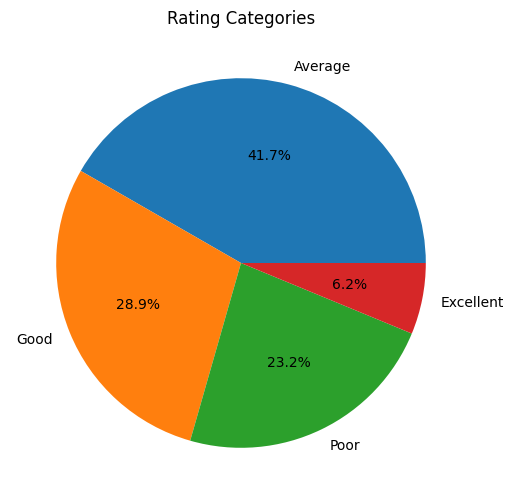

In [ ]:
dfb['rating_category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Rating Categories')
plt.ylabel('')
plt.show()


أظهر تحليل توزيع تقييمات الأفلام أن غالبية الأفلام تقع ضمن فئة "متوسط"، تليها فئة "جيد". بينما تشكل الأفلام "الممتازة" نسبة صغيرة ,و "الضعيفة" نسبة لا يستهان بها يشير هذا التوزيع إلى أن معظم الأفلام تحقق تقييمات مقبولة إلى جيدة، مع وجود أقلية  قليلة جداً من الأفلام عالية التميز 

### متوسط التقييم بناءً على زمن الفلم

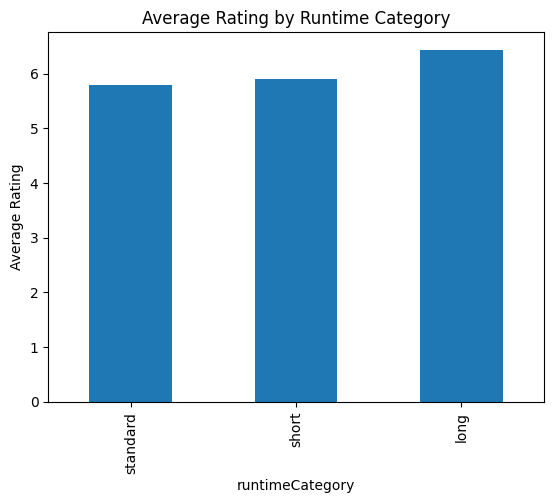

In [ ]:
dfb.groupby('runtimeCategory')['averageRating'].mean().sort_values().plot.bar(
    title='Average Rating by Runtime Category', ylabel='Average Rating'
)
plt.show()


يمكن ملاحظة توزع شبه متساوي بين الاصناف الثلاث , و منه نستنتج انه لاعلاقة لمدة الفلم على التقييم 

### توزع الفلم بناءً على اعمار المشاهدين المستهدفين

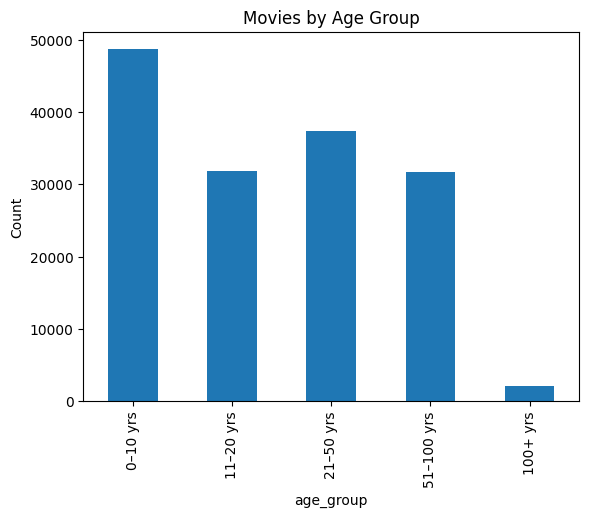

In [ ]:
bins = [0, 10, 20, 50, 100, 150]
labels = ['0–10 yrs', '11–20 yrs', '21–50 yrs', '51–100 yrs', '100+ yrs']
dfb['age_group'] = pd.cut(dfb['movie_age'], bins=bins, labels=labels)

dfb['age_group'].value_counts().sort_index().plot.bar(
    title='Movies by Age Group', ylabel='Count'
)
plt.show()


نلاحظ وجود عدد اكبر للافلام الموجهة للاطفال ثم بدرجة اقل للكبار 

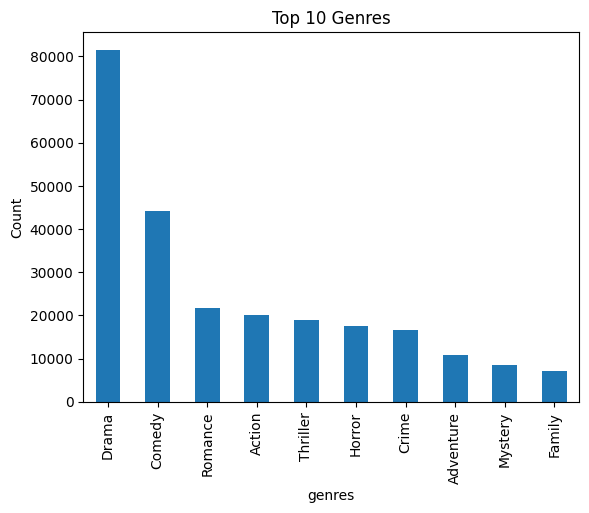

In [ ]:
dfb['genres'].str.split(',').explode().value_counts().head(10).plot.bar(
    title='Top 10 Genres'
)
plt.ylabel('Count')
plt.show()


شركات الافلام تحب جدا وجود دراما في الافلام كونها تجذب المشاهدين نحو الفلم , و نلاحظ بالمقارنة مع انواع الافلام انها نوع اضافي يضاف الى الافلام بكل انواعا , مثلا فلم اكشن -دراما او كوميدي - دراما <br>
و بدرجة ثانية نرى كوميديا, و باقي الانواع تملك توزع شبه متساوي

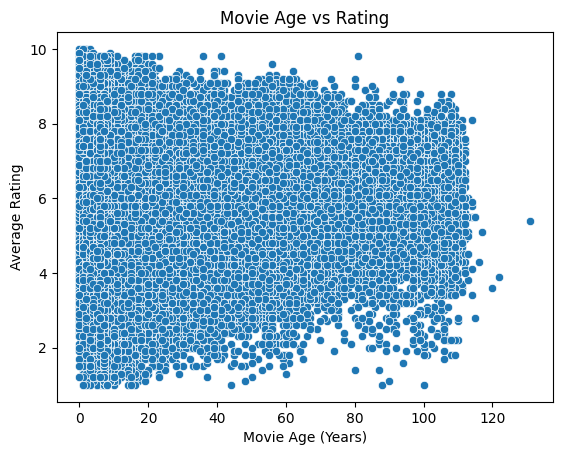

In [ ]:
sns.scatterplot(data=dfb, x='movie_age', y='averageRating')
plt.title('Movie Age vs Rating')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Average Rating')
plt.show()


### توزع تصنيف اوقات الفلم

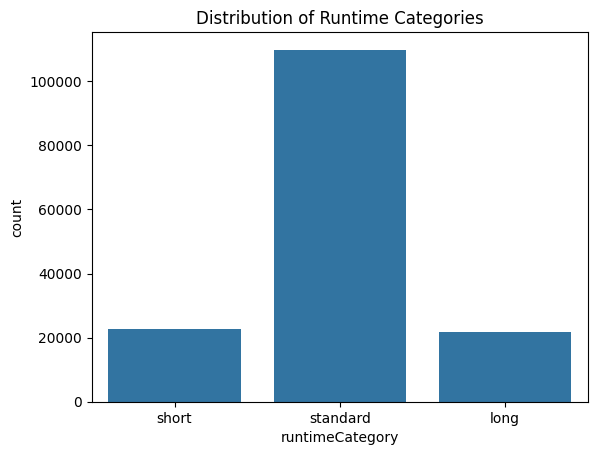

In [ ]:
sns.countplot(data=dfb, x='runtimeCategory')
plt.title('Distribution of Runtime Categories')
plt.show()


الافلام التي تصنف انها standard 
<br>
تشكل النسبة الاكبر و هي الهدف كون الطويلة و القصيرة ليست افلام موجهة للسينما , و بالتالي لاتأتي بارباح , و يجب معاملة هذه البيانات كبيانات خاطئة 

In [ ]:
dfb.sort_values(by='averageRating', ascending=False).head(10)[['primaryTitle', 'averageRating']]


primaryTitle  averageRating
104778         Sacred the Movie           10.0
120897                    Kirik           10.0
114270             One Decision           10.0
126605            Falsos Amigos           10.0
127299             Undocumented            9.9
117240          Branded by Fire            9.9
115737           A Summer Night            9.9
128594            Lottie's Girl            9.9
127801  The Night Before Easter            9.9
91377      Wolf Song: The Movie            9.9

## بيانات الممثلين و الاوسكار

### تحليل استكشافي للبيانات المتعلقة بالاوسكار

#### كم عدد الأفلام في البيانات التي لديها ترشيحات أو جوائز أوسكار؟



Count of movies by Oscar status:
movie_oscar
0    38302
1     2109
2      988
Name: count, dtype: int64


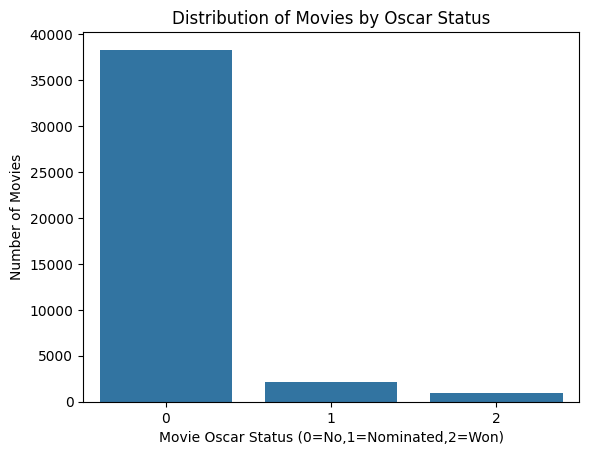

In [ ]:


print("Count of movies by Oscar status:")
movie_oscar_counts = leen_movies_df['movie_oscar'].value_counts().sort_index()
print(movie_oscar_counts)

sns.barplot(x=movie_oscar_counts.index, y=movie_oscar_counts.values)
plt.xlabel('Movie Oscar Status (0=No,1=Nominated,2=Won)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Oscar Status')
plt.show()


#### ما هو توزيع حالة الأوسكار في فريق العمل (الممثلين والمخرجين)؟ كم فيلم لديه فريق مرشح أو فائز بالأوسكار؟



Count of movies by credits Oscar status:
movie_credits_oscar
0    25255
1     6306
2     9838
Name: count, dtype: int64


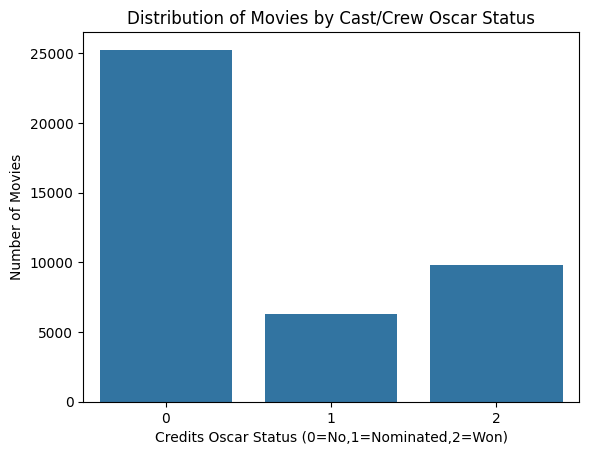

In [ ]:
print("Count of movies by credits Oscar status:")
credits_oscar_counts = leen_movies_df['movie_credits_oscar'].value_counts().sort_index()
print(credits_oscar_counts)

sns.barplot(x=credits_oscar_counts.index, y=credits_oscar_counts.values)
plt.xlabel('Credits Oscar Status (0=No,1=Nominated,2=Won)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Cast/Crew Oscar Status')
plt.show()


#### ما العلاقة بين عدد جوائز الأوسكار لشركات الإنتاج  وحالة الأوسكار للفيلم نفسه ؟



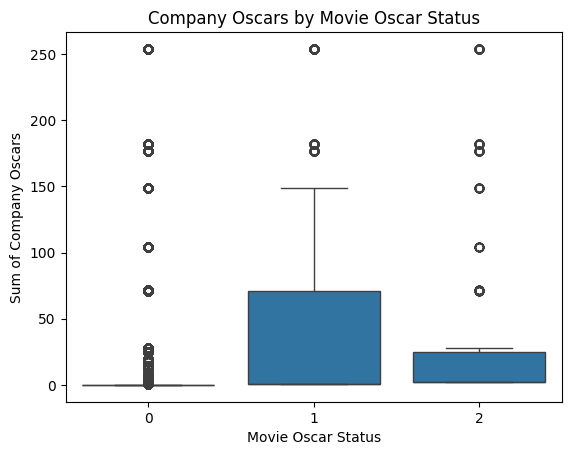

In [ ]:
sns.boxplot(x='movie_oscar', y='company_oscars', data=leen_movies_df)
plt.xlabel('Movie Oscar Status')
plt.ylabel('Sum of Company Oscars')
plt.title('Company Oscars by Movie Oscar Status')
plt.show()


هناك علاقة واضحة وإيجابية بين عدد جوائز الأوسكار التاريخية لشركات الإنتاج وحالة الأوسكار للفيلم نفسه
1. لأفلام التي ليس لديها أوسكار (الحالة 0): غالبية هذه الأفلام تُنتجها شركات لديها عدد قليل جداً من جوائز الأوسكار التاريخية (الوسيط قريب من الصفر، ومعظم الأفلام تقع ضمن نطاق منخفض جداً من جوائز الشركة). ومع ذلك، هناك بعض الاستثناءات (القيم المتطرفة) حيث تُنتج شركات ذات عدد كبير من جوائز الأوسكار أفلاماً لا تحصل على ترشيح أو فوز بالأوسكار.

2. الأفلام المرشحة للأوسكار (الحالة 1): تميل هذه الأفلام إلى أن تُنتجها شركات لديها سجل أوسكاري أعلى بشكل ملحوظ مقارنة بالفئة 0. فالوسيط ونطاق الربعين لمجموع جوائز الأوسكار للشركات هنا أعلى بكثير. هذا يشير إلى أن شركات الإنتاج ذات الخبرة والتاريخ الأوسكاري الكبير تزيد من فرص ترشيح أفلامها.

3. الأفلام الفائزة بالأوسكار (الحالة 2): تواصل هذه الفئة إظهار ارتباط إيجابي.

<br>

بشكل عام، يشير الرسم البياني إلى أن شركات الإنتاج ذات السجل الحافل بجوائز الأوسكار لديها فرصة أكبر بكثير لإنتاج أفلام يتم ترشيحها أو الفوز بجوائز الأوسكار. هذه الميزة (مجموع أوسكارات الشركة) ستكون مؤشراً قوياً جداً في نموذجك للتنبؤ بحالة أوسكار الفيلم.

#### كيف هو توزيع عدد جوائز الأوسكار التي حصلت عليها شركات الإنتاج بشكل عام؟



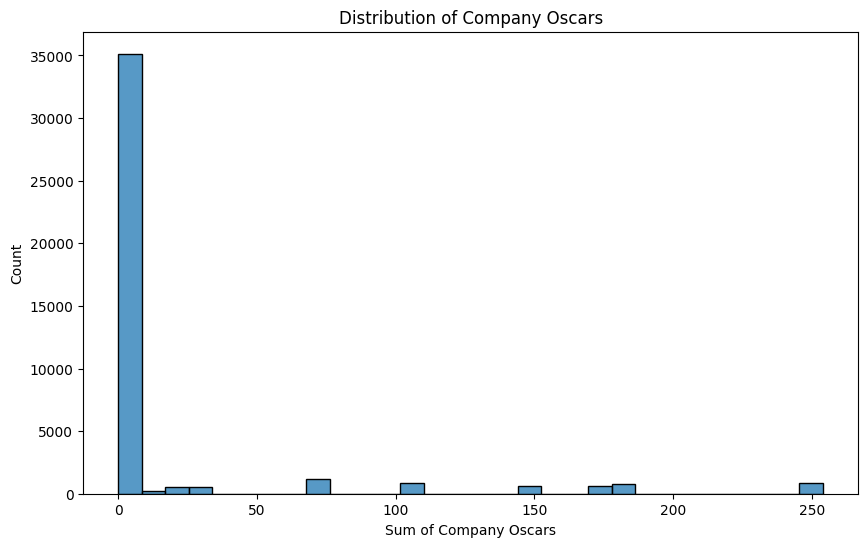

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(leen_movies_df['company_oscars'], bins=30, kde=False)
plt.xlabel('Sum of Company Oscars')
plt.title('Distribution of Company Oscars')
plt.show()


#### هل هناك علاقة ارتباط بين متوسط تقييم الممثلين  وميزات الأوسكار المختلفة؟



                     actors_avg_rating  movie_oscar  movie_credits_oscar  \
actors_avg_rating             1.000000     0.130294             0.295808   
movie_oscar                   0.130294     1.000000             0.276116   
movie_credits_oscar           0.295808     0.276116             1.000000   
company_oscars                0.229988     0.128135             0.259672   

                     company_oscars  
actors_avg_rating          0.229988  
movie_oscar                0.128135  
movie_credits_oscar        0.259672  
company_oscars             1.000000  


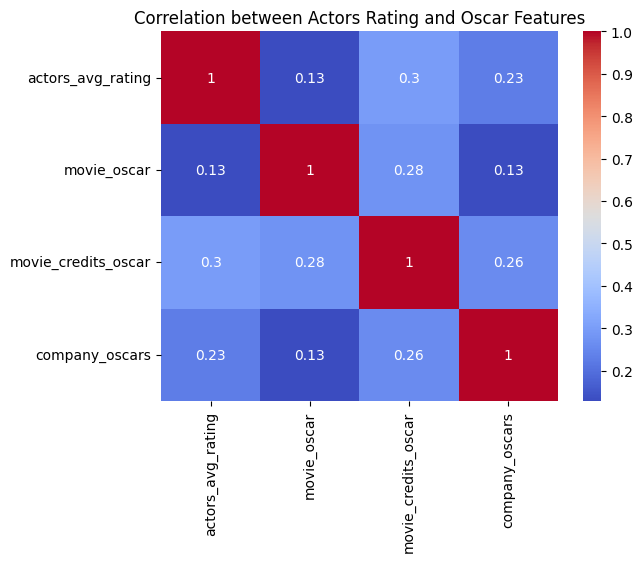

In [ ]:
corr_df = leen_movies_df[['actors_avg_rating', 'movie_oscar', 'movie_credits_oscar', 'company_oscars']]
corr = corr_df.corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Actors Rating and Oscar Features')
plt.show()


**نعم، توجد علاقة ارتباط إيجابية بين متوسط تقييم الممثلين وميزات الأوسكار المختلفة، ولكنها تتراوح بين الضعيفة والمعتدلة**
1. متوسط تقييم الممثلين وحالة أوسكار الفيلم: الارتباط هنا ضعيف جداً (0.13). هذا يعني أن وجود متوسط تقييم عالٍ للممثل لا يرتبط بقوة بكون الفيلم نفسه فائزاً أو مرشحاً للأوسكار.

2. متوسط تقييم الممثلين وعدد جوائز الأوسكار لطاقم العمل بالفيلم: يوجد ارتباط معتدل (0.3). هذا يشير إلى أن الأفلام التي يشارك فيها ممثلون لديهم متوسط تقييم عالٍ تميل أيضاً إلى أن يكون لديها طاقم عمل (ممثلين آخرين، مخرجين، كُتاب، إلخ) فازوا أو رشحوا للأوسكار بشكل عام.

3. متوسط تقييم الممثلين وجوائز أوسكار شركة الإنتاج: يوجد ارتباط ضعيف إلى متوسط (0.23). هذا يعني أن الممثلين ذوي التقييمات العالية يميلون للعمل مع شركات إنتاج لديها سجل أوسكاري أفضل، ولكن الارتباط ليس قوياً جداً.
<br>
بشكل عام، يبدو أن ارتباط متوسط تقييم الممثلين بـ "جوائز أوسكار طاقم العمل" هو الأقوى من بين ميزات الأوسكار المذكورة، مما يشير إلى أن جودة طاقم العمل ككل قد تكون مؤشراً أفضل من مجرد حالة أوسكار الفيلم نفسه أو تاريخ شركة الإنتاج في سياق تقييم الممثل.

### تحليل استكشافي للبيانات المتعلقة بالممثلين

#### ما هو توزيع متوسط تقييمات الممثلين ؟ وهل هناك فرق في التوزيع بين الممثلين أصحاب عدد الأفلام القليل والكثير؟

/tmp/ipython-input-78-3679941488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


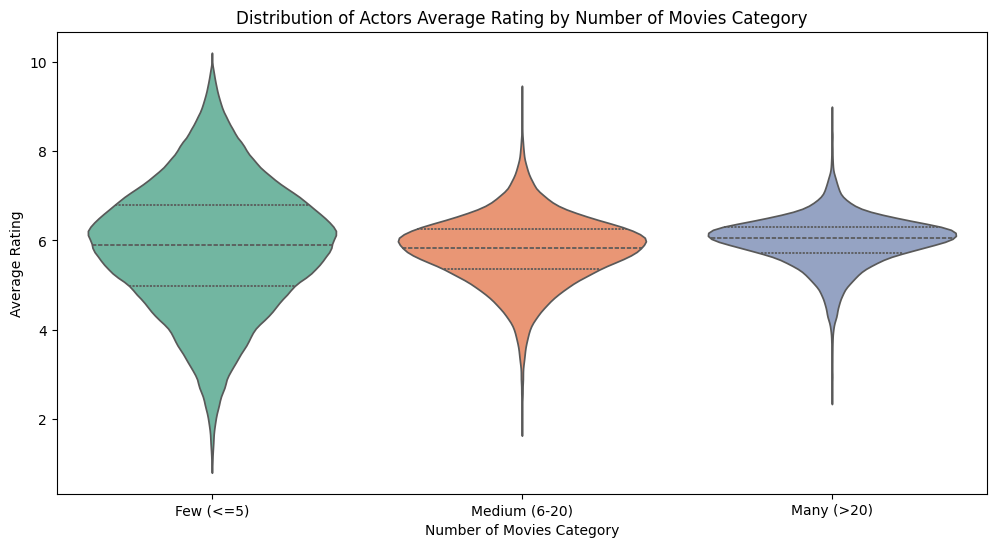

In [ ]:


# few (<=5), medium (6-20), many (>20)
actors_rating_hanna_df['num_movies_category'] = pd.cut(
    actors_rating_hanna_df['num_movies'],
    bins=[-1, 5, 20, 1000],
    labels=['Few (<=5)', 'Medium (6-20)', 'Many (>20)']
)

plt.figure(figsize=(12,6))
sns.violinplot(
    x='num_movies_category',
    y='average_rating',
    data=actors_rating_hanna_df,
    inner='quartile',
    palette='Set2'
)
plt.title('Distribution of Actors Average Rating by Number of Movies Category')
plt.xlabel('Number of Movies Category')
plt.ylabel('Average Rating')
plt.show()


---
* نلاحظ أن فئة "قليل"  لديها نطاق أوسع لتوزيع التقييمات، بينما الفئتان "متوسط" و"كثير" تظهران تجمّعاً أكبر حول المتوسط
* الخطوط المتقطعة داخل كل "كمان" تمثل الربيعات  والتوسط ، مما يساعد في فهم التشتت والنزعة المركزية لكل فئة.
<br>

**الاجابة النهائية:**
<br>
- توزيع متوسط تقييمات الممثلين يميل إلى التمركز حول 6 إلى 6.5 تقريباً لمعظم الفئات. فنعم، هناك فرق في التوزيع بين الممثلين أصحاب عدد الأفلام القليل والكثير. الممثلون أصحاب عدد الأفلام "القليل" (أقل من أو يساوي 5) يظهرون توزيعاً أوسع وأكثر تشتتاً لمتوسط تقييماتهم، مع وجود قيم متطرفة أعلى وأدنى. بينما الممثلون أصحاب عدد الأفلام "المتوسط" (6-20) و"الكثير" (أكثر من 20) يظهرون توزيعاً أكثر تضييقاً وتقارباً حول المتوسط، مما يشير إلى أن الممثلين الذين شاركوا في عدد أكبر من الأفلام يميلون لامتلاك تقييمات  أكثر استقراراً وتجانساً.
---

#### كيف يتوزع عدد الأفلام التي شارك فيها الممثلون ، وهل هناك علاقة بين عدد الأفلام ومتوسط التقييم؟

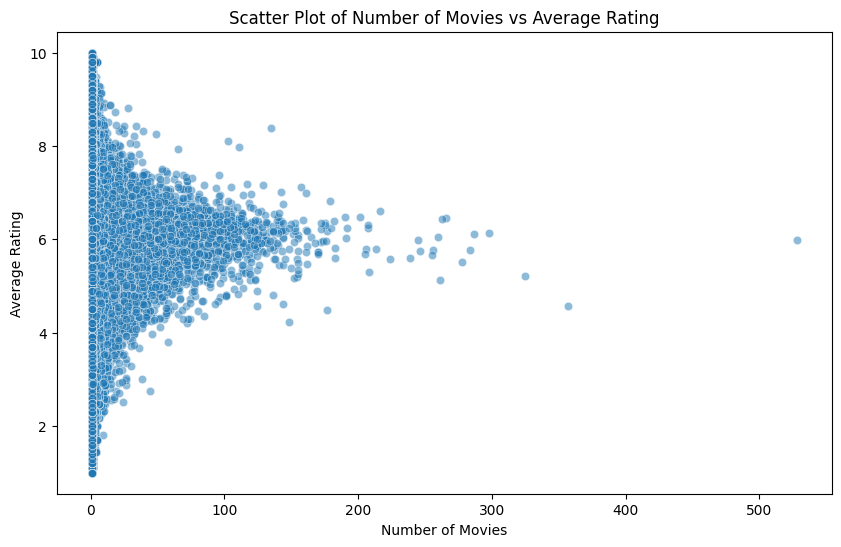

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='num_movies',
    y='average_rating',
    data=actors_rating_hanna_df,
    alpha=0.5
)
plt.title('Scatter Plot of Number of Movies vs Average Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Average Rating')
plt.show()


* يتوزع عدد الأفلام التي شارك فيها الممثلون بشكل شديد الانحراف نحو اليمين، حيث أن الغالبية العظمى من الممثلين قد شاركوا في عدد قليل جداً من الأفلام (أقل من حوالي 50-100 فيلم)
<br>

**الاجابة النهائية**
<br>
- نعم، هناك علاقة واضحة بين عدد الأفلام ومتوسط التقييم: فالممثلون الذين شاركوا في عدد قليل جداً من الأفلام يظهرون نطاقاً واسعاً جداً لمتوسط تقييماتهم (منخفضة جداً إلى عالية جداً)، بينما الممثلون الذين شاركوا في عدد أكبر من الأفلام يميلون لأن يكون متوسط تقييماتهم أكثر استقراراً وتمركزاً حول قيمة معينة (غالباً ما تكون متوسطة إلى عالية، ولكن التقييمات الشديدة الارتفاع أو الانخفاض تصبح أقل شيوعاً مع زيادة عدد الأفلام). هذا يشير إلى أن الممثلين ذوي الخبرة الأكبر (عدد أفلام أعلى) يمتلكون تقييمات أكثر اتساقاً وأقل تطرفاً.

#### هل يوجد تباين كبير بين متوسط تقييم الممثلين  والتقييم البيزي ؟ كيف يظهر الفرق بينهما؟

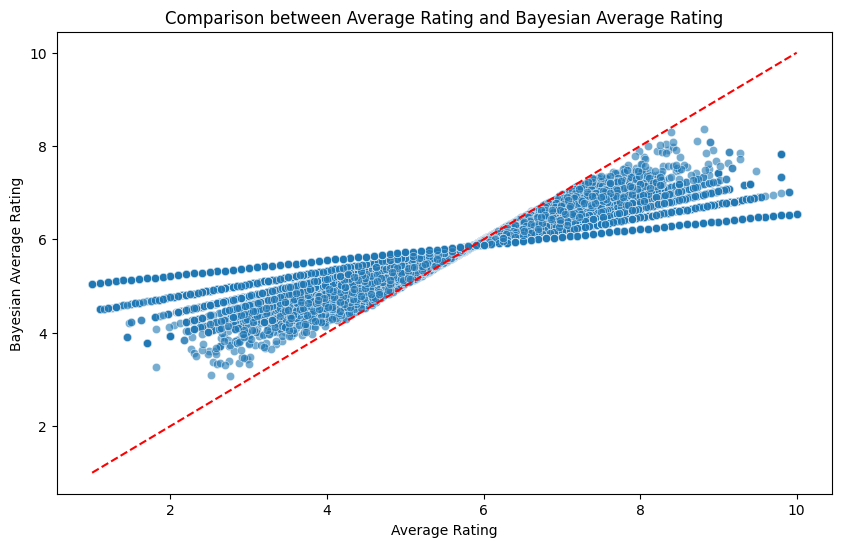

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='average_rating',
    y='bayesian_avg_rating',
    data=actors_rating_hanna_df,
    alpha=0.6
)
plt.plot([actors_rating_hanna_df['average_rating'].min(), actors_rating_hanna_df['average_rating'].max()],
         [actors_rating_hanna_df['average_rating'].min(), actors_rating_hanna_df['average_rating'].max()],
         'r--')  # 45 degree line for reference
plt.title('Comparison between Average Rating and Bayesian Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Bayesian Average Rating')
plt.show()


* يمثل الخط الأحمر المتقطع حالة التطابق التام (أي عندما يكون التقييمان متساويين).
* نلاحظ أن النقاط تتجمع حول الخط الأحمر في المنتصف، لكنها تتباعد عنه عند الأطراف.
* لنسبة للتقييمات المنخفضة (أقل من حوالي 5.5)، يميل التقييم البيزي لأن يكون أعلى من متوسط التقييم العادي
* بالنسبة للتقييمات العالية (أعلى من حوالي 6.5)، يميل التقييم البيزي لأن يكون أقل من متوسط التقييم العادي
<br>

**الاجابة النهائية**
<br>
نعم، يوجد تباين واضح بين متوسط تقييم الممثلين والتقييم البيزي، خاصة عند الأطراف. يظهر الفرق بينهما كالتالي:

للتقييمات المنخفضة: الممثلون ذوو متوسط التقييم العادي المنخفض (على المحور السيني) يتم "سحب" تقييمهم البيزي نحو متوسط التقييم العام (أعلى من متوسطهم العادي). هذا يعني أن التقييم البيزي يزيد من تقييمات الممثلين ذوي التقييمات المنخفضة، خصوصاً إذا كان عدد أفلامهم قليلاً، مما يوفر تقييماً أكثر واقعية.

للتقييمات العالية: الممثلون ذوو متوسط التقييم العادي المرتفع (على المحور السيني) يتم "سحب" تقييمهم البيزي نحو متوسط التقييم العام (أقل من متوسطهم العادي). هذا يقلل من تقييمات الممثلين ذوي التقييمات المرتفعة جداً، خاصة إذا كانت مبنية على عدد قليل من الأفلام، مما يقلل من تأثير التقييمات المبالغ فيها.

بشكل عام، يعمل التقييم البيزي على "تنعيم" التقييمات وسحبها نحو المتوسط الكلي، خاصة للممثلين الذين لديهم عدد قليل من الأفلام، مما يقلل من تباين التقييمات الناتجة عن حجم العينة الصغير.

#### ما هو التوزيع العام لأعلى تقييمات الأفلام التي شارك فيها الممثل ؟ وهل هناك علاقة بين تقييم أفضل فيلم وعدد الأفلام التي شارك فيها الممثل؟

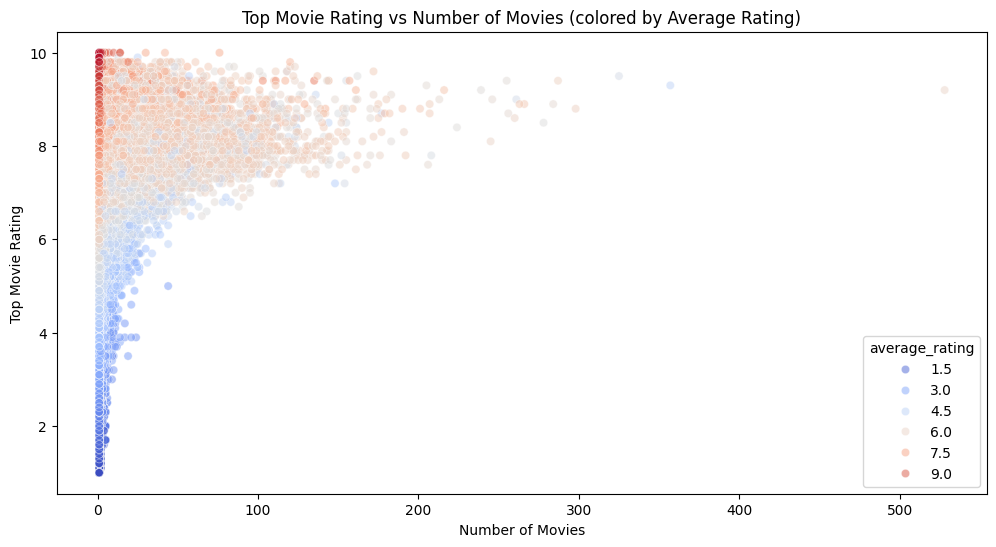

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='num_movies',
    y='top_movie_rating',
    data=actors_rating_hanna_df,
    alpha=0.5,
    hue='average_rating',
    palette='coolwarm'
)
plt.title('Top Movie Rating vs Number of Movies (colored by Average Rating)')
plt.xlabel('Number of Movies')
plt.ylabel('Top Movie Rating')
# plt.colorbar(label='Average Rating')
plt.show()


* القيم العالية جداً لـ "أعلى تقييم لفيلم" (مثل 9 و 10) تظهر بشكل كبير بين الممثلين ذوي عدد الأفلام القليل، والذين يميل متوسط تقييمهم العام ليكون مرتفعاً (النقاط الحمراء/البرتقالية في الأعلى).
* كلما زاد عدد الأفلام، يميل التوزيع إلى أن يصبح أكثر تجانساً، مع استمرار وجود ممثلين بأفلام ذات تقييم عالٍ، ولكن يصبح وجود الممثلين ذوي "أعلى تقييم فيلم" شديد الارتفاع (9-10) أقل شيوعاً نسبياً.
<br>

**الاجابة النهائية**
<br>
- لعدد الأفلام القليل: يوجد تشتت كبير في "أعلى تقييم فيلم"، حيث يمتلك الكثير من الممثلين في هذه الفئة فيلماً واحداً أو أكثر بتقييمات عالية جداً (يميلون للون الأحمر/البرتقالي مما يشير لمتوسط تقييم عام مرتفع للممثل).
- لعدد الأفلام الكبير: بينما يستمر وجود ممثلين بأفلام ذات تقييم عالٍ، يلاحظ أن التقييمات العالية  تصبح أقل تكراراً بالنسبة لعدد الممثلين الكلي، ويميل الممثلون الذين شاركوا في عدد كبير جداً من الأفلام إلى أن يكون لديهم "أعلى تقييم فيلم" يقع في نطاق 7-9 على الأغلب. بمعنى آخر، من الأسهل على ممثل ذي عدد أفلام قليل أن يمتلك فيلماً واحداً بتقييم عالي جدا مقارنة بممثل يمتلك مئات الأفلام حيث يصبح متوسطه أكثر استقراراً وقد يقلل من احتمالية وجود فيلم واحد بتقييم عالي جدا.

#### ماهو توزع تقييم الممثلين في كل من المنهجيات الثلاث ؟ و كيف نصنف الفرق ؟

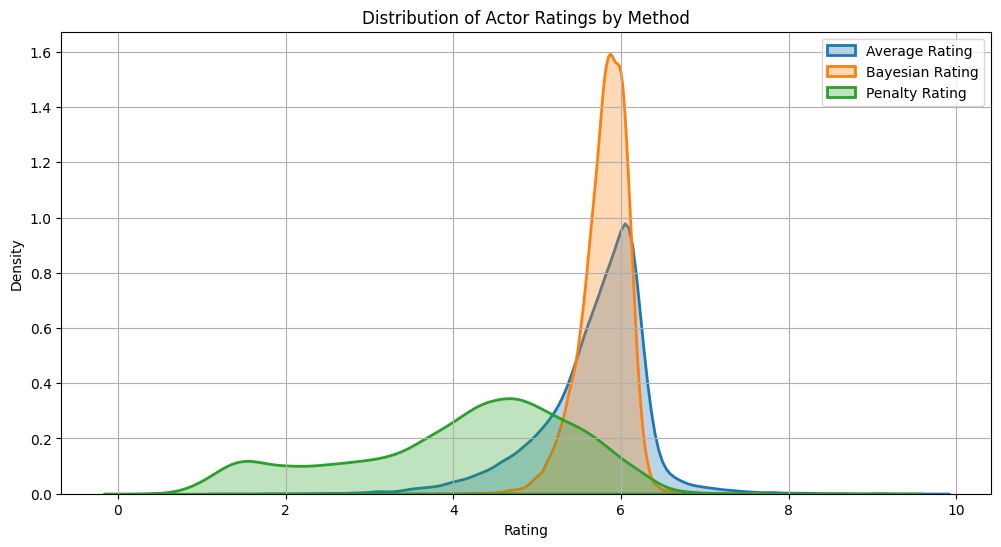

In [ ]:


plt.figure(figsize=(12, 6))

sns.kdeplot(leen_movies_df['actors_avg_rating'], label='Average Rating', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(leen_movies_df['actors_bayesian_rating'], label='Bayesian Rating', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(leen_movies_df['actors_penalty_rating'], label='Penalty Rating', fill=True, alpha=0.3, linewidth=2)

plt.title('Distribution of Actor Ratings by Method')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


* يمتد توزيع "متوسط التقييم العادي" على نطاق واسع، بينما "التقييم البيزي" متمركز بشكل حاد، و"تقييم العقوبة" يظهر توزعاً أوسع مع انحراف نحو القيم الأقل.


<br>


**الاجابة النهائية**

<br>

**توزع تقييم الممثلين في كل منهجية**
<br>
1.  متوسط التقييم العادي (Average Rating - المنحنى الأزرق):

* يُظهر توزعاً واسعاً نسبياً يمتد عبر معظم نطاق التقييمات (من حوالي 0 إلى 10).

* لديه قمة رئيسية حوالي 6، ولكن يظهر أيضاً بعض التشتت والقمم الأصغر عند التقييمات الأقل، مما يشير إلى وجود ممثلين بتقييمات منخفضة ومتوسطة وعالية.

* يعكس هذا التوزيع الخام للتقييمات دون أي تعديل لحجم العينة.

2.  التقييم البيزي (Bayesian Rating - المنحنى البرتقالي):

* يُظهر توزعاً ضيقاً جداً ومتركّزاً بشكل حاد حول قيمة معينة (حوالي 6).

* القمة هنا أعلى وأضيق بكثير من المنحنيات الأخرى.

* هذا يدل على أن التقييم البيزي يقوم "بتنعيم" التقييمات، حيث يسحب التقييمات المتطرفة (سواء كانت عالية جداً أو منخفضة جداً) نحو المتوسط الكلي، خاصة بالنسبة للممثلين ذوي عدد الأفلام القليل، مما يقلل من التباين ويجعل التقييمات أكثر استقراراً وموثوقية.

3.  تقييم العقوبة (Penalty Rating - المنحنى الأخضر):

* يُظهر توزعاً أوسع من التقييم البيزي ولكنه ليس واسعاً مثل متوسط التقييم العادي.

* القمة الرئيسية لهذا التوزيع تقع عند قيمة أقل نسبياً (حوالي 4.5 إلى 5)، وهناك قمة أصغر عند قيم منخفضة جداً (حوالي 1.5).

* يشير هذا إلى أن تطبيق "نظام العقوبة" (الذي يعتمد على عدد الأصوات للفيلم) يميل إلى خفض التقييمات الإجمالية للممثلين، وربما يكشف عن مجموعتين من الممثلين: مجموعة تقييماتهم منخفضة جداً (غالباً بسبب أفلام بتقييمات متدنية جداً و/أو عدد أصوات قليل)، ومجموعة تقييماتهم متوسطة ولكن أقل من المنهجيات الأخرى.

<br>

<br>

**يمكن تصنيف الفرق على النحو التالي**
<br>
- متوسط التقييم العادي: هو المقياس "الخام" والأكثر تشتتاً، ويعكس التباين الكامل في الأداء الظاهري للممثلين، لكنه قد يكون مضللاً للممثلين ذوي البيانات القليلة.

- التقييم البيزي: هو مقياس "مُعدّل للموثوقية" أو "مُنعّم". يهدف إلى تقديم تقييم أكثر عدلاً وموثوقية عن طريق تخفيف تأثير القيم المتطرفة وتقريب التقييمات من المتوسط العام، خاصة عندما تكون البيانات قليلة.

- تقييم العقوبة: هو مقياس "مُركّز على الجودة المثبتة" أو "مُعاقب على عدم الشعبية/الضعف". يعطي وزناً أقل للأفلام التي لم تحظَ بعدد كافٍ من التقييمات أو التي حصلت على تقييمات منخفضة، مما يؤدي إلى سحب التقييمات الإجمالية نحو قيم أقل، ويسلط الضوء على الممثلين الذين شاركوا في أفلام ذات تقييمات عالية وعدد أصوات كبير.
<br>
باختصار، يقدم كل من هذه المنهجيات منظوراً مختلفاً لجودة أداء الممثل، مع التركيز على جوانب مختلفة مثل الخامة، الموثوقية الإحصائية، أو الجودة المثبتة بشعبية التصويت.

In [ ]:
actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)


# قسم التعليم الآلي 

## تحميل البيانات


In [ ]:
df = pd.read_csv(r"C:\Users\asus\Desktop\5\2\ML\project\data\lNH_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37093 entries, 0 to 37092
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        37093 non-null  int64  
 1   title                     37093 non-null  object 
 2   genres_x                  37093 non-null  object 
 3   original_language         37093 non-null  object 
 4   overview                  37093 non-null  object 
 5   popularity                37093 non-null  float64
 6   production_companies      37093 non-null  object 
 7   release_date              37093 non-null  object 
 8   budget                    37093 non-null  float64
 9   revenue                   37093 non-null  float64
 10  runtime                   37093 non-null  float64
 11  status                    37093 non-null  object 
 12  tagline                   37093 non-null  object 
 13  vote_average              37093 non-null  float64
 14  vote_c

In [ ]:
print("genres_x:", df['genres_x'].notna().sum())
print("genres_y:", df['genres_y'].notna().sum())


genres_x: 37093
genres_y: 25876


In [ ]:
df.status.value_counts() 

status
Released    37093
Name: count, dtype: int64

## تجربة 1
### تحديد الهدف <br>
 target="profit" or target="revenue"

In [ ]:


drop_cols = [
    'id', 'title', 'tconst', 'primaryTitle', 'originalTitle',
    'normalized_title', 'normalized_primary_title',
    'release_date',
    'original_language',
    'runtimeMinutes',
    'startYear',
    'genres_y', 
    'status',  
    'titleType',   
]

text_features = [
    'genres_x', 'overview', 'production_companies',
    'credits', 'normalized_credits_list','tagline'
]
df = df.drop(columns=drop_cols)

target1 = df['profit']
target2=df['revenue']
from sklearn.model_selection import train_test_split

#  0. تعريف الأهداف 
target1 = df['profit']
target2 = df['revenue']
df1 = df.drop(columns=['profit','revenue'])
df2 = df.drop(columns=['profit','revenue'])

#  1. أول تقسيم: Train+Temp (60% + 40%) 
X_train1, X_temp1, Y_train1, Y_temp1 = train_test_split(
    df1, target1,
    test_size=0.4,
    shuffle=True,
    random_state=42
)

X_train2, X_temp2, Y_train2, Y_temp2 = train_test_split(
    df2, target2,
    test_size=0.4,
    shuffle=True,
    random_state=42
)

#  2. ثاني تقسيم: Validation + Test (كل منهما 20%) من Temp 
X_valid1, X_test1, Y_valid1, Y_test1 = train_test_split(
    X_temp1, Y_temp1,
    test_size=0.5,
    shuffle=True,
    random_state=42
)

X_valid2, X_test2, Y_valid2, Y_test2 = train_test_split(
    X_temp2, Y_temp2,
    test_size=0.5,
    shuffle=True,
    random_state=42
)



## النماذج المستخدمة
 1) Linear Regression
 2) Decision Tree
 3) Bagging
 4) Random Forest
 5) XGBoost
 6) Gradient Boosting
7) LightGBM
8) CatBoost


In [ ]:

#  1. إعداد الأعمدة النصية 
for col in text_features:
    df1[col] = df1[col].fillna('')
   

categorical_features1 = [col for col in df1.columns if df1[col].dtype == 'object' and col not in text_features]
numeric_features1 = [col for col in df1.columns if df1[col].dtype in ['int64', 'float64']]

categorical_features2 = [col for col in df2.columns if df2[col].dtype == 'object' and col not in text_features]
numeric_features2 = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64']]

#  2. دالة اختيار نصوص
def text_column_selector(X):
    return X.squeeze()

#  3. إعداد الـ Preprocessor
def make_preprocessor(categorical_features, numeric_features):
    transformers = []
    for col in text_features:
        transformers.append((
            col,
            Pipeline([
                ('selector', FunctionTransformer(text_column_selector, validate=False)),
                ('tfidf', TfidfVectorizer(max_features=100))
            ]),
            col
        ))

    transformers.append((
        'cat',
        Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]),
        categorical_features
    ))

    transformers.append((
        'num',
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]),
        numeric_features
    ))

    return ColumnTransformer(transformers=transformers)

preprocessor1 = make_preprocessor(categorical_features1, numeric_features1)
preprocessor2 = make_preprocessor(categorical_features2, numeric_features2)

#  4. النماذج
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric='rmse'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

#  5. دالة التقييم
def evaluate_models(X_train, Y_train, X_valid, Y_valid, preprocessor):
    results = []
    trained_models = {}
    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocess', preprocessor),
            ('model', model)
        ])
        pipeline.fit(X_train, Y_train)
        preds = pipeline.predict(X_valid)
        r2 = r2_score(Y_valid, preds)
        results.append({"Model": name, "R2 Score": r2})
        trained_models[name] = pipeline
        print(f" {name} done with R2: {r2:.4f}")
    return pd.DataFrame(results), trained_models


#  7. تدريب على الإيرادات
print("\n=== Results on Revenue Prediction ===")
results_revenue, trained_revenue_models = evaluate_models(X_train2, Y_train2, X_valid2, Y_valid2, preprocessor2)
print(tabulate(results_revenue, headers="keys", tablefmt="grid", showindex=False))
#  7. تدريب على الربح
print("\n=== Results on Profit Prediction ===")
results_profit, trained_profit_models = evaluate_models(X_train1, Y_train1, X_valid1, Y_valid1, preprocessor1)
print(tabulate(results_profit, headers="keys", tablefmt="grid", showindex=False))

#  8. تقييم أفضل موديل على test set
best_profit_model_name = results_profit.sort_values('R2 Score', ascending=False).iloc[0]['Model']
best_revenue_model_name = results_revenue.sort_values('R2 Score', ascending=False).iloc[0]['Model']

print(f"\n Testing best Profit model ({best_profit_model_name})")
best_profit_model = trained_profit_models[best_profit_model_name]
profit_test_r2 = r2_score(Y_test1, best_profit_model.predict(X_test1))

print(f"\n Testing best Revenue model ({best_revenue_model_name})")
best_revenue_model = trained_revenue_models[best_revenue_model_name]
revenue_test_r2 = r2_score(Y_test2, best_revenue_model.predict(X_test2))

print("\n=== Final Test Set R2 Scores ===")
test_results = [
    ["Profit", best_profit_model_name, f"{profit_test_r2:.4f}"],
    ["Revenue", best_revenue_model_name, f"{revenue_test_r2:.4f}"]
]
print(tabulate(test_results, headers=["Target", "Best Model", "Test R2"], tablefmt="fancy_grid"))



=== Results on Revenue Prediction ===
 Linear Regression done with R2: 0.7785
 Decision Tree done with R2: 0.6171
 Bagging done with R2: 0.7969
 Random Forest done with R2: 0.8224
 XGBoost done with R2: 0.7909
 Gradient Boosting done with R2: 0.7818
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80601
[LightGBM] [Info] Number of data points in the train set: 22255, number of used features: 715
[LightGBM] [Info] Start training from score 14363940.266412


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


 LightGBM done with R2: 0.8018
 CatBoost done with R2: 0.8239
+-------------------+------------+
| Model             |   R2 Score |
+===================+============+
| Linear Regression |   0.778514 |
+-------------------+------------+
| Decision Tree     |   0.61707  |
+-------------------+------------+
| Bagging           |   0.796855 |
+-------------------+------------+
| Random Forest     |   0.822381 |
+-------------------+------------+
| XGBoost           |   0.79086  |
+-------------------+------------+
| Gradient Boosting |   0.78178  |
+-------------------+------------+
| LightGBM          |   0.801839 |
+-------------------+------------+
| CatBoost          |   0.823908 |
+-------------------+------------+

=== Results on Profit Prediction ===
 Linear Regression done with R2: 0.6553
 Decision Tree done with R2: 0.4496
 Bagging done with R2: 0.6928
 Random Forest done with R2: 0.7254
 XGBoost done with R2: 0.6695
 Gradient Boosting done with R2: 0.6784
[LightGBM] [Info] Auto-

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


 LightGBM done with R2: 0.6818
 CatBoost done with R2: 0.7327
+-------------------+------------+
| Model             |   R2 Score |
+===================+============+
| Linear Regression |   0.655346 |
+-------------------+------------+
| Decision Tree     |   0.449648 |
+-------------------+------------+
| Bagging           |   0.692846 |
+-------------------+------------+
| Random Forest     |   0.725412 |
+-------------------+------------+
| XGBoost           |   0.669539 |
+-------------------+------------+
| Gradient Boosting |   0.678401 |
+-------------------+------------+
| LightGBM          |   0.681772 |
+-------------------+------------+
| CatBoost          |   0.732668 |
+-------------------+------------+

 Testing best Profit model (CatBoost)

 Testing best Revenue model (CatBoost)

=== Final Test Set R2 Scores ===
╒══════════╤══════════════╤═══════════╕
│ Target   │ Best Model   │   Test R2 │
╞══════════╪══════════════╪═══════════╡
│ Profit   │ CatBoost     │    0.7096 │


In [ ]:

results_folder = r"C:\Users\asus\Desktop\5\2\ML\project\results"
os.makedirs(results_folder, exist_ok=True)

results_profit.to_csv(os.path.join(results_folder, "results_profit.csv"), index=False)
results_revenue.to_csv(os.path.join(results_folder, "results_revenue.csv"), index=False)

test_results_df = pd.DataFrame(test_results, columns=["Target", "Best Model", "Test R2"])
test_results_df.to_csv(os.path.join(results_folder, "test_results.csv"), index=False)

print(" الملفات تم حفظها في:", results_folder)


 الملفات تم حفظها في: C:\Users\asus\Desktop\5\2\ML\project\results


اعتمدنا على التنبؤ بالايرادات لان نتائجها افضل 

يوجد ايرادات  وميزانيات صفرية كبيرة جدا تقريبا 80% من الداتا 

In [ ]:
df['revenue'].value_counts()


revenue
0.0           29594
1000000.0        26
2000000.0        24
3000000.0        21
11000000.0       20
              ...  
42300873.0        1
31155435.0        1
28623900.0        1
12376625.0        1
524.0             1
Name: count, Length: 6770, dtype: int64

In [ ]:
df[df['revenue'] == 0].sample(5)

genres_x  \
8143                    Music-Drama   
23981                        Comedy   
8410   Crime-Drama-Thriller-Mystery   
26197                       Western   
20417         Action-Comedy-Western   

                                                overview  popularity  \
8143   A troubled and angry 11-year-old orphan from a...       9.299   
23981  A woman screenwriter lives in a shabby bungalo...       1.834   
8410   Tells the seemingly random yet vitally connect...       9.063   
26197  A hired hand gets caught between a noble ranch...       1.481   
20417  Packaged and sold as an outdoor actioner Many ...       2.533   

                                    production_companies     budget  revenue  \
8143                     Informant Media-Informant Films        0.0      0.0   
23981                                  Columbia Pictures        0.0      0.0   
8410      Firm Films-Media 8 Entertainment-MDP Worldwide  6000000.0      0.0   
26197  Allied Artists Pictures-Scott R. Dunlap Produc...        0.0      0.0   
20417                                Metro-Goldwyn-Mayer        0.0      0.0   

       runtime                                            tagline  \
8143     106.0  Extraordinary talent needs extraordinary inspi...   
23981    102.0  Three delightful players in a comedy modern, f...   
8410      86.0                        Fate can change in seconds.   
26197     82.0  Land Of Lawless Living...And Violence By Vigil...   
20417     95.0                  KENTUCKY ADVENTURE in CINEMASCOPE   

       vote_average  vote_count  ... runtimeCategory  averageRating  \
8143          6.800       243.0  ...        standard            6.7   
23981         4.700         3.0  ...        standard            6.3   
8410          6.805       692.0  ...        standard            7.1   
26197         5.100         5.0  ...        standard            6.2   
20417         6.400         9.0  ...        standard            6.2   

       movie_age  rating_category   age_group  has_superstar_actor  \
8143        11.0             Good   11–20 yrs                False   
23981       80.0          Average  51–100 yrs                False   
8410        22.0             Good   21–50 yrs                False   
26197       72.0          Average  51–100 yrs                False   
20417       70.0          Average  51–100 yrs                False   

       movie_oscar                            normalized_credits_list  \
8143             0  ['dustinhoffman', 'kevinmchale', 'joshlucas', ...   
23981            0  ['irenedunne', 'alexanderknox', 'charlescoburn...   
8410             0  ['rachaelleighcook', 'hilaryswank', 'shawnhato...   
26197            0  ["edmondo'brien", 'helenwestcott', 'robertlowe...   
20417            0  ['roberttaylor', 'eleanorparker', 'victormclag...   

       movie_credits_oscar  company_oscars  
8143                     2               0  
23981                    2             104  
8410                     2               0  
26197                    0               0  
20417                    2             258  

[5 rows x 30 columns]

In [ ]:

df['budget'].value_counts()

budget
0.0           27654
10000000.0      284
1000000.0       270
20000000.0      261
5000000.0       249
              ...  
7834998.0         1
1271000.0         1
575.0             1
575375.0          1
112000.0          1
Name: count, Length: 1221, dtype: int64

In [ ]:
df.profit.value_counts()

profit
 0.0           25991
-1000000.0       199
-2000000.0       121
-3000000.0       120
-500000.0        115
               ...  
 45200903.0        1
 30509925.0        1
 841334.0          1
-6198245.0         1
-112000.0          1
Name: count, Length: 7526, dtype: int64

## تجربة 2
target=  Log("revenue">0)  لجعل توزيع الداتا طبيعي اكثر 
<br>
**(Log + Clip <1 to 0)**

In [ ]:


for col in text_features:
    df2[col] = df2[col].fillna('')

categorical_features2 = [col for col in df2.columns if df2[col].dtype == 'object' and col not in text_features]
numeric_features2 = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64']]

def text_column_selector(X):
    return X.squeeze()

def make_preprocessor(categorical_features, numeric_features):
    transformers = []

    for col in text_features:
        transformers.append((
            col,
            Pipeline([
                ('selector', FunctionTransformer(text_column_selector, validate=False)),
                ('tfidf', TfidfVectorizer(max_features=50))
            ]),
            col
        ))

    transformers.append((
        'cat',
        Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]),
        categorical_features
    ))

    transformers.append((
        'num',
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]),
        numeric_features
    ))

    return ColumnTransformer(transformers=transformers)

#  تقسيم البيانات 
X_train, X_test, y_train, y_test = train_test_split(df2, target2, test_size=0.3, random_state=42)

# فقط للإيرادات الإيجابية
train_mask = y_train > 0
X_train_reg = X_train[train_mask]
y_train_reg = np.log1p(y_train[train_mask])

# تجهيز الـ preprocessor
preprocessor = make_preprocessor(categorical_features2, numeric_features2)
preprocessor.fit(X_train)

# تحويل البيانات
X_train_trans = preprocessor.transform(X_train_reg)
X_test_trans  = preprocessor.transform(X_test)

#  النماذج 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric='rmse'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

#  تدريب وتقييم 
results = []

for name, model in models.items():
    model.fit(X_train_trans, y_train_reg)

    predicted_revenues = []
    for i in range(X_test.shape[0]):
        x_trans = X_test_trans[i].reshape(1, -1)
        pred_log = model.predict(x_trans)[0]
        pred = np.expm1(pred_log)
        predicted_revenues.append(0 if pred < 1 else pred)

    y_true = y_test.values
    y_pred = np.array(predicted_revenues)

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    results.append({
        'Model': name,
        'R²': round(r2, 4),
        'MAE': round(mae, 2),
    })

print("\n Evaluation Metrics (Log + Clip <1 to 0):")
print(tabulate(results, headers='keys', tablefmt='grid'))

#  اختيار أفضل موديل 
best_model_name = sorted(results, key=lambda x: x['R²'], reverse=True)[0]['Model']
best_model = models[best_model_name]

print(f"\n Best Model: {best_model_name}")

best_model.fit(X_train_trans, y_train_reg)

#  التنبؤ النهائي 
predicted_revenues = []
for i in range(X_test.shape[0]):
    x_trans = X_test_trans[i].reshape(1, -1)
    pred_log = best_model.predict(x_trans)[0]
    pred = np.expm1(pred_log)
    predicted_revenues.append(0 if pred < 1 else pred)

preds = np.array(predicted_revenues)

#  حفظ النتائج 
final_results = pd.DataFrame({
    'ID': X_test.index,
    'True Revenue': y_test.values,
    'Predicted Revenue': preds,
    'Absolute Error': abs(y_test.values - preds),
    'Relative Error (%)': np.where(
        y_test.values == 0,
        np.nan,
        abs(y_test.values - preds) / y_test.values * 100
    )
})

final_results.to_csv('final_test_predictions_final12.csv', index=False)
print("\n تم حفظ النتائج في ملف: final_test_predictions_final.csv")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32488
[LightGBM] [Info] Number of data points in the train set: 5205, number of used features: 365
[LightGBM] [Info] Start training from score 16.000757


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 Evaluation Metrics (Log + Clip <1 to 0):
+-------------------+-------------+-------------+
| Model             |          R² |         MAE |
+===================+=============+=============+
| Linear Regression | -33606.5    | 3.59024e+08 |
+-------------------+-------------+-------------+
| Decision Tree     |      0.6436 | 1.0545e+07  |
+-------------------+-------------+-------------+
| Bagging           |      0.761  | 7.49909e+06 |
+-------------------+-------------+-------------+
| Random Forest     |      0.7801 | 7.12493e+06 |
+-------------------+-------------+-------------+
| XGBoost           |      0.7618 | 7.65894e+06 |
+-------------------+-------------+-------------+
| Gradient Boosting |      0.7192 | 7.3746e+06  |
+-------------------+-------------+-------------+
| LightGBM          |      0.7655 | 7.06569e+06 |
+-------------------+-------------+-------------+
| CatBoost          |      0.7737 | 6.99322e+06 |
+-------------------+-------------+-------------+

 Best 

C:\Users\asus\AppData\Local\Temp\ipykernel_20164\3628062519.py:125: RuntimeWarning: divide by zero encountered in divide
  abs(y_test.values - preds) / y_test.values * 100


## تجربة 3
 **Conditional Regression after Binary Classification**

In [ ]:
#  إعداد النصوص 
for col in text_features:
    df2[col] = df2[col].fillna('')

#  تحديد الأعمدة التصنيفية والرقمية 
categorical_features2 = [col for col in df2.columns if df2[col].dtype == 'object' and col not in text_features]
numeric_features2 = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64']]

def text_column_selector(X):
    return X.squeeze()

def make_preprocessor(categorical_features, numeric_features):
    transformers = []

    for col in text_features:
        transformers.append((
            col,
            Pipeline([
                ('selector', FunctionTransformer(text_column_selector, validate=False)),
                ('tfidf', TfidfVectorizer(max_features=100))
            ]),
            col
        ))

    transformers.append((
        'cat',
        Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]),
        categorical_features
    ))

    transformers.append((
        'num',
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]),
        numeric_features
    ))

    return ColumnTransformer(transformers=transformers)

# تعريف موديلات الريجريشن 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric='rmse'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

print("\n===  Two-Stage Revenue Prediction: Classification + Regression ===")

#  1. تجهيز تصنيف الإيراد 
target2_class = (target2 > 0).astype(int)

# تقسيم البيانات: تدريب - تحقق - اختبار
X_train2, X_temp2, y_class_train, y_class_temp = train_test_split(df2, target2_class, test_size=0.4, random_state=42)
X_valid2, X_test2, y_class_valid, y_class_test = train_test_split(X_temp2, y_class_temp, test_size=0.5, random_state=42)

#  2. تدريب موديل التصنيف 
preprocessor2 = make_preprocessor(categorical_features2, numeric_features2)

classifier_pipeline = Pipeline([
    ('preprocess', preprocessor2),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])
classifier_pipeline.fit(X_train2, y_class_train)

# تقييم التصنيف
y_class_pred = classifier_pipeline.predict(X_valid2)
print("\n Classification Report:")
print(classification_report(y_class_valid, y_class_pred))

#  3. اختيار صفوف تحقق الإيراد المتوقع 
has_revenue_valid = y_class_pred == 1
X_valid_reg = X_valid2[has_revenue_valid]
Y_valid_reg = target2.loc[X_valid2.index][has_revenue_valid]

#  4. تدريب موديلات الريجريشن على بيانات بها إيراد فقط 
revenue_mask_train = target2.loc[X_train2.index] > 0
X_train_reg = X_train2[revenue_mask_train]
Y_train_reg = target2.loc[X_train2.index][revenue_mask_train]

# تجهيز preprocessor جديد للريجريشن
preprocessor3 = make_preprocessor(categorical_features2, numeric_features2)
preprocessor3.fit(X_train_reg)

# تحويل البيانات
X_train_reg_trans = preprocessor3.transform(X_train_reg)
X_valid_reg_trans = preprocessor3.transform(X_valid_reg)

results_models = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train_reg_trans, Y_train_reg)
    preds = model.predict(X_valid_reg_trans)
    r2 = r2_score(Y_valid_reg, preds)
    results_models.append({'Model': name, 'R2': r2})
    trained_models[name] = model
    print(f" {name} done with R2: {r2:.2f}")

print("\n Regression Results (only for predicted 'has revenue'):")
print(tabulate(results_models, headers='keys', tablefmt='grid'))

#  5. اختبار أفضل موديل على بيانات الاختبار 
best_model_name = max(results_models, key=lambda x: x['R2'])['Model']
best_model = trained_models[best_model_name]

# توقع التصنيف على بيانات الاختبار
y_class_test_pred = classifier_pipeline.predict(X_test2)
has_revenue_test = y_class_test_pred == 1
X_test_reg = X_test2[has_revenue_test]

# تحويل بيانات الاختبار
X_test_reg_trans = preprocessor3.transform(X_test_reg)

# توقع الإيرادات
predicted_revenues_reg = best_model.predict(X_test_reg_trans)

# بناء قائمة الإيرادات المتوقعة لجميع الصفوف
predicted_revenues = []
j = 0
for i in range(len(X_test2)):
    if has_revenue_test[i]:
        pred = predicted_revenues_reg[j]
        j += 1
    else:
        pred = 0
    predicted_revenues.append(pred)

#  6. التقييم النهائي 
true_revenues = target2.loc[X_test2.index]
abs_error = abs(true_revenues.values - predicted_revenues)
relative_error = abs_error / true_revenues.replace(0, np.nan) * 100
r2_test = r2_score(true_revenues, predicted_revenues)

final_results = pd.DataFrame({
    'True Revenue': true_revenues.values,
    'Predicted Revenue': predicted_revenues,
    'Absolute Error': abs_error,
    'Relative Error (%)': relative_error
})

print("\n===  Final Test Results using Best Model (Two-Stage) ===")
print(tabulate(final_results.head(10), headers='keys', tablefmt='grid'))
print(f"\n Final Test R² Score: {r2_test:.4f}")

#  7. حفظ النتائج 
final_results['ID'] = X_test2.index
final_results.to_csv('final_test_predictions.csv', index=False)
print("\n تم حفظ النتائج في ملف: final_test_predictions.csv")



===  Two-Stage Revenue Prediction: Classification + Regression ===


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5880
           1       0.90      0.60      0.72      1539

    accuracy                           0.90      7419
   macro avg       0.90      0.79      0.83      7419
weighted avg       0.90      0.90      0.89      7419

 Linear Regression done with R2: 0.72
 Decision Tree done with R2: 0.53
 Bagging done with R2: 0.76
 Random Forest done with R2: 0.77
 XGBoost done with R2: 0.70
 Gradient Boosting done with R2: 0.73
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43480
[LightGBM] [Info] Number of data points in the train set: 4468, number of used features: 635
[LightGBM] [Info] Start training from score 71546439.263429


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


 LightGBM done with R2: 0.74
 CatBoost done with R2: 0.79

 Regression Results (only for predicted 'has revenue'):
+-------------------+----------+
| Model             |       R2 |
+===================+==========+
| Linear Regression | 0.724279 |
+-------------------+----------+
| Decision Tree     | 0.529569 |
+-------------------+----------+
| Bagging           | 0.761685 |
+-------------------+----------+
| Random Forest     | 0.765805 |
+-------------------+----------+
| XGBoost           | 0.697216 |
+-------------------+----------+
| Gradient Boosting | 0.726372 |
+-------------------+----------+
| LightGBM          | 0.740498 |
+-------------------+----------+
| CatBoost          | 0.794189 |
+-------------------+----------+

===  Final Test Results using Best Model (Two-Stage) ===
+-------+------------------+---------------------+------------------+----------------------+
|       |     True Revenue |   Predicted Revenue |   Absolute Error |   Relative Error (%) |
+=======+=====

مع لوغاريتم 

In [ ]:
#  إعداد النصوص 
for col in text_features:
    df2[col] = df2[col].fillna('')

#  الأعمدة التصنيفية والرقمية 
categorical_features2 = [col for col in df2.columns if df2[col].dtype == 'object' and col not in text_features]
numeric_features2 = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64']]

def text_column_selector(X):
    return X.squeeze()

def make_preprocessor(categorical_features, numeric_features):
    transformers = []

    for col in text_features:
        transformers.append((
            col,
            Pipeline([
                ('selector', FunctionTransformer(text_column_selector, validate=False)),
                ('tfidf', TfidfVectorizer(max_features=50))
            ]),
            col
        ))

    transformers.append((
        'cat',
        Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]),
        categorical_features
    ))

    transformers.append((
        'num',
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]),
        numeric_features
    ))

    return ColumnTransformer(transformers=transformers)

#  تجهيز البيانات 
target2_class = (target2 > 0).astype(int)
X_train2, X_temp2, y_class_train, y_class_temp = train_test_split(df2, target2_class, test_size=0.4, random_state=42)
X_valid2, X_test2, y_class_valid, y_class_test = train_test_split(X_temp2, y_class_temp, test_size=0.5, random_state=42)

#  تصنيف 
preprocessor_clf = make_preprocessor(categorical_features2, numeric_features2)
X_train2_trans = preprocessor_clf.fit_transform(X_train2)
X_valid2_trans = preprocessor_clf.transform(X_valid2)
X_test2_trans  = preprocessor_clf.transform(X_test2)

classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train2_trans, y_class_train)
y_class_pred = classifier.predict(X_valid2_trans)

print("\n Classification Report:")
print(classification_report(y_class_valid, y_class_pred))

#  بيانات الإيرادات فقط 
has_revenue_valid = y_class_pred == 1
valid2_index = X_valid2.index[has_revenue_valid]
Y_valid_reg = np.log1p(target2.loc[valid2_index])
X_valid2_reg = X_valid2.loc[valid2_index]

revenue_mask_train = target2.loc[X_train2.index] > 0
train2_index = X_train2.index[revenue_mask_train]
Y_train_reg = np.log1p(target2.loc[train2_index])
X_train2_reg = X_train2.loc[train2_index]

#  تجهيز preprocessor جديد للريجريشن 
preprocessor_reg = make_preprocessor(categorical_features2, numeric_features2)
X_train_reg_trans = preprocessor_reg.fit_transform(X_train2_reg)
X_valid_reg_trans = preprocessor_reg.transform(X_valid2_reg)

#  تعريف النماذج 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric='rmse'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

results_models = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train_reg_trans, Y_train_reg)
    preds_log = model.predict(X_valid_reg_trans)
    preds = np.expm1(preds_log)
    r2 = r2_score(np.expm1(Y_valid_reg), preds)
    results_models.append({'Model': name, 'R2': r2})
    trained_models[name] = model
    print(f" {name} done with R2: {r2:.2f}")

print("\n Regression Results (only for predicted 'has revenue'):")
print(tabulate(results_models, headers='keys', tablefmt='grid'))

#  أفضل موديل 
best_model_name = sorted(results_models, key=lambda x: x['R2'], reverse=True)[0]['Model']
best_model = trained_models[best_model_name]

#  اختبار على البيانات الجديدة 
y_class_test_pred = classifier.predict(X_test2_trans)
has_revenue_test = y_class_test_pred == 1
test2_index = X_test2.index

X_test2_df = X_test2.copy()
X_test2_reg = X_test2_df.loc[test2_index[has_revenue_test]]
X_test2_reg_trans = preprocessor_reg.transform(X_test2_reg)

predicted_revenues_reg = best_model.predict(X_test2_reg_trans)

#  بناء التوقعات الكاملة 
predicted_revenues = []
j = 0
for i in range(X_test2_trans.shape[0]):
    if has_revenue_test[i]:
        pred = np.expm1(predicted_revenues_reg[j])
        j += 1
    else:
        pred = 0
    predicted_revenues.append(pred)

#  التقييم 
true_revenues = target2.loc[test2_index]
abs_error = abs(true_revenues.values - predicted_revenues)
relative_error = abs_error / true_revenues.replace(0, np.nan) * 100
r2_test = r2_score(true_revenues, predicted_revenues)

final_results = pd.DataFrame({
    'ID': test2_index,
    'True Revenue': true_revenues.values,
    'Predicted Revenue': predicted_revenues,
    'Absolute Error': abs_error,
    'Relative Error (%)': relative_error
})

print("\n===  Final Test Results using Best Model (Two-Stage with log) ===")
print(tabulate(final_results.head(10), headers='keys', tablefmt='grid'))
print(f"\n Final Test R² Score: {r2_test:.4f}")


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5880
           1       0.90      0.59      0.72      1539

    accuracy                           0.90      7419
   macro avg       0.90      0.79      0.83      7419
weighted avg       0.90      0.90      0.89      7419

 Linear Regression done with R2: -18939.58
 Decision Tree done with R2: 0.57
 Bagging done with R2: 0.71
 Random Forest done with R2: 0.74
 XGBoost done with R2: 0.66
 Gradient Boosting done with R2: 0.72
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30675
[LightGBM] [Info] Number of data points in the train set: 4468, number of used features: 385
[LightGBM] [Info] Start training from score 16.026233


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


 LightGBM done with R2: 0.78
 CatBoost done with R2: 0.77

 Regression Results (only for predicted 'has revenue'):
+-------------------+---------------+
| Model             |            R2 |
+===================+===============+
| Linear Regression | -18939.6      |
+-------------------+---------------+
| Decision Tree     |      0.570972 |
+-------------------+---------------+
| Bagging           |      0.709042 |
+-------------------+---------------+
| Random Forest     |      0.741208 |
+-------------------+---------------+
| XGBoost           |      0.663857 |
+-------------------+---------------+
| Gradient Boosting |      0.717363 |
+-------------------+---------------+
| LightGBM          |      0.777281 |
+-------------------+---------------+
| CatBoost          |      0.766203 |
+-------------------+---------------+

===  Final Test Results using Best Model (Two-Stage with log) ===
+-------+-------+------------------+---------------------+------------------+-------------------

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## تجربة 4 
target="profitable" الفيلم ربح ام لا 
:classfication

In [ ]:
df['profitable'] = (df['revenue'] > df['budget']).astype(int)

df=df.drop(columns=['revenue'])


In [ ]:
df.columns

Index(['genres_x', 'overview', 'popularity', 'production_companies', 'budget',
       'runtime', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating', 'runtimeCategory',
       'averageRating', 'movie_age', 'rating_category', 'age_group',
       'has_superstar_actor', 'movie_oscar', 'normalized_credits_list',
       'movie_credits_oscar', 'company_oscars', 'profitable'],
      dtype='object')

In [ ]:

X = df[['genres_x', 'overview', 'popularity', 'production_companies', 'budget',
       'runtime', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating', 'runtimeCategory',
       'averageRating', 'movie_age', 'rating_category', 'age_group',
       'has_superstar_actor', 'movie_oscar', 'normalized_credits_list',
       'movie_credits_oscar', 'company_oscars']]
y = df['profitable']


In [ ]:

counter = Counter(y)
num_losers = counter[0]  # عدد الخاسرين
num_winners = counter[1]  # عدد الرابحين

# طباعة
print(f"عدد الخاسرين: {num_losers}")
print(f"عدد الرابحين: {num_winners}")


عدد الخاسرين: 31378
عدد الرابحين: 5715


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## XGBoosting

In [ ]:
weight = num_losers / num_winners

# تحويل الأعمدة النصية إلى categorical
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

        
# تدريب الموديل مع تفعيل enable_categorical=True
model = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)


c:\Users\asus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6276
           1       1.00      0.98      0.99      1143

    accuracy                           1.00      7419
   macro avg       1.00      0.99      0.99      7419
weighted avg       1.00      1.00      1.00      7419

[[6276    0]
 [  20 1123]]


In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]  # احتمال أن يكون رابح

results_df = pd.DataFrame({
    'True_Label': y_test.values,
    'Predicted_Label': y_pred,
    #'Predicted_Probability': y_prob
})

results_df.to_csv("prediction_vs_truth_with_prob3.csv", index=False)
print("✅ تم حفظ الملف مع الاحتمالات")


✅ تم حفظ الملف مع الاحتمالات


In [ ]:
# أخطاء: رابحة تنبأها خاسرة (False Negative)
false_negatives = results_df[(results_df['True_Label'] == 1) & (results_df['Predicted_Label'] == 0)]

# أخطاء: خاسرة تنبأها رابحة (False Positive)
false_positives = results_df[(results_df['True_Label'] == 0) & (results_df['Predicted_Label'] == 1)]

print(f"عدد False Negatives: {len(false_negatives)}")
print(false_negatives)

print(f"\nعدد False Positives: {len(false_positives)}")
print(false_positives)


عدد False Negatives: 20
      True_Label  Predicted_Label
193            1                0
1187           1                0
1633           1                0
2192           1                0
2627           1                0
3615           1                0
3874           1                0
4066           1                0
4237           1                0
4345           1                0
4362           1                0
4601           1                0
4782           1                0
5022           1                0
5327           1                0
6312           1                0
6574           1                0
6962           1                0
7282           1                0
7297           1                0

عدد False Positives: 0
Empty DataFrame
Columns: [True_Label, Predicted_Label]
Index: []


In [ ]:
print(f"Total test samples: {len(y_test)}")
print(f"Total predicted labels: {len(y_pred)}")
print(f"Number of mismatches: {(y_test != y_pred).sum()}")


Total test samples: 7419
Total predicted labels: 7419
Number of mismatches: 20


## CatBoosting 
<h4> the best model ✅<h4.

In [ ]:
cat_features = [
    col for col in X_train.columns 
    if str(X_train[col].dtype) in ['object', 'category']
]
cat_model = CatBoostClassifier(random_seed=42, verbose=0)
cat_model.fit(X_train, y_train, cat_features= cat_features)
y_pred = cat_model.predict(X_test)


In [ ]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6276
           1       1.00      1.00      1.00      1143

    accuracy                           1.00      7419
   macro avg       1.00      1.00      1.00      7419
weighted avg       1.00      1.00      1.00      7419



In [ ]:
print(f"Total test samples: {len(y_test)}")
print(f"Total predicted labels: {len(y_pred)}")
print(f"Number of mismatches: {(y_test != y_pred).sum()}")


Total test samples: 7419
Total predicted labels: 7419
Number of mismatches: 0


In [ ]:
y_prob = cat_model.predict_proba(X_test)[:, 1]  # احتمال الربح

results_df = pd.DataFrame({
    'True_Label': y_test.values,
    'Predicted_Label': y_pred,
    #'Predicted_Probability': y_prob
})

# False Negatives: أفلام رابحة تنبأها خاسرة
false_negatives = results_df[(results_df['True_Label'] == 1) & (results_df['Predicted_Label'] == 0)]

# False Positives: أفلام خاسرة تنبأها رابحة
false_positives = results_df[(results_df['True_Label'] == 0) & (results_df['Predicted_Label'] == 1)]

print(f"عدد False Negatives: {len(false_negatives)}")
print(f"عدد False Positives: {len(false_positives)}")

# حفظ النتائج (اختياري)
results_df.to_csv("catboost_results.csv", index=False)


عدد False Negatives: 0
عدد False Positives: 0


In [ ]:
example_row = df[:1].drop(columns=['profitable'])

example_row['budget'] = 0
example_row['runtime'] = 60
example_row['popularity'] = 10.1
example_row['vote_average'] = 7.5
example_row['vote_count'] = 4000000
example_row['release_year'] = 2024
example_row['release_month'] = 12
example_row['release_day'] = 25
example_row['tagline_sentiment'] = 1
example_row['actors_avg_rating'] = 6.8
example_row['actors_bayesian_rating'] = 7.1
example_row['actors_penalty_rating'] = 6.0
example_row['has_superstar_actor'] = False
example_row['movie_credits_oscar'] = 0
example_row['company_oscars'] = 0
prediction = cat_model.predict(example_row)
y_prob = cat_model.predict_proba(example_row)[:, 1]

print(" النتيجة:", "رابح " if prediction[0] == 1 else "خاسر ")
print(f" احتمالية الربح: {y_prob[0]*100:.2f}%")


 النتيجة: رابح 
 احتمالية الربح: 99.98%


# نظام التوصية 

 STEP 1 – تعريف المشكلة و الهدف  <br>

**المشكلة** : اختيار الممثلين المناسبين لفلم جديد
<br>
**الهدف** : اقتراح 10 ممثلين مناسبين بالنظر الى الميزانية و نوع الفلم 

تحميل البيانات

In [ ]:

file_id = "1fQ6NfLqpjuji_aEUjv_8lQZ1QffAHztt"  # بيانات الافلام
output_file = "downloaded_file.csv"  # 

gdown.download(id=file_id, output=output_file, quiet=False)

movies_df = pd.read_csv(output_file) 


Downloading...
From: https://drive.google.com/uc?id=1fQ6NfLqpjuji_aEUjv_8lQZ1QffAHztt
To: /content/downloaded_file.csv
100%|██████████| 46.7M/46.7M [00:00<00:00, 82.9MB/s]


'downloaded_file.csv'

In [ ]:




# -------------------------------
# استخراج اسماء الممثلين
# -------------------------------
def extract_actor_list(credits_str):
    
    return [actor.strip() for actor in credits_str.split('-') if actor.strip()]


movies_df['actor_list'] = movies_df['credits'].apply(extract_actor_list)

print(movies_df['actor_list'].iloc[0])


# استخراج الممثلين الفريدين
all_actors = list(set([a for actors in movies_df['actor_list'] for a in actors]))

# -------------------------------
# ✅ Step 2: Generate Movie–Actor Pairs
# توليد ازواج فلم-ممثل
# -------------------------------
positive_rows = []
negative_rows = []

def generate_negative_samples(row, n=5):
    actual = set(row['actor_list'])
    negatives = list(set(random.sample(all_actors, n + len(actual))) - actual)
    return negatives[:n]

for idx, row in movies_df.iterrows():
    for actor in row['actor_list']:
        positive_rows.append({'movie_id': row['id'], 'actor': actor, 'label': 1, **row.to_dict()})
    for neg_actor in generate_negative_samples(row):
        negative_rows.append({'movie_id': row['id'], 'actor': neg_actor, 'label': 0, **row.to_dict()})

pairs_df = pd.DataFrame(positive_rows + negative_rows)




['Jason Statham', 'Wu Jing', 'Shuya Sophia Cai', 'Sergio Peris', 'Mencheta', 'Skyler Samuels', 'Cliff Curtis', 'Page Kennedy', 'Sienna Guillory', 'Melissanthi Mahut', 'Kiran Sonia Sawar', 'Felix Mayr', 'Whoopie van Raam', 'Guo Tao', 'Robin Hill', 'Dai Lele', 'Sui Fong Ivy Tsui', 'Stewart Alexander', 'Li Xin', 'Billy Clements', 'Ron Smoorenburg', 'Rui Shang', 'Sara Dee', 'Jonny James', 'Bai Narisu', 'Kenneth Won', 'Able Wanamakok']


## Content-based filtering

التصفية المعتمدة على المحتوى  هي طريقة توصية تعتمد على خصائص العناصر (مثل نوع الفيلم، الميزانية، التصنيف).
مشكلتنا تُصنف كتصفية معتمدة على المحتوى لأننا نوصي بالممثلين بناءً على خصائص الفيلم الجديد.
لا نعتمد على تفضيلات المستخدمين، بل على تشابه الفيلم مع بيانات سابقة.
نقوم بتمثيل كل فيلم كمجموعة من الميزات ثم نبحث عن الممثلين الأكثر توافقًا مع هذه الميزات.

In [ ]:
movies_df.head()

id                             title                          genres_x  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies release_date  \
0    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2    5410.496  Marvel Studios-Maximum Effort-21 Laps Entertai...   2024-07-24   
3    5409.104  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4    4742.163                                 Legendary Pictures   2024-02-27   

        budget       revenue  ...  movie_age rating_category age_group  \
0  129000000.0  3.520565e+08  ...        2.0         Average  0–10 yrs   
1   18000000.0  6.567582e+07  ...        2.0         Average  0–10 yrs   
2  200000000.0  1.326387e+09  ...        1.0            Good  0–10 yrs   
3  200000000.0  4.070455e+08  ...        2.0         Average  0–10 yrs   
4  190000000.0  6.838137e+08  ...        1.0       Excellent  0–10 yrs   

      normalized_primary_title  has_superstar_actor movie_oscar  \
0                meg2thetrench                False           0   
1             thepopesexorcist                False           0   
2            deadpoolwolverine                 True           0   
3  transformersriseofthebeasts                False           0   
4                  duneparttwo                False           2   

                             normalized_credits_list  movie_credits_oscar  \
0  ['jasonstatham', 'wujing', 'shuyasophiacai', '...                    0   
1  ['russellcrowe', 'danielzovatto', 'alexessoe',...                    2   
2  ['ryanreynolds', 'hughjackman', 'emmacorrin', ...                    2   
3  ['anthonyramos', 'dominiquefishback', 'lunalau...                    2   
4  ['timothéechalamet', 'zendaya', 'rebeccafergus...                    2   

   company_oscars                                         actor_list  
0               0  [Jason Statham, Wu Jing, Shuya Sophia Cai, Ser...  
1               0  [Russell Crowe, Daniel Zovatto, Alex Essoe, Fr...  
2               0  [Ryan Reynolds, Hugh Jackman, Emma Corrin, Mat...  
3               0  [Anthony Ramos, Dominique Fishback, Luna Laure...  
4               4  [Timothée Chalamet, Zendaya, Rebecca Ferguson,...  

[5 rows x 45 columns]

In [ ]:
# كل ممثل له الصف الخاص به
exploded_df = movies_df.explode('actor_list')

#  توليد خصائص الممثلين
actor_profiles = exploded_df.groupby('actor_list').agg({
    'genres_x': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'budget': 'mean',
    'revenue': 'mean',
    'vote_average': 'mean',
    'popularity': 'mean'
}).reset_index()

actor_profiles.rename(columns={
    'actors': 'actor_name',
    'genres_x': 'top_genre',
    'budget': 'avg_budget',
    'revenue': 'avg_revenue',
    'vote_average': 'avg_rating',
    'popularity': 'avg_popularity'
}, inplace=True)



## FAISS
فايس  هو مكتبة متقدمة للبحث عن التشابه في الفضاءات ذات الأبعاد العالية بسرعة كبيرة.
نستخدمه لأن لدينا تمثيلات عددية كبيرة للممثلين والأفلام (فيكتورات متعددة الأبعاد).
فايس يسمح لنا بإيجاد أقرب الممثلين لفيلم معين بناءً على التشابه في هذه التمثيلات.
هذه الطريقة فعالة جداً مقارنة بالحساب اليدوي لتشابه الكوزاين عبر جميع البيانات.
لذلك، استخدمنا فايس لتحسين سرعة ودقة نظام التوصية لدينا.


التجربة 1

يهدف هذا النموذج إلى التوصية بالممثلين بناءً على خصائص الفيلم باستخدام تقنية  للبحث عن التشابه. يقوم النموذج بإنشاء ملفات تعريف للممثلين تتضمن توزيع الأنواع وإحصائيات الميزانية والإيرادات. يتم تدريب الفهرس على بيانات التدريب، ويتم تقييم الأداء باستخدام مقاييس الدقة والاستدعاء و F1-score. أظهرت النتائج الأولية مستويات متفاوتة من الدقة والاستدعاء.

In [ ]:


# تقسيم الى بيانات تدريب و اختبار عشوائية
movies_df = movies_df.dropna(subset=['actor_list', 'genres_x', 'budget', 'vote_average', 'popularity'])

train_df, test_df = train_test_split(movies_df, test_size=0.2, random_state=42)

train_ids = set(train_df['id'])
train_exploded = exploded_df[exploded_df['id'].isin(train_ids)]

# خصائص الممثلين
genre_counts = pd.crosstab(train_exploded['actor_list'], train_exploded['genres_x'])
genre_dist = genre_counts.div(genre_counts.sum(axis=1), axis=0).fillna(0)

train_actor_stats = train_exploded.groupby('actor_list').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'vote_average': 'mean',
    'popularity': 'mean'
}).rename(columns={
    'budget': 'avg_budget',
    'revenue': 'avg_revenue',
    'vote_average': 'avg_rating',
    'popularity': 'avg_popularity'
})

actor_profiles = train_actor_stats.join(genre_dist).fillna(0)

scaler = StandardScaler()
numeric_cols = ['avg_budget', 'avg_rating', 'avg_popularity']
actor_profiles[numeric_cols] = scaler.fit_transform(actor_profiles[numeric_cols])

genre_columns = genre_dist.columns.tolist()
actor_vectors = np.hstack([
    actor_profiles[genre_columns].values,
    actor_profiles[numeric_cols].values
])

actor_names = actor_profiles.index.to_list()

# بناء FAISS INDEX
actor_matrix = np.ascontiguousarray(actor_vectors.astype('float32'))
faiss.normalize_L2(actor_matrix)
index = faiss.IndexFlatIP(actor_matrix.shape[1])
index.add(actor_matrix)
print("✅ FAISS index built:", actor_matrix.flags['C_CONTIGUOUS'])

# تابع الاقتراحات
def recommend_actors_faiss(new_movie, actor_names, scaler, genre_columns, top_k=10):
    genre_vector = np.zeros(len(genre_columns), dtype='float32')
    genres = [g.strip() for g in new_movie['genres'].split('-')]
    for g in genres:
        if g in genre_columns:
            genre_vector[genre_columns.index(g)] = 1 / len(genres)

    numeric_input = scaler.transform([[new_movie['budget'], new_movie['vote_average'], new_movie['popularity']]])
    movie_vector = np.hstack([genre_vector, numeric_input.flatten().astype('float32')])
    movie_vector = np.ascontiguousarray(movie_vector.reshape(1, -1))
    faiss.normalize_L2(movie_vector)

    sim_scores, indices = index.search(movie_vector, top_k)
    return [actor_names[i] for i in indices.flatten()]

# تنظيف الاسماء
def clean_name(name):
    return str(name).strip().lower().replace('"', '').replace("'", '')

actor_names_clean = set(map(clean_name, actor_names))

# التقييم
def precision_recall_f1(recommended, actual, k):
    recommended_k = set(map(clean_name, recommended[:k]))
    actual_k = set(map(clean_name, actual))
    intersection = recommended_k & actual_k
    precision = len(intersection) / k
    recall = len(intersection) / len(actual_k) if actual_k else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1


precisions, recalls, f1s = [], [], []
skipped = 0

print("🔍 Evaluating on test set...")

for _, movie in test_df.iterrows():
    raw_actors = movie['actor_list']

    # Parse list safely
    if isinstance(raw_actors, str):
        try:
            actual_actors = ast.literal_eval(raw_actors)
        except:
            actual_actors = []
    else:
        actual_actors = raw_actors

    if not isinstance(actual_actors, list):
        continue

    actual_cleaned = [clean_name(a) for a in actual_actors]

    # Skip if no actors known
    if not any(a in actor_names_clean for a in actual_cleaned):
        skipped += 1
        continue

    movie_features = {
        'genres': movie['genres_x'],
        'budget': movie['budget'],
        'vote_average': movie['vote_average'],
        'popularity': movie['popularity']
    }

    recommended_actors = recommend_actors_faiss(
        movie_features, actor_names, scaler, genre_columns, top_k=10
    )

    print(f"🎬 {movie['title']}")
    print("Actual cleaned:", actual_cleaned)
    print("Recommended cleaned:", list(map(clean_name, recommended_actors)))
    print("Intersection:", set(actual_cleaned) & set(map(clean_name, recommended_actors)))

    p, r, f = precision_recall_f1(recommended_actors, actual_cleaned, k=10)
    precisions.append(p)
    recalls.append(r)
    f1s.append(f)

    print(f"🎯 P={p:.2f} R={r:.2f} F1={f:.2f}\n")

# === 8. Final Results ===
print("✅ Evaluation complete.")
print(f"📊 Evaluated on {len(precisions)} movies (Skipped: {skipped})")
print(f"🎯 Average Precision@10: {np.mean(precisions):.4f}")
print(f"🎯 Average Recall@10:    {np.mean(recalls):.4f}")
print(f"🎯 Average F1@10:        {np.mean(f1s):.4f}")


يُقدم هذا النموذج تحسينات على النموذج السابق، حيث يضيف مرونة في التوصية بالممثلين باستخدام وظيفتي FAISS منفصلتين لبيانات الفيلم الكاملة والبيانات الدنيا. كما يقوم بتصفية الممثلين الذين ظهروا في أكثر من 5 أفلام لتركيز التوصيات على الممثلين الأكثر نشاطاً، ويستخدم تشابه جيب التمام (Cosine Similarity) لتقييم مدى تطابق الممثلين الموصى بهم مع الممثلين الفعليين للفيلم.

In [ ]:

# actor_profiles.index = actor_profiles.index.map(lambda x: x.strip().lower())
actor_profiles.index = actor_profiles.index.map(
    lambda x: x.strip().lower() if isinstance(x, str) else x
)


def recommend_actors_faiss_full(movie, actor_names, scaler, genre_columns, top_k=10):
    """Used for movies with full metadata."""
    genre_vector = np.zeros(len(genre_columns), dtype='float32')
    genres = [g.strip() for g in movie['genres'].split('-')]
    for g in genres:
        if g in genre_columns:
            genre_vector[genre_columns.index(g)] = 1 / len(genres)

    numeric_input = scaler.transform([[movie['budget'], movie['vote_average'], movie['popularity']]])
    movie_vector = np.hstack([genre_vector, numeric_input.flatten().astype('float32')])
    movie_vector = np.ascontiguousarray(movie_vector.reshape(1, -1))
    faiss.normalize_L2(movie_vector)

    # sim_scores, indices = index.search(movie_vector, top_k)
    sim_scores, indices = index_full.search(movie_vector, top_k)
    return [actor_names[i] for i in indices.flatten()]

def recommend_actors_faiss_minimal_simple(new_movie, actor_names, genre_columns, scaler, top_k=10):
    genre_vector = np.zeros(len(genre_columns), dtype='float32')
    genres = [g.strip() for g in new_movie['genres'].split('-')]
    for g in genres:
        if g in genre_columns:
            genre_vector[genre_columns.index(g)] = 1 / len(genres)

    # تقييس الميزانية فقط
    budget_scaled = scaler.transform([[new_movie['budget'], 0, 0]])[0][0]  
    numeric_vector = np.array([budget_scaled], dtype='float32')

    movie_vector = np.hstack([genre_vector, numeric_vector])
    movie_vector = np.ascontiguousarray(movie_vector.reshape(1, -1))
    faiss.normalize_L2(movie_vector)

    # sim_scores, indices = index.search(movie_vector, top_k)
    sim_scores, indices = index_minimal.search(movie_vector, top_k)

    return [actor_names[i] for i in indices.flatten()]

def average_cosine_similarity(recommended, actual, actor_profiles):
    rec_clean = [a.strip().lower() for a in recommended if a.strip().lower() in actor_profiles.index]
    act_clean = [a.strip().lower() for a in actual if a.strip().lower() in actor_profiles.index]

    if not rec_clean or not act_clean:
        return None

    rec_vecs = actor_profiles.loc[rec_clean].values
    act_vecs = actor_profiles.loc[act_clean].values
    sim_matrix = cosine_similarity(rec_vecs, act_vecs)
    return np.mean(sim_matrix)

# حلقة التقييم , تختار بشكل تلقائي بين ال الكامل او المصغر
# اختيار الممثلين الذي لديهم اكثر من 5 افلام على الاقل
actor_counts = train_exploded['actor_list'].value_counts()
valid_actors = set(actor_counts[actor_counts > 5].index.str.strip().str.lower())

# Filter actor_profiles and actor_names
actor_profiles = actor_profiles.loc[actor_profiles.index.isin(valid_actors)]
actor_names = actor_profiles.index.tolist()
# actor_vectors = actor_profiles[genre_columns + ['avg_budget', 'avg_rating', 'avg_popularity']].values.astype('float32')
# المودل الكامل
actor_vectors_full = actor_profiles[genre_columns + ['avg_budget', 'avg_rating', 'avg_popularity']].values.astype('float32')
actor_vectors_full = np.ascontiguousarray(actor_vectors_full)
faiss.normalize_L2(actor_vectors_full)
index_full = faiss.IndexFlatIP(actor_vectors_full.shape[1])
index_full.add(actor_vectors_full)

# المودل المصغر
actor_vectors_minimal = actor_profiles[genre_columns + ['avg_budget']].values.astype('float32')
actor_vectors_minimal = np.ascontiguousarray(actor_vectors_minimal)
faiss.normalize_L2(actor_vectors_minimal)
index_minimal = faiss.IndexFlatIP(actor_vectors_minimal.shape[1])
index_minimal.add(actor_vectors_minimal)


actor_names = actor_profiles.index.to_list()


print(f"✅ Filtered to {len(actor_names)} actors who appeared in more than 5 movies.")
similarity_scores = []
skipped = 0
valid_movies = []  
for _, movie in test_df.iterrows():
    actual_actors = movie['actor_list']
    if isinstance(actual_actors, str):
        try:
            actual_actors = ast.literal_eval(actual_actors)
        except:
            continue
    if not isinstance(actual_actors, list):
        continue
    clean_actual = [a.strip().lower() for a in actual_actors]
    if any(a in actor_profiles.index for a in clean_actual):
        valid_movies.append((movie, clean_actual))

print(f"🔍 Preparing to evaluate {len(valid_movies)} movies using cosine similarity...")

for movie, actual_cleaned in valid_movies:
    movie_features = {
        'genres': movie['genres_x'],
        'budget': movie['budget'],
        'vote_average': movie.get('vote_average'),
        'popularity': movie.get('popularity')
    }

    # اختيار المودل المناسب
    if pd.notna(movie_features['vote_average']) and pd.notna(movie_features['popularity']):
        recommended_actors = recommend_actors_faiss_full(
            movie_features, actor_names, scaler, genre_columns, top_k=10
        )
    else:
        recommended_actors = recommend_actors_faiss_minimal_simple(
      movie_features, actor_names, genre_columns, scaler, top_k=10
  )

    sim_score = average_cosine_similarity(recommended_actors, actual_cleaned, actor_profiles)

    if sim_score is not None:
        similarity_scores.append(sim_score)
        print(f"🎬 {movie['title']} | 🧠 Avg Cosine Similarity: {sim_score:.4f} | Recommended: {recommended_actors}")
    else:
        skipped += 1
        print(f"⚠️ Skipping {movie['title']} due to missing actor vectors")

print(f"\n✅ Evaluation complete.")
print(f"🎯 Avg Cosine Similarity: {np.mean(similarity_scores):.4f}")
print(f"🧠 Tested on {len(similarity_scores)} movies (Skipped: {skipped})")


## تقييم التشابه المبني على التضمين
Embedding-Based Similarity Evaluation


### استخدام استراتيجيات توصية منفصلة للأفلام الصادرة مقابل الأفلام الجديدة:
* للأفلام الصادرة: استخدم مجموعة الميزات الكاملة (الأنواع، الميزانية، متوسط التصويت، الشعبية).

* للأفلام الجديدة: استخدم فقط الأنواع والميزانية أو الأنواع فقط.

يقوم هذا النموذج بتوسيع النهج السابق عن طريق تحسين استراتيجية التوصية للممثلين. يحتفظ بالاستراتيجيات المنفصلة للأفلام ذات البيانات الكاملة والبيانات الدنيا، ويُعيد بناء فهارس FAISS بناءً على ملفات تعريف الممثلين المفلترة. يظل التركيز على تقييم تشابه جيب التمام، مما يوفر مقياساً شاملاً لمدى ملاءمة الممثلين الموصى بهم مقارنة بالممثلين الفعليين.

In [ ]:
actor_profiles.index = actor_profiles.index.map(
    lambda x: x.strip().lower() if isinstance(x, str) else x
)

def recommend_actors_faiss_full(movie, actor_names, scaler, genre_columns, top_k=10):
    """Used for movies with full metadata."""
    genre_vector = np.zeros(len(genre_columns), dtype='float32')
    genres = [g.strip() for g in movie['genres'].split('-')]
    for g in genres:
        if g in genre_columns:
            genre_vector[genre_columns.index(g)] = 1 / len(genres)

    numeric_input = scaler.transform([[movie['budget'], movie['vote_average'], movie['popularity']]])
    movie_vector = np.hstack([genre_vector, numeric_input.flatten().astype('float32')])
    movie_vector = np.ascontiguousarray(movie_vector.reshape(1, -1))
    faiss.normalize_L2(movie_vector)

    # sim_scores, indices = index.search(movie_vector, top_k)
    sim_scores, indices = index_full.search(movie_vector, top_k)
    return [actor_names[i] for i in indices.flatten()]

def recommend_actors_faiss_minimal_simple(new_movie, actor_names, genre_columns, scaler, top_k=10):
    genre_vector = np.zeros(len(genre_columns), dtype='float32')
    genres = [g.strip() for g in new_movie['genres'].split('-')]
    for g in genres:
        if g in genre_columns:
            genre_vector[genre_columns.index(g)] = 1 / len(genres)

    budget_scaled = scaler.transform([[new_movie['budget'], 0, 0]])[0][0] 
    numeric_vector = np.array([budget_scaled], dtype='float32')

    movie_vector = np.hstack([genre_vector, numeric_vector])
    movie_vector = np.ascontiguousarray(movie_vector.reshape(1, -1))
    faiss.normalize_L2(movie_vector)

    # sim_scores, indices = index.search(movie_vector, top_k)
    sim_scores, indices = index_minimal.search(movie_vector, top_k)

    return [actor_names[i] for i in indices.flatten()]

# ========== Cosine Similarity Evaluator ==========
def average_cosine_similarity(recommended, actual, actor_profiles):
    rec_clean = [a.strip().lower() for a in recommended if a.strip().lower() in actor_profiles.index]
    act_clean = [a.strip().lower() for a in actual if a.strip().lower() in actor_profiles.index]

    if not rec_clean or not act_clean:
        return None

    rec_vecs = actor_profiles.loc[rec_clean].values
    act_vecs = actor_profiles.loc[act_clean].values
    sim_matrix = cosine_similarity(rec_vecs, act_vecs)
    return np.mean(sim_matrix)

actor_counts = train_exploded['actor_list'].value_counts()
valid_actors = set(actor_counts[actor_counts > 5].index.str.strip().str.lower())
actor_profiles = actor_profiles.loc[actor_profiles.index.isin(valid_actors)]
actor_names = actor_profiles.index.tolist()

actor_vectors_full = actor_profiles[genre_columns + ['avg_budget', 'avg_rating', 'avg_popularity']].values.astype('float32')
actor_vectors_full = np.ascontiguousarray(actor_vectors_full)
faiss.normalize_L2(actor_vectors_full)
index_full = faiss.IndexFlatIP(actor_vectors_full.shape[1])
index_full.add(actor_vectors_full)

actor_vectors_minimal = actor_profiles[genre_columns + ['avg_budget']].values.astype('float32')
actor_vectors_minimal = np.ascontiguousarray(actor_vectors_minimal)
faiss.normalize_L2(actor_vectors_minimal)
index_minimal = faiss.IndexFlatIP(actor_vectors_minimal.shape[1])
index_minimal.add(actor_vectors_minimal)


actor_names = actor_profiles.index.to_list()


print(f"✅ Filtered to {len(actor_names)} actors who appeared in more than 5 movies.")
similarity_scores = []
skipped = 0
valid_movies = [] 
for _, movie in test_df.iterrows():
    actual_actors = movie['actor_list']
    if isinstance(actual_actors, str):
        try:
            actual_actors = ast.literal_eval(actual_actors)
        except:
            continue
    if not isinstance(actual_actors, list):
        continue
    clean_actual = [a.strip().lower() for a in actual_actors]
    if any(a in actor_profiles.index for a in clean_actual):
        valid_movies.append((movie, clean_actual))

print(f"🔍 Preparing to evaluate {len(valid_movies)} movies using cosine similarity...")

for movie, actual_cleaned in valid_movies:
    movie_features = {
        'genres': movie['genres_x'],
        'budget': movie['budget'],
        'vote_average': movie.get('vote_average'),
        'popularity': movie.get('popularity')
    }

    if pd.notna(movie_features['vote_average']) and pd.notna(movie_features['popularity']):
        recommended_actors = recommend_actors_faiss_full(
            movie_features, actor_names, scaler, genre_columns, top_k=10
        )
    else:
        recommended_actors = recommend_actors_faiss_minimal_simple(
      movie_features, actor_names, genre_columns, scaler, top_k=10
  )

    sim_score = average_cosine_similarity(recommended_actors, actual_cleaned, actor_profiles)

    if sim_score is not None:
        similarity_scores.append(sim_score)
        print(f"🎬 {movie['title']} | 🧠 Avg Cosine Similarity: {sim_score:.4f} | Recommended: {recommended_actors}")
    else:
        skipped += 1
        print(f"⚠️ Skipping {movie['title']} due to missing actor vectors")

print(f"\n✅ Evaluation complete.")
print(f"🎯 Avg Cosine Similarity: {np.mean(similarity_scores):.4f}")
print(f"🧠 Tested on {len(similarity_scores)} movies (Skipped: {skipped})")


✅ Filtered to 20690 actors who appeared in more than 5 movies.
🔍 Preparing to evaluate 6570 movies using cosine similarity...
🎬 Weathered | 🧠 Avg Cosine Similarity: 0.2000 | Recommended: ['anne schaefer', 'warren cook', 'david powell', 'mabel julienne scott', 'thomas meighan', 'corinne griffith', 'april hannah', 'willard louis', 'gertrude claire', 'joelean']
🎬 Madcap Mabel | 🧠 Avg Cosine Similarity: 0.9000 | Recommended: ['odessa young', 'katherine squire', 'nicholas jones', 'jim moriarty', 'frank maxwell', 'owen campbell', 'stacy martin', 'amelia campbell', 'ruby dee', 'richard kohnke']
🎬 The Manor | 🧠 Avg Cosine Similarity: 0.5000 | Recommended: ['jill haworth', 'tristan risk', 'devanny pinn', 'megan purvis', 'abi casson thompson', 'josh hammond', 'gunnar hansen', 'jeffrey reddick', 'ricardo freitas', 'melissa heflin']
🎬 Green Briefs | 🧠 Avg Cosine Similarity: 0.3000 | Recommended: ['william conklin', 'jan duggan', 'john patrick', 'tyrone power sr.', 'kate toncray', 'irene rich', 'wa

KeyboardInterrupt: 

ملاحظة : تم ايقاف التشغيل بشكل يدوي حتى لايقوم بطباعة كل القيم , الكود يعمل

---
تختلف الطرق الثلاث في تعقيد ميزات الأفلام المستخدمة للتوصية وفي منهجية تقييم الأداء. تركز الطريقة الأولى على التقييم المباشر لمقاييس الدقة والاستدعاء و F1-score. بينما تقدم الطريقتان الثانية والثالثة مرونة أكبر في التعامل مع بيانات الأفلام المتاحة (كاملة أو جزئية) وتعتمدان على تشابه جيب التمام لتقييم جودة التوصيات، مع تحسين تصفية الممثلين في الطريقة الثانية والثالثة.

| الميزة / الطريقة | الطريقة الأولى | الطريقة الثانية | الطريقة الثالثة |
|---|---|---|---|
| **ميزات الفيلم للتوصية** | ميزات كاملة (الأنواع، الميزانية، متوسط التصويت، الشعبية) | ميزات كاملة أو دنيا (الأنواع والميزانية فقط) | ميزات كاملة أو دنيا (الأنواع والميزانية فقط) |
| **تقنية التوصية** | FAISS للبحث عن التشابه | FAISS (مع فهرسين منفصلين) | FAISS (مع فهرسين منفصلين) |
| **تصفية الممثلين** | لا يوجد تصفية واضحة للممثلين | تصفية الممثلين ذوي الظهور > 5 | تصفية الممثلين ذوي الظهور > 5 |
| **مقياس التقييم الرئيسي** | الدقة، الاستدعاء، F1-score | متوسط تشابه جيب التمام | متوسط تشابه جيب التمام |
| **المرونة (بيانات الفيلم)** | أقل مرونة | مرونة أكبر للتعامل مع البيانات الناقصة | مرونة أكبر للتعامل مع البيانات الناقصة |
---

In [ ]:
# من اجل الطباعة و حفظ النتائج
actor_profiles.index = actor_profiles.index.map(lambda x: x.strip().lower())


actor_profiles.index = actor_profiles.index.map(lambda x: x.strip().lower())

results_table = []
similarity_scores = []
skipped = 0

print(f"🔍 Preparing to evaluate {len(valid_movies)} movies using cosine similarity...")

for movie, actual_actors in valid_movies:
    movie_features = {
        'genres': movie['genres_x'],
        'budget': movie['budget'],
        'vote_average': movie.get('vote_average'),
        'popularity': movie.get('popularity')
    }

    try:
        if pd.notna(movie_features['vote_average']) and pd.notna(movie_features['popularity']):
            recommended_actors = recommend_actors_faiss_full(
                movie_features, actor_names, scaler, genre_columns, top_k=10)
        else:
            recommended_actors = recommend_actors_faiss_minimal(
                movie_features, actor_names, genre_columns, scaler, top_k=10)

        sim_score = average_cosine_similarity(recommended_actors, actual_actors, actor_profiles)

        if sim_score is not None:
            similarity_scores.append(sim_score)
            results_table.append({
                'title': movie['title'],
                'similarity': sim_score,
                'recommended_actors': recommended_actors
            })
        else:
            skipped += 1
    except Exception as e:
        skipped += 1

results_df = pd.DataFrame(results_table)
results_df.to_csv("cosine_similarity_evaluation.csv", index=False)

print(f"\n✅ Evaluation complete. Saved results to 'cosine_similarity_evaluation.csv'")
print(f"🔢 Movies evaluated: {len(similarity_scores)} | Skipped: {skipped}")
print(f"🧠 Avg Cosine Similarity: {np.mean(similarity_scores):.4f}")


🔍 Preparing to evaluate 6570 movies using cosine similarity...

✅ Evaluation complete. Saved results to 'cosine_similarity_evaluation.csv'
🔢 Movies evaluated: 6570 | Skipped: 0
🧠 Avg Cosine Similarity: 0.6119


### الخبرة البشرية 
 Human expert

طريقة اخرى للتقييم هي استخدام الخبرة البشرية لتقييم اذا كان الممثلين مناسبين او لا 

In [ ]:
# انواع الافلام
print("🎭 genre_columns (from training data):")
print(genre_columns)


🎭 genre_columns (from training data):
['Action', 'Action-Adventure', 'Action-Adventure-Animation', 'Action-Adventure-Animation-Comedy-Family', 'Action-Adventure-Animation-Family', 'Action-Adventure-Animation-Fantasy-Science Fiction', 'Action-Adventure-Animation-Science Fiction', 'Action-Adventure-Comedy', 'Action-Adventure-Comedy-Crime', 'Action-Adventure-Comedy-Crime-Thriller', 'Action-Adventure-Comedy-Drama', 'Action-Adventure-Comedy-Drama-Romance', 'Action-Adventure-Comedy-Family', 'Action-Adventure-Comedy-Fantasy', 'Action-Adventure-Comedy-Horror-Science Fiction-Thriller', 'Action-Adventure-Comedy-Romance', 'Action-Adventure-Comedy-Science Fiction', 'Action-Adventure-Comedy-Thriller', 'Action-Adventure-Comedy-Western', 'Action-Adventure-Crime', 'Action-Adventure-Crime-Drama', 'Action-Adventure-Crime-Drama-Romance', 'Action-Adventure-Crime-Drama-Thriller', 'Action-Adventure-Crime-Mystery-Thriller', 'Action-Adventure-Crime-Thriller', 'Action-Adventure-Drama', 'Action-Adventure-Drama-

In [ ]:
# افلام جديدة يفكر بطرحها
custom_movies = [
    {
        'title': 'a comedy movie 1',
        'genres': 'Action',
        'budget': 50_000_000  
    },
    {
        'title': 'another comedy movie',
        'genres': 'Comedy',
        'budget': 80_000_000
    },
    {
        'title': 'an action movie',
        'genres': 'Romance',
        'budget': 200_000_000
    },
    {
        'title': 'funny action',
        'genres': 'Action-Comedy',
        'budget': 100_000_000
    }
]
print("🌟 Testing recommendations on custom movies 🌟\n")

for movie in custom_movies:
    print(f"🎬 {movie['title'].upper()}")
    print(f"📂 Genres: {movie['genres']} | 💰 Budget: ${movie['budget']:,}")

    recommended_actors = recommend_actors_faiss_minimal_simple(
        movie,
        actor_names,
        genre_columns,
        scaler,  
        top_k=10
    )

    print("👤 Recommended Actors:")
    for i, actor in enumerate(recommended_actors, start=1):
        print(f"  {i}. {actor}")
    print("📝 Your opinion? (Are they suitable?)")
    print("-" * 50)
for movie in custom_movies:
    print(f"\n🎬 {movie['title']}")
    genres = [g.strip() for g in movie['genres'].split('-')]
    print(f"Parsed genres: {genres}")
    genre_vector = np.zeros(len(genre_columns), dtype='float32')
    for g in genres:
        if g in genre_columns:
            genre_vector[genre_columns.index(g)] = 1 / len(genres)
        else:
            print(f"⚠️ Genre not found in training data: {g}")
    print(f"Genre vector: {genre_vector}")

🌟 Testing recommendations on custom movies 🌟

🎬 A COMEDY MOVIE 1
📂 Genres: Action | 💰 Budget: $50,000,000
👤 Recommended Actors:
  1. chris adams
  2. lee charles
  3. claude van damme
  4. dennis keiffer
  5. jeff imada
  6. anna van hooft
  7. george cheung
  8. vladimir kulich
  9. ego mikitas
  10. jacqueline obradors
📝 Your opinion? (Are they suitable?)
--------------------------------------------------
🎬 ANOTHER COMEDY MOVIE
📂 Genres: Comedy | 💰 Budget: $80,000,000
👤 Recommended Actors:
  1. sacha baron cohen
  2. bobby tisdale
  3. jim carrey
  4. brian hayes currie
  5. sam richardson
  6. googy gress
  7. nick kroll
  8. adam sandler
  9. eric andré
  10. randall park
📝 Your opinion? (Are they suitable?)
--------------------------------------------------
🎬 AN ACTION MOVIE
📂 Genres: Romance | 💰 Budget: $200,000,000
👤 Recommended Actors:
  1. chris hemsworth
  2. terry notary
  3. stan lee
  4. zoe saldaña
  5. winston duke
  6. vin diesel
  7. gal gadot
  8. terri douglas
  9. e

1. فلم الاكشن 
* تم اقتراح ممثلين , بعضهم بعيد و بعضهم مناسب جدا مثل van damme
2. فلم كوميدي 
* هنا الاقتراحات كانت افضل بكثير , فهنالك <br>
sacha , jim carrey , adam sandler ,eric andre <br>
و هؤلاء ممثلين مناسبين لفلم كوميدي 

3. فلم رومانسي 
* هنا ايضا الاقتراحات كانت جيدة , فهنالك <br>
elizabeth olsen & zoe saldana 
4. فلم اكشن كوميدي 
* cobie smulders & matt damon & ken jeong  <br>
يمكننا ان نرى فلم ممتع مع هؤلاء 


In [ ]:
df_eval = pd.read_csv("cosine_similarity_evaluation.csv")

print(df_eval.head())


          title  similarity                                 recommended_actors
0     Weathered         0.2  ['anne schaefer', 'warren cook', 'david powell...
1  Madcap Mabel         0.9  ['odessa young', 'katherine squire', 'nicholas...
2     The Manor         0.5  ['jill haworth', 'tristan risk', 'devanny pinn...
3  Green Briefs         0.3  ['william conklin', 'jan duggan', 'john patric...
4    Here Today         1.0  ['mark hadfield', 'william duell', 'peter bark...


# تصنيف أفلام الأوسكار
نهدف لبناء نموذج تصنيف ثنائي للتنبؤ بما إذا كان الفيلم سيُرشح لجائزة الأوسكار أو سيفوز بها، وذلك بالاعتماد على ميزات غير مالية. يتضمن المشروع مراحل معالجة البيانات الأولية، وهندسة الميزات، وتدريب النموذج (باستخدام SMOTE)، بالإضافة إلى التقييم والمقارنة.

## التنبؤ بترشيحات الأوسكار باستخدام التعلم الآلي
بناء نموذج تنبؤي لحالة ترشح الفيلم لجائزة الأوسكار أو فوزه بها، وذلك بالاعتماد على البيانات الوصفية المهيكلة للأفلام.

سوف نستكشف ثلاثة نماذج: CatBoost، وXGBoost، وLightGBM. ستتم مقارنة جميع النماذج بناءً على الدقة (Precision) والاستدعاء (Recall) ومقياس F1 ومنحنى ROC-AUC عبر عتبات مختلفة.

## تحميل البيانات

In [ ]:
# uploaded = files.upload()
# for filename in uploaded.keys():
filename= "/content/drive/MyDrive/lNH_data.csv"
df = pd.read_csv(filename)
print("✅ Data loaded:", df.shape)


✅ Data loaded: (37093, 44)


## معالجة مسبقة للبيانات

In [ ]:
# التحويل لقيم ثنائية 
df['movie_oscar'] = df['movie_oscar'].apply(lambda x: 1 if x > 0 else 0)

# ملئ القيم الفارغة بالمتوسط
df['actors_avg_rating'].fillna(df['actors_avg_rating'].mean(), inplace=True)
df['actors_bayesian_rating'].fillna(df['actors_bayesian_rating'].mean(), inplace=True)

# الترميز Encode
df = pd.get_dummies(df, columns=['original_language'], drop_first=True)

# الترميز عبر MultiLabelBinarizer


genres_split = df['genres_x'].str.split(', ')
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(genres_split)
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df = pd.concat([df, genres_df], axis=1)

# اختيار السمات
feature_cols = [
    'popularity', 'vote_average', 'vote_count', 'release_year', 'release_month',
    'runtime', 'company_oscars', 'has_superstar_actor',
    'actors_avg_rating', 'actors_bayesian_rating', 'movie_credits_oscar'
] + list(genres_df.columns) + [col for col in df.columns if col.startswith("original_language_")]

X = df[feature_cols]
y = df['movie_oscar']


/tmp/ipython-input-3-1408284171.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['actors_avg_rating'].fillna(df['actors_avg_rating'].mean(), inplace=True)
/tmp/ipython-input-3-1408284171.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

 Train-Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


## تعريف توابع التقييم

## هندسة السمات

- **release_season**: Categorical feature based on the release month (e.g., Summer, Fall)
- **actor_oscar_ratio**: Ratio of Oscar-winning cast/crew to total credits (proxy for quality)


In [ ]:
# تابع اسناد الموسم حسب الشهر
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['release_season'] = df['release_month'].apply(get_season)

# نسبة الممثلين الفائزين بالاوسكار
df['actor_oscar_ratio'] = df['movie_credits_oscar'] / df['unique_actors_count'].replace(0, 1)

# one-hot encoding 
df = pd.get_dummies(df, columns=['release_season'], drop_first=True)


In [ ]:

def evaluate_model(name, y_true, y_prob, thresholds=[0.5, 0.6, 0.7]):
    print(f"\n📈 {name} Performance Summary:")
    results = {}
    results['ROC-AUC'] = roc_auc_score(y_true, y_prob)
    print("ROC-AUC:", results['ROC-AUC'])

    for t in thresholds:
        y_pred_t = (y_prob > t).astype(int)
        p = precision_score(y_true, y_pred_t)
        r = recall_score(y_true, y_pred_t)
        f = f1_score(y_true, y_pred_t)
        print(f"Threshold {t:.1f} -> Precision: {p:.3f}, Recall: {r:.3f}, F1: {f:.3f}")
        results[f'Precision@{t:.1f}'] = p
        results[f'Recall@{t:.1f}'] = r
        results[f'F1@{t:.1f}'] = f
    return results

## تدريب نماذج

###  **CatBoost Model**


In [ ]:


cat_model = CatBoostClassifier(verbose=0, class_weights=[1, 10])
cat_model.fit(X_train, y_train)

cat_prob = cat_model.predict_proba(X_test)[:, 1]
model_results = {}
model_results["CatBoost"] = evaluate_model("CatBoost", y_test, cat_prob)


📈 CatBoost Performance Summary:
ROC-AUC: 0.9776660143421245
Threshold 0.5 -> Precision: 0.529, Recall: 0.908, F1: 0.669
Threshold 0.6 -> Precision: 0.573, Recall: 0.875, F1: 0.693
Threshold 0.7 -> Precision: 0.617, Recall: 0.836, F1: 0.710


###  **XGBoost Model**

In [ ]:
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
model_results["XGBoost"] = evaluate_model("XGBoost", y_test, xgb_prob)


📈 XGBoost Performance Summary:
ROC-AUC: 0.9771091558546933
Threshold 0.5 -> Precision: 0.558, Recall: 0.882, F1: 0.683
Threshold 0.6 -> Precision: 0.604, Recall: 0.847, F1: 0.705
Threshold 0.7 -> Precision: 0.647, Recall: 0.816, F1: 0.721


### **LightGBM Model**

In [ ]:


train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test, label=y_test, reference=train_set)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    # 'is_unbalance': True, # Removed this parameter
    'scale_pos_weight': scale_weight,
    'verbosity': -1,
    'seed': 42
}

lgb_model = lgb.train(params, train_set, valid_sets=[valid_set], num_boost_round=100)

lgb_prob = lgb_model.predict(X_test)
model_results["LightGBM"] = evaluate_model("LightGBM", y_test, lgb_prob)


📈 LightGBM Performance Summary:
ROC-AUC: 0.9773124840621596
Threshold 0.5 -> Precision: 0.552, Recall: 0.893, F1: 0.682
Threshold 0.6 -> Precision: 0.586, Recall: 0.860, F1: 0.697
Threshold 0.7 -> Precision: 0.627, Recall: 0.822, F1: 0.711


## التجميع الطبقي (Stacking Ensemble)
سنقوم الآن بدمج نماذج CatBoost و XGBoost و LightGBM باستخدام نموذج ميتا (الانحدار اللوجستي) لإنشاء تجميع طبقي. قد يؤدي ذلك إلى تحسين دقة التنبؤ الإجمالية من خلال الاستفادة من نقاط قوة كل نموذج أساسي.


In [ ]:

# توليد توقعات النموذج الأساسي على بيانات التدريب
cat_train_prob = cat_model.predict_proba(X_train)[:, 1]
xgb_train_prob = xgb_model.predict_proba(X_train)[:, 1]
lgb_train_prob = lgb_model.predict(X_train)

# دمج التوقعات الى سمات-ميتا 
stacked_train = pd.DataFrame({
    "catboost": cat_train_prob,
    "xgboost": xgb_train_prob,
    "lightgbm": lgb_train_prob
})

# Logistic regression
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
meta_model.fit(stacked_train, y_train)

# Generate base model predictions on test data
cat_test_prob = cat_model.predict_proba(X_test)[:, 1]
xgb_test_prob = xgb_model.predict_proba(X_test)[:, 1]
lgb_test_prob = lgb_model.predict(X_test)

stacked_test = pd.DataFrame({
    "catboost": cat_test_prob,
    "xgboost": xgb_test_prob,
    "lightgbm": lgb_test_prob
})

# النتائج و التقييم
stacked_prob = meta_model.predict_proba(stacked_test)[:, 1]

model_results["Stacking Ensemble"] = evaluate_model("Stacking Ensemble", y_test, stacked_prob)


📈 Stacking Ensemble Performance Summary:
ROC-AUC: 0.9714575010238856
Threshold 0.5 -> Precision: 0.630, Recall: 0.826, F1: 0.715
Threshold 0.6 -> Precision: 0.643, Recall: 0.816, F1: 0.719
Threshold 0.7 -> Precision: 0.652, Recall: 0.796, F1: 0.717


## Random Forest Classifier



In [ ]:

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

rf_prob = rf_model.predict_proba(X_test)[:, 1]
model_results["Random Forest"] = evaluate_model("Random Forest", y_test, rf_prob)


📈 Random Forest Performance Summary:
ROC-AUC: 0.9711492486998585
Threshold 0.5 -> Precision: 0.867, Recall: 0.495, F1: 0.630
Threshold 0.6 -> Precision: 0.922, Recall: 0.408, F1: 0.566
Threshold 0.7 -> Precision: 0.970, Recall: 0.314, F1: 0.475


## Logistic Regression



In [ ]:

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)

lr_prob = lr_model.predict_proba(X_test)[:, 1]
model_results["Logistic Regression"] = evaluate_model("Logistic Regression", y_test, lr_prob)


📈 Logistic Regression Performance Summary:
ROC-AUC: 0.838349003933266
Threshold 0.5 -> Precision: 0.232, Recall: 0.783, F1: 0.358
Threshold 0.6 -> Precision: 0.284, Recall: 0.706, F1: 0.405
Threshold 0.7 -> Precision: 0.360, Recall: 0.569, F1: 0.441


## تطبيق SMOTE لجميع النماذج
لتحسين الأداء على الفئة الأقلية، نطبق تقنية SMOTE (تقنية زيادة العينات الاصطناعية للأقلية) لموازنة مجموعة البيانات قبل تدريب جميع النماذج.


In [ ]:

# تطبيق عللا بيانات التدريب
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Original training samples: {len(X_train)}")
print(f"Balanced training samples: {len(X_train_bal)}")


Original training samples: 29674
Balanced training samples: 54486


## اعادة التدريب على بيانات متوازنة

### **CatBoost**

In [ ]:
cat_model = CatBoostClassifier(verbose=0, class_weights=[1, 10])
cat_model.fit(X_train_bal, y_train_bal)
cat_prob = cat_model.predict_proba(X_test)[:, 1]
model_results["CatBoost (SMOTE)"] = evaluate_model("CatBoost (SMOTE)", y_test, cat_prob)


📈 CatBoost (SMOTE) Performance Summary:
ROC-AUC: 0.9724041121560324
Threshold 0.5 -> Precision: 0.418, Recall: 0.962, F1: 0.583
Threshold 0.6 -> Precision: 0.444, Recall: 0.959, F1: 0.607
Threshold 0.7 -> Precision: 0.464, Recall: 0.919, F1: 0.617


### **XGBoost** 

In [ ]:

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
model_results["XGBoost (SMOTE)"] = evaluate_model("XGBoost (SMOTE)", y_test, xgb_prob)


📈 XGBoost (SMOTE) Performance Summary:
ROC-AUC: 0.9704106746825956
Threshold 0.5 -> Precision: 0.574, Recall: 0.793, F1: 0.666
Threshold 0.6 -> Precision: 0.628, Recall: 0.743, F1: 0.681
Threshold 0.7 -> Precision: 0.659, Recall: 0.689, F1: 0.674


### **LightGBM** 

In [ ]:

lgb_model = LGBMClassifier(objective='binary', metric='binary_logloss', boosting_type='gbdt', verbosity=-1, seed=42)
lgb_model.fit(X_train_bal, y_train_bal)
lgb_prob = lgb_model.predict_proba(X_test)[:, 1]
model_results["LightGBM (SMOTE)"] = evaluate_model("LightGBM (SMOTE)", y_test, lgb_prob)


📈 LightGBM (SMOTE) Performance Summary:
ROC-AUC: 0.9726250685810105
Threshold 0.5 -> Precision: 0.596, Recall: 0.785, F1: 0.677
Threshold 0.6 -> Precision: 0.631, Recall: 0.727, F1: 0.676
Threshold 0.7 -> Precision: 0.692, Recall: 0.671, F1: 0.681


###  **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
rf_prob = rf_model.predict_proba(X_test)[:, 1]
model_results["Random Forest (SMOTE)"] = evaluate_model("Random Forest (SMOTE)", y_test, rf_prob)


📈 Random Forest (SMOTE) Performance Summary:
ROC-AUC: 0.9657922024356884
Threshold 0.5 -> Precision: 0.594, Recall: 0.730, F1: 0.655
Threshold 0.6 -> Precision: 0.665, Recall: 0.633, F1: 0.649
Threshold 0.7 -> Precision: 0.753, Recall: 0.512, F1: 0.609


### **Logistic Regression**

In [ ]:
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_bal, y_train_bal)
lr_prob = lr_model.predict_proba(X_test)[:, 1]
model_results["Logistic Regression (SMOTE)"] = evaluate_model("Logistic Regression (SMOTE)", y_test, lr_prob)


📈 Logistic Regression (SMOTE) Performance Summary:
ROC-AUC: 0.7828614122665347
Threshold 0.5 -> Precision: 0.219, Recall: 0.664, F1: 0.329
Threshold 0.6 -> Precision: 0.257, Recall: 0.566, F1: 0.354
Threshold 0.7 -> Precision: 0.293, Recall: 0.438, F1: 0.351


### **Stacking Ensemble**

In [ ]:
cat_train_prob = cat_model.predict_proba(X_train_bal)[:, 1]
xgb_train_prob = xgb_model.predict_proba(X_train_bal)[:, 1]
lgb_train_prob = lgb_model.predict_proba(X_train_bal)[:, 1]

stacked_train = pd.DataFrame({
    "catboost": cat_train_prob,
    "xgboost": xgb_train_prob,
    "lightgbm": lgb_train_prob
})

meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
meta_model.fit(stacked_train, y_train_bal)

cat_test_prob = cat_model.predict_proba(X_test)[:, 1]
xgb_test_prob = xgb_model.predict_proba(X_test)[:, 1]
lgb_test_prob = lgb_model.predict_proba(X_test)[:, 1]

stacked_test = pd.DataFrame({
    "catboost": cat_test_prob,
    "xgboost": xgb_test_prob,
    "lightgbm": lgb_test_prob
})

stacked_prob = meta_model.predict_proba(stacked_test)[:, 1]
model_results["Stacking Ensemble (SMOTE)"] = evaluate_model("Stacking Ensemble (SMOTE)", y_test, stacked_prob)


📈 Stacking Ensemble (SMOTE) Performance Summary:
ROC-AUC: 0.9727619891197676
Threshold 0.5 -> Precision: 0.619, Recall: 0.755, F1: 0.681
Threshold 0.6 -> Precision: 0.636, Recall: 0.730, F1: 0.680
Threshold 0.7 -> Precision: 0.657, Recall: 0.711, F1: 0.682


## تصور مقاييس أداء النموذج


<Figure size 1200x600 with 0 Axes>

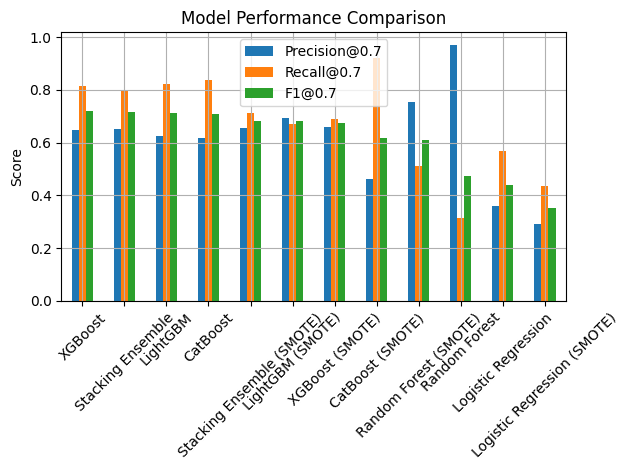

In [ ]:


results_df = pd.DataFrame(model_results).T.sort_values("F1@0.7", ascending=False)

plt.figure(figsize=(12, 6))
results_df[['Precision@0.7', 'Recall@0.7', 'F1@0.7']].plot(kind='bar', title="Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Feature Importance from Random Forest

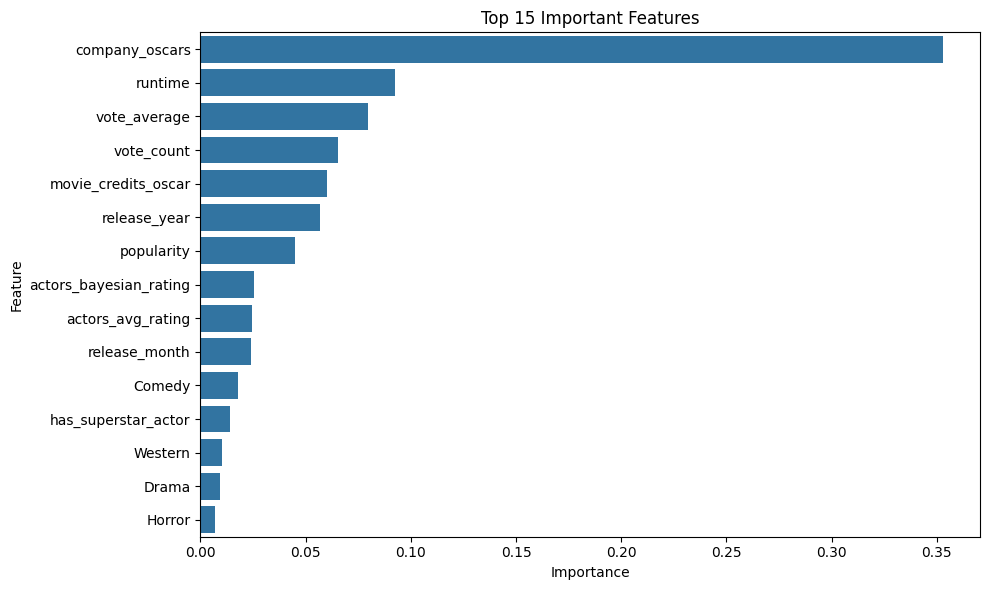

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()


## اضافة سمات متعلقة اكثر بالمجال

In [ ]:
df['tagline_length'] = df['tagline'].apply(lambda x: len(str(x)))
df['strong_sentiment'] = df['tagline_sentiment'].apply(lambda x: 1 if x >= 2 else 0)


# END